In [1]:

# imports
import os
import sys
import types
import json
import base64

# figure size/format
fig_width = 7
fig_height = 5
fig_format = 'retina'
fig_dpi = 96
interactivity = ''
is_shiny = False
is_dashboard = False
plotly_connected = True

# matplotlib defaults / format
try:
  import matplotlib.pyplot as plt
  plt.rcParams['figure.figsize'] = (fig_width, fig_height)
  plt.rcParams['figure.dpi'] = fig_dpi
  plt.rcParams['savefig.dpi'] = "figure"
  from IPython.display import set_matplotlib_formats
  set_matplotlib_formats(fig_format)
except Exception:
  pass

# plotly use connected mode
try:
  import plotly.io as pio
  if plotly_connected:
    pio.renderers.default = "notebook_connected"
  else:
    pio.renderers.default = "notebook"
  for template in pio.templates.keys():
    pio.templates[template].layout.margin = dict(t=30,r=0,b=0,l=0)
except Exception:
  pass

# disable itables paging for dashboards
if is_dashboard:
  try:
    from itables import options
    options.dom = 'fiBrtlp'
    options.maxBytes = 1024 * 1024
    options.language = dict(info = "Showing _TOTAL_ entries")
    options.classes = "display nowrap compact"
    options.paging = False
    options.searching = True
    options.ordering = True
    options.info = True
    options.lengthChange = False
    options.autoWidth = False
    options.responsive = True
    options.keys = True
    options.buttons = []
  except Exception:
    pass
  
  try:
    import altair as alt
    # By default, dashboards will have container sized
    # vega visualizations which allows them to flow reasonably
    theme_sentinel = '_quarto-dashboard-internal'
    def make_theme(name):
        nonTheme = alt.themes._plugins[name]    
        def patch_theme(*args, **kwargs):
            existingTheme = nonTheme()
            if 'height' not in existingTheme:
              existingTheme['height'] = 'container'
            if 'width' not in existingTheme:
              existingTheme['width'] = 'container'

            if 'config' not in existingTheme:
              existingTheme['config'] = dict()
            
            # Configure the default font sizes
            title_font_size = 15
            header_font_size = 13
            axis_font_size = 12
            legend_font_size = 12
            mark_font_size = 12
            tooltip = False

            config = existingTheme['config']

            # The Axis
            if 'axis' not in config:
              config['axis'] = dict()
            axis = config['axis']
            if 'labelFontSize' not in axis:
              axis['labelFontSize'] = axis_font_size
            if 'titleFontSize' not in axis:
              axis['titleFontSize'] = axis_font_size  

            # The legend
            if 'legend' not in config:
              config['legend'] = dict()
            legend = config['legend']
            if 'labelFontSize' not in legend:
              legend['labelFontSize'] = legend_font_size
            if 'titleFontSize' not in legend:
              legend['titleFontSize'] = legend_font_size  

            # The header
            if 'header' not in config:
              config['header'] = dict()
            header = config['header']
            if 'labelFontSize' not in header:
              header['labelFontSize'] = header_font_size
            if 'titleFontSize' not in header:
              header['titleFontSize'] = header_font_size    

            # Title
            if 'title' not in config:
              config['title'] = dict()
            title = config['title']
            if 'fontSize' not in title:
              title['fontSize'] = title_font_size

            # Marks
            if 'mark' not in config:
              config['mark'] = dict()
            mark = config['mark']
            if 'fontSize' not in mark:
              mark['fontSize'] = mark_font_size

            # Mark tooltips
            if tooltip and 'tooltip' not in mark:
              mark['tooltip'] = dict(content="encoding")

            return existingTheme
            
        return patch_theme

    # We can only do this once per session
    if theme_sentinel not in alt.themes.names():
      for name in alt.themes.names():
        alt.themes.register(name, make_theme(name))
      
      # register a sentinel theme so we only do this once
      alt.themes.register(theme_sentinel, make_theme('default'))
      alt.themes.enable('default')

  except Exception:
    pass

# enable pandas latex repr when targeting pdfs
try:
  import pandas as pd
  if fig_format == 'pdf':
    pd.set_option('display.latex.repr', True)
except Exception:
  pass

# interactivity
if interactivity:
  from IPython.core.interactiveshell import InteractiveShell
  InteractiveShell.ast_node_interactivity = interactivity

# NOTE: the kernel_deps code is repeated in the cleanup.py file
# (we can't easily share this code b/c of the way it is run).
# If you edit this code also edit the same code in cleanup.py!

# output kernel dependencies
kernel_deps = dict()
for module in list(sys.modules.values()):
  # Some modules play games with sys.modules (e.g. email/__init__.py
  # in the standard library), and occasionally this can cause strange
  # failures in getattr.  Just ignore anything that's not an ordinary
  # module.
  if not isinstance(module, types.ModuleType):
    continue
  path = getattr(module, "__file__", None)
  if not path:
    continue
  if path.endswith(".pyc") or path.endswith(".pyo"):
    path = path[:-1]
  if not os.path.exists(path):
    continue
  kernel_deps[path] = os.stat(path).st_mtime
print(json.dumps(kernel_deps))

# set run_path if requested
run_path = 'L1VzZXJzL2NoZXJ5bGtvdWFkaW8vRG9jdW1lbnRzL1JlcG9zaXRvcmllcy9wZXJzb25hbC13ZWJzaXRlLzNBL3JzcV9leHRyZW1lcw=='
if run_path:
  # hex-decode the path
  run_path = base64.b64decode(run_path.encode("utf-8")).decode("utf-8")
  os.chdir(run_path)

# reset state
%reset

# shiny
# Checking for shiny by using False directly because we're after the %reset. We don't want
# to set a variable that stays in global scope.
if False:
  try:
    import htmltools as _htmltools
    import ast as _ast

    _htmltools.html_dependency_render_mode = "json"

    # This decorator will be added to all function definitions
    def _display_if_has_repr_html(x):
      try:
        # IPython 7.14 preferred import
        from IPython.display import display, HTML
      except:
        from IPython.core.display import display, HTML

      if hasattr(x, '_repr_html_'):
        display(HTML(x._repr_html_()))
      return x

    # ideally we would undo the call to ast_transformers.append
    # at the end of this block whenver an error occurs, we do 
    # this for now as it will only be a problem if the user 
    # switches from shiny to not-shiny mode (and even then likely
    # won't matter)
    import builtins
    builtins._display_if_has_repr_html = _display_if_has_repr_html

    class _FunctionDefReprHtml(_ast.NodeTransformer):
      def visit_FunctionDef(self, node):
        node.decorator_list.insert(
          0,
          _ast.Name(id="_display_if_has_repr_html", ctx=_ast.Load())
        )
        return node

      def visit_AsyncFunctionDef(self, node):
        node.decorator_list.insert(
          0,
          _ast.Name(id="_display_if_has_repr_html", ctx=_ast.Load())
        )
        return node

    ip = get_ipython()
    ip.ast_transformers.append(_FunctionDefReprHtml())

  except:
    pass

def ojs_define(**kwargs):
  import json
  try:
    # IPython 7.14 preferred import
    from IPython.display import display, HTML
  except:
    from IPython.core.display import display, HTML

  # do some minor magic for convenience when handling pandas
  # dataframes
  def convert(v):
    try:
      import pandas as pd
    except ModuleNotFoundError: # don't do the magic when pandas is not available
      return v
    if type(v) == pd.Series:
      v = pd.DataFrame(v)
    if type(v) == pd.DataFrame:
      j = json.loads(v.T.to_json(orient='split'))
      return dict((k,v) for (k,v) in zip(j["index"], j["data"]))
    else:
      return v

  v = dict(contents=list(dict(name=key, value=convert(value)) for (key, value) in kwargs.items()))
  display(HTML('<script type="ojs-define">' + json.dumps(v) + '</script>'), metadata=dict(ojs_define = True))
globals()["ojs_define"] = ojs_define
globals()["__spec__"] = None

/var/folders/4g/2x7xwt6106l13nxqljfks4gm0000gn/T/ipykernel_42632/606420773.py:25: DeprecationWarning: `set_matplotlib_formats` is deprecated since IPython 7.23, directly use `matplotlib_inline.backend_inline.set_matplotlib_formats()`
  set_matplotlib_formats(fig_format)


{"/Library/Developer/CommandLineTools/Library/Frameworks/Python3.framework/Versions/3.9/lib/python3.9/importlib/_bootstrap.py": 1731323902.0, "/Library/Developer/CommandLineTools/Library/Frameworks/Python3.framework/Versions/3.9/lib/python3.9/importlib/_bootstrap_external.py": 1731323902.0, "/Library/Developer/CommandLineTools/Library/Frameworks/Python3.framework/Versions/3.9/lib/python3.9/codecs.py": 1731323889.0, "/Library/Developer/CommandLineTools/Library/Frameworks/Python3.framework/Versions/3.9/lib/python3.9/encodings/aliases.py": 1731323904.0, "/Library/Developer/CommandLineTools/Library/Frameworks/Python3.framework/Versions/3.9/lib/python3.9/encodings/cp437.py": 1731323905.0, "/Library/Developer/CommandLineTools/Library/Frameworks/Python3.framework/Versions/3.9/lib/python3.9/encodings/__init__.py": 1731323904.0, "/Library/Developer/CommandLineTools/Library/Frameworks/Python3.framework/Versions/3.9/lib/python3.9/encodings/utf_8.py": 1731323906.0, "/Library/Developer/CommandLineT

In [2]:
# Définition des librairies
import yfinance as yf
import numpy as np
import matplotlib.pyplot as plt
import warnings
from tqdm import tqdm
from scipy.stats import bootstrap

warnings.filterwarnings("ignore")

/Users/cherylkouadio/Library/Python/3.9/lib/python/site-packages/urllib3/__init__.py:35: NotOpenSSLWarning:

urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020



In [3]:
# Import des données du CAC 40
data = yf.download("^FCHI")

YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  1 of 1 completed

In [4]:
# Calcul des rendements logarithmiques
data['log_return'] = np.log(data['Close'] / data['Close'].shift(1))

# Retirer la première ligne
data = data.dropna()

In [5]:
data.head()

Price,Close,High,Low,Open,Volume,log_return
Ticker,^FCHI,^FCHI,^FCHI,^FCHI,^FCHI,
Date,,,,,,
1990-03-02,1860.0,1860.0,1831.0,1831.0,0,0.015168
1990-03-05,1874.0,1874.0,1862.0,1866.0,0,0.007499
1990-03-06,1872.0,1875.0,1866.0,1869.0,0,-0.001068
1990-03-07,1880.0,1881.0,1874.0,1874.0,0,0.004264
1990-03-08,1917.0,1923.0,1891.0,1891.0,0,0.019490


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 8887 entries, 1990-03-02 to 2025-02-28
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   (Close, ^FCHI)   8887 non-null   float64
 1   (High, ^FCHI)    8887 non-null   float64
 2   (Low, ^FCHI)     8887 non-null   float64
 3   (Open, ^FCHI)    8887 non-null   float64
 4   (Volume, ^FCHI)  8887 non-null   int64  
 5   (log_return, )   8887 non-null   float64
dtypes: float64(5), int64(1)
memory usage: 486.0 KB


In [7]:
data.describe()

Price,Close,High,Low,Open,Volume,log_return
Ticker,^FCHI,^FCHI,^FCHI,^FCHI,^FCHI,
count,8887.000000,8887.000000,8887.000000,8887.000000,8.887000e+03,8887.000000
mean,4215.366902,4244.444319,4184.364187,4215.707752,6.417202e+07,0.000167
std,1613.148605,1620.763329,1605.485586,1613.186974,6.673571e+07,0.013423
min,1441.000000,1459.000000,1425.000000,1438.000000,0.000000e+00,-0.130983
25%,3053.954956,3089.070068,3014.035034,3052.150024,0.000000e+00,-0.006450
50%,4213.700195,4245.959961,4176.479980,4217.450195,6.461570e+07,0.000453
75%,5321.669922,5357.655029,5297.364990,5326.139893,1.092204e+08,0.007174
max,8239.990234,8259.190430,8211.200195,8241.679688,5.312476e+08,0.105946


In [8]:
# check na
print("="*80)
print(data.isna().sum())
print("="*80)

Price       Ticker
Close       ^FCHI     0
High        ^FCHI     0
Low         ^FCHI     0
Open        ^FCHI     0
Volume      ^FCHI     0
log_return            0
dtype: int64


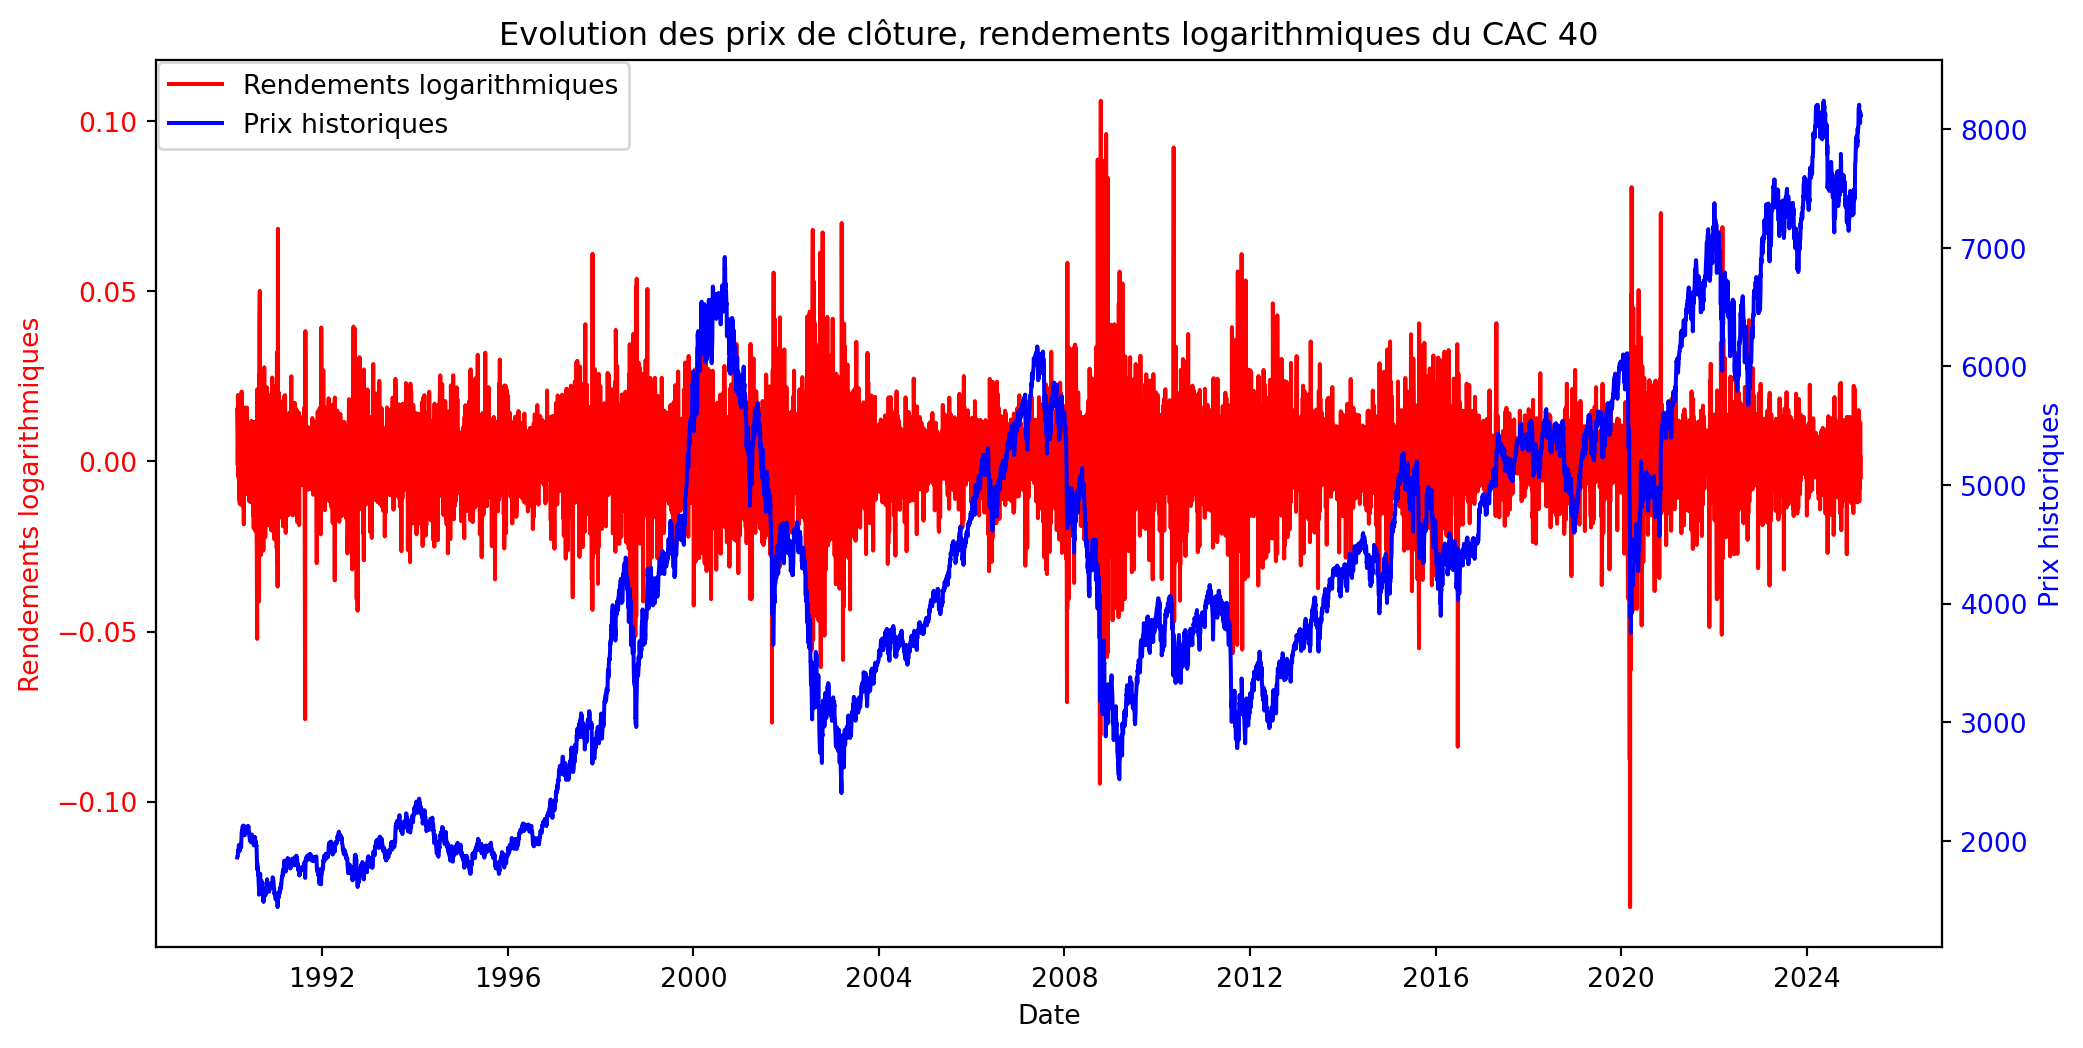

In [9]:
fig, ax1 = plt.subplots(figsize=(12, 6))

ax1.plot(data['log_return'], label='Rendements logarithmiques', color='red')
ax1.set_xlabel('Date')
ax1.set_ylabel('Rendements logarithmiques', color='red')
ax1.tick_params(axis='y', labelcolor='red')

ax2 = ax1.twinx()
ax2.plot(data['Close'], label='Prix historiques', color='blue')
ax2.set_ylabel('Prix historiques', color='blue')
ax2.tick_params(axis='y', labelcolor='blue')

fig.legend(loc='upper left', bbox_to_anchor=(0.12,0.89))
plt.title("Evolution des prix de clôture, rendements logarithmiques du CAC 40")
plt.show()

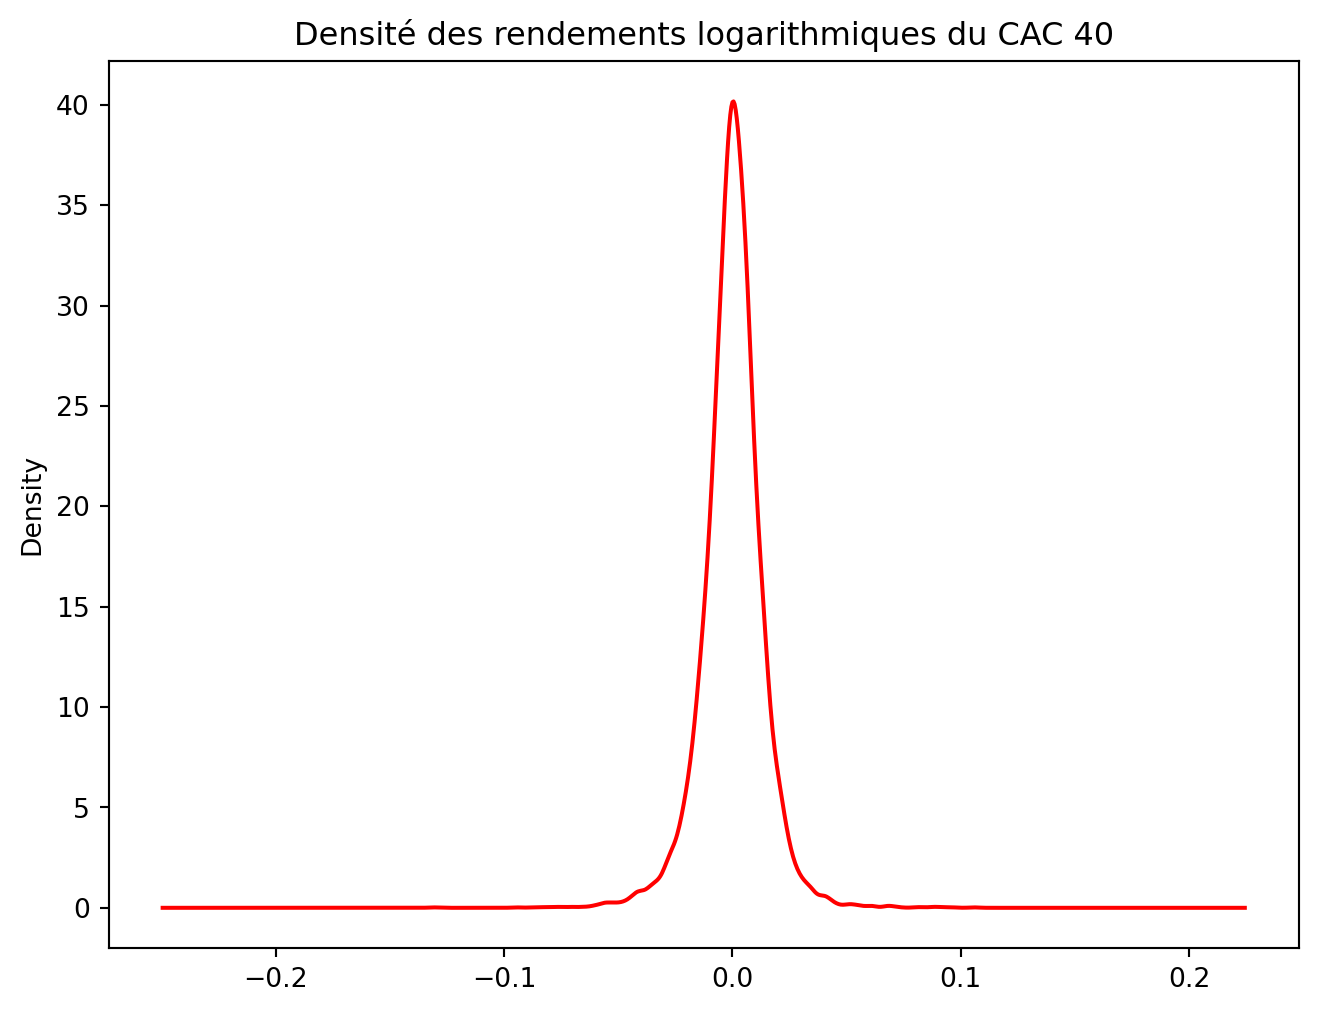

In [10]:
# Densité des rendements logarithmiques
plt.figure(figsize=(8, 6))
data['log_return'].plot(kind='kde', color='red')
plt.title("Densité des rendements logarithmiques du CAC 40")
plt.show()

In [11]:
# Skewness
skewness = data['log_return'].skew()
print(f"Skewness: {skewness:.2f}")

# Kurtosis
kurtosis = data['log_return'].kurtosis()
print(f"Kurtosis: {kurtosis:.2f}")

Skewness: -0.20
Kurtosis: 5.90


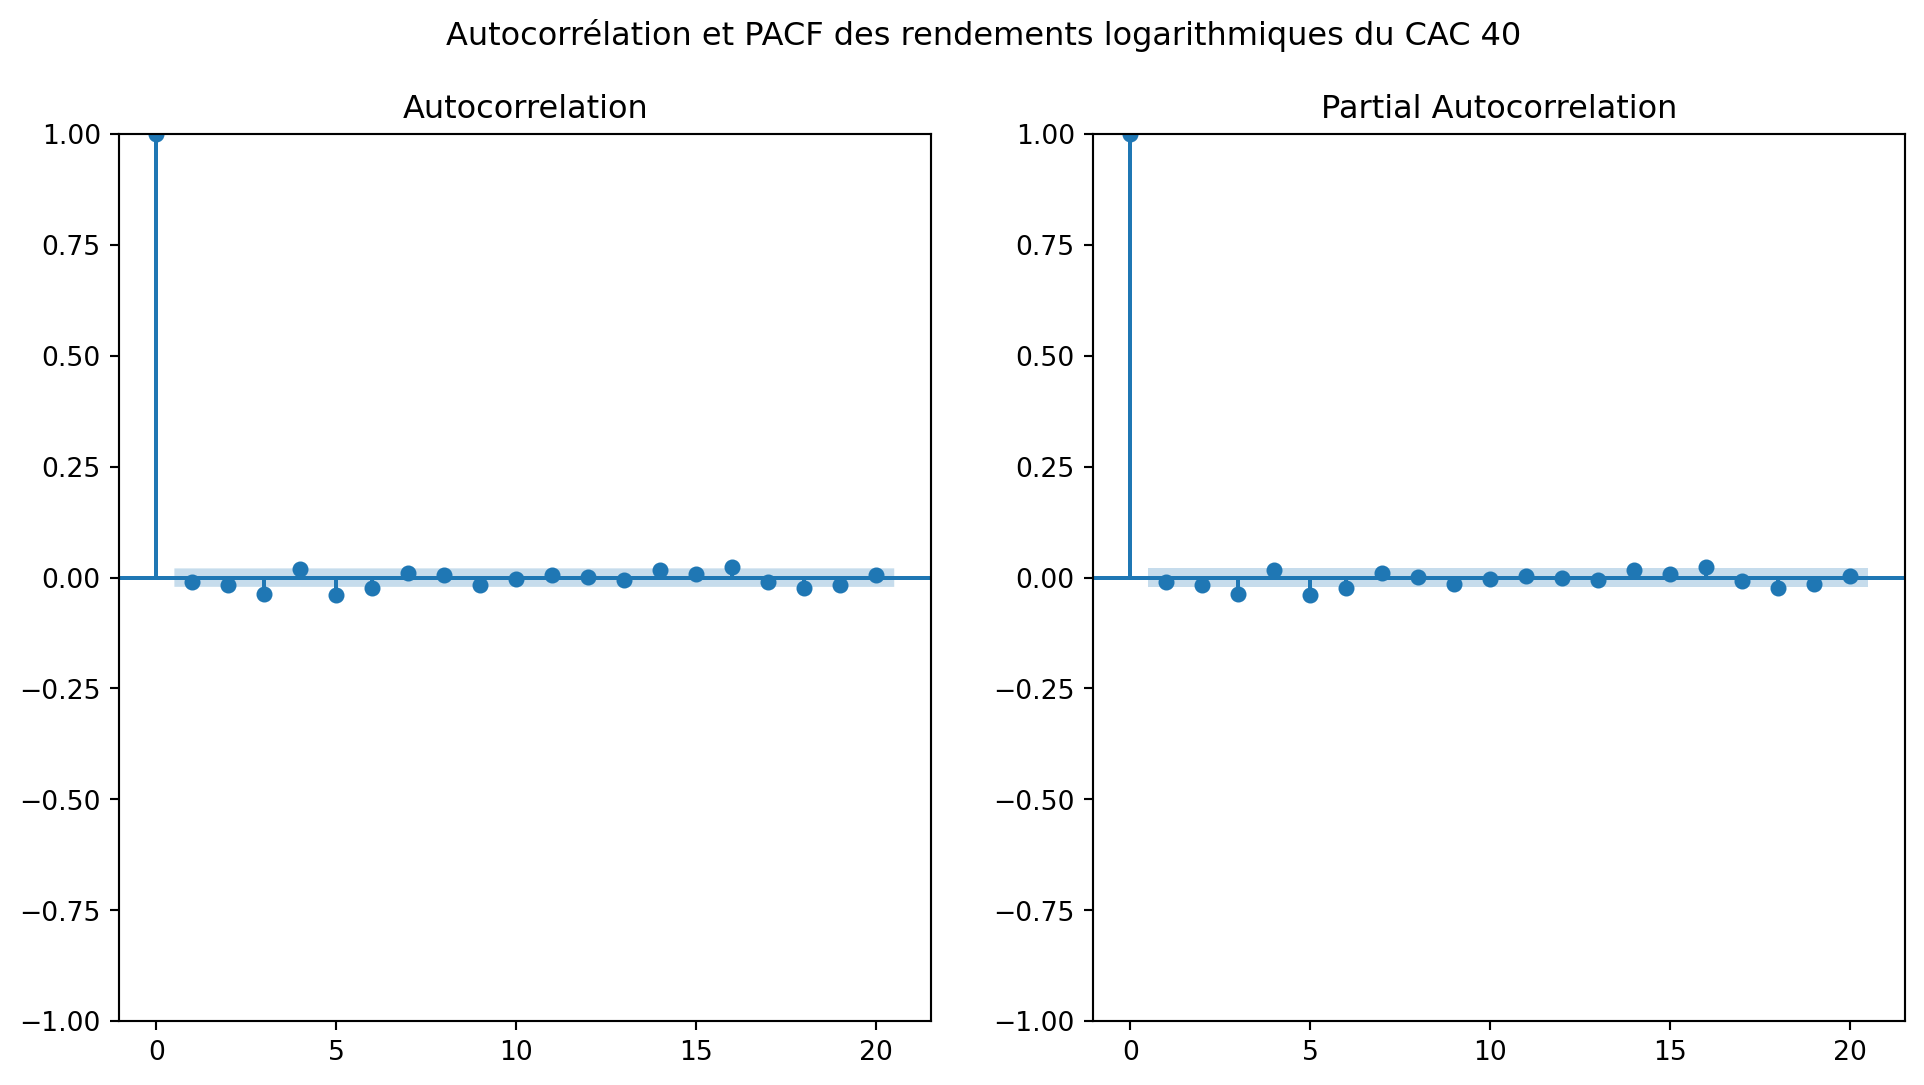

In [12]:
# Autocorrélation et pacf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

plot_acf(data['log_return'], lags=20, ax=ax1)
plot_pacf(data['log_return'], lags=20, ax=ax2)

plt.suptitle("Autocorrélation et PACF des rendements logarithmiques du CAC 40")
plt.show()

In [13]:
# check for stationarity
from statsmodels.tsa.stattools import adfuller
import pandas as pd

def adf_test(series, title=''):
    """
    Pass in a time series and an optional title, returns an Adataset report
    """
    print('Augmented Dickey-Fuller Test: {}\n'.format(title))
    # .dropna() handles differenced data
    result = adfuller(series.dropna(),autolag='AIC')

    labels = ['Adataset test statistic','p-value','# lags used','# observations']
    out = pd.Series(result[0:4],index=labels)

    for key,val in result[4].items():
        out['critical value ({})'.format(key)]=val

    # .to_string() removes the line "dtype: float64"
    print(f'{out.to_string()}\n')

    if result[1] <= 0.05:
        print("Strong evidence against the null hypothesis")
        print("Reject the null hypothesis")
        print("Data has no unit root and is stationary")
    else:
        print("Weak evidence against the null hypothesis")
        print("Fail to reject the null hypothesis")
        print("Data has a unit root and is non-stationary")

print("="*80)
adf_test(data["Close"], title='Prix de clôture')
print("="*80)
adf_test(data["log_return"], title='Log-rendements')
print("="*80)

Augmented Dickey-Fuller Test: Prix de clôture



Adataset test statistic      -0.841167
p-value                       0.806729
# lags used                  30.000000
# observations             8856.000000
critical value (1%)          -3.431089
critical value (5%)          -2.861866
critical value (10%)         -2.566944

Weak evidence against the null hypothesis
Fail to reject the null hypothesis
Data has a unit root and is non-stationary
Augmented Dickey-Fuller Test: Log-rendements



Adataset test statistic     -41.264713
p-value                       0.000000
# lags used                   5.000000
# observations             8881.000000
critical value (1%)          -3.431087
critical value (5%)          -2.861866
critical value (10%)         -2.566943

Strong evidence against the null hypothesis
Reject the null hypothesis
Data has no unit root and is stationary


In [14]:
train = data[['log_return',"Close"]]['15-10-2008':'26-07-2022']
data_train = train['log_return']

test = data[['log_return',"Close"]]['27-07-2022':'11-06-2024']
data_test = test['log_return']

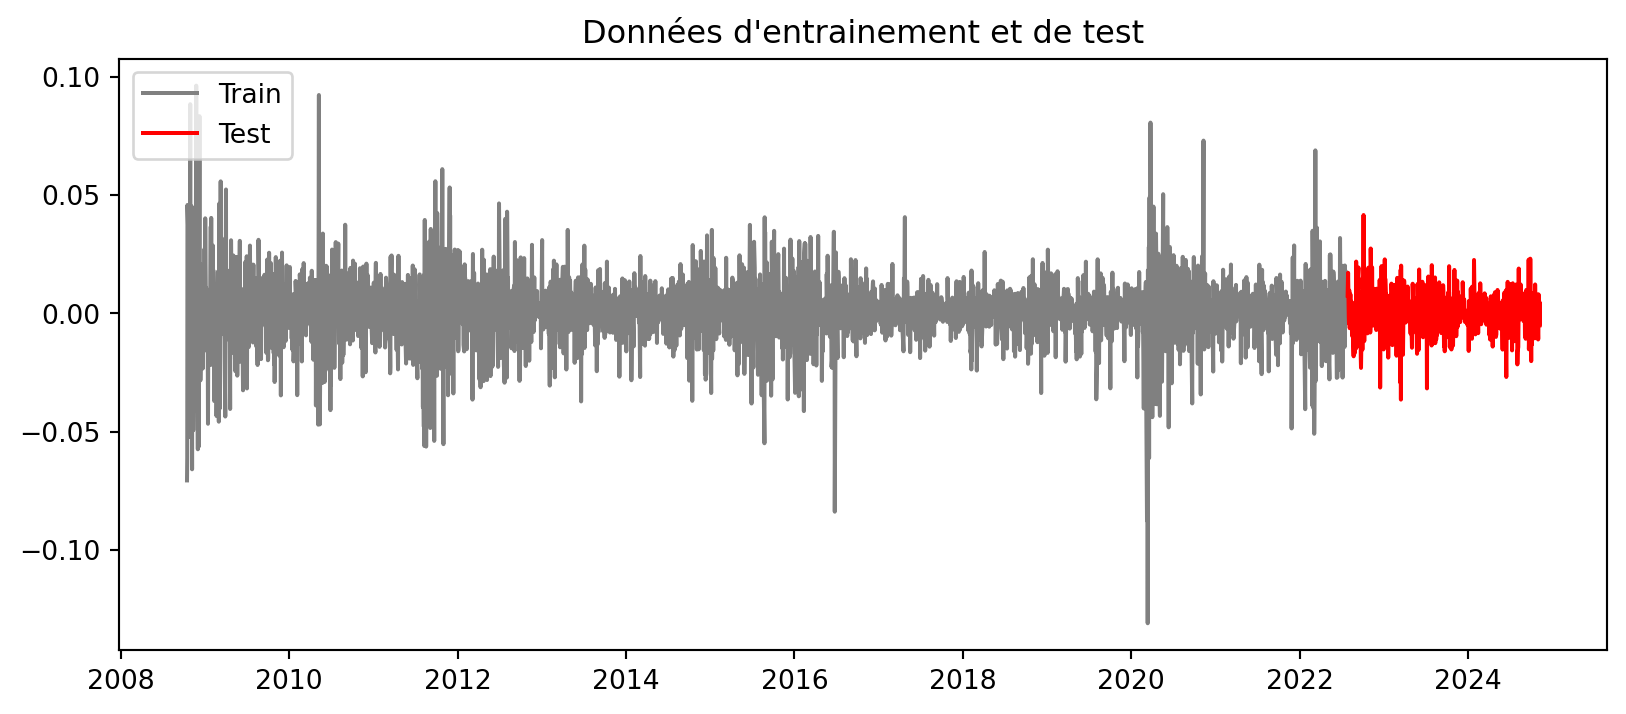

In [15]:
plt.figure(figsize=(10, 4))
plt.plot(data_train, label='Train', color='grey')
plt.plot(data_test, label='Test', color='red')
plt.legend(loc='upper left')
plt.title("Données d'entrainement et de test")
plt.show()

In [16]:
data_train.describe()

count    3523.000000
mean        0.000153
std         0.013953
min        -0.130983
25%        -0.006099
50%         0.000580
75%         0.006855
max         0.096169
Name: log_return, dtype: float64

In [17]:
data_test.describe()

count    586.000000
mean       0.000292
std        0.008947
min       -0.036484
25%       -0.004763
50%        0.000642
75%        0.005612
max        0.041504
Name: log_return, dtype: float64

In [18]:
# Objectif : implémenter une fonction calculant la VaR historique

def historical_var(data, alpha=0.99):
    """
    Calcul de la VaR historique
    data : les rendements logarithmiques
    alpha : le niveau de confiance
    """
    return -np.percentile(data, 100*(1- alpha))

In [19]:
# Calcul de la VaR historique sur l'échantillon d'entrainement pour h=1j et alpha=0.99
alpha = 0.99
var_hist_train = historical_var(data_train, alpha=alpha)
print(f"La VaR historique pour h=1j et alpha=0.99 est : {var_hist_train:.4%}")

La VaR historique pour h=1j et alpha=0.99 est : 4.0850%


In [20]:
# Objectif : implémenter une fonction calculant la VaR bootstrap et un IC

def bootstrap_var(data, alpha=0.99, M=1000, seuil=0.05):
    """
    Calcul de la VaR bootstrap
    data : les rendements logarithmiques
    alpha : le niveau de confiance de la VaR
    n : le nombre de simulations
    seuil : le seuil de l'intervalle de confiance
    """
    # set seed
    np.random.seed(42)

    # Initialisation du vecteur des VaR
    var = np.zeros(M)

    # Calcul de la VaR bootstrap
    for i in range(M):
        sample = np.random.choice(data, size=len(data), replace=True)
        var[i] = -np.percentile(sample, 100*(1- alpha))

    # Calcul de l'intervalle de confiance
    lower = np.percentile(var, 100*(1-seuil)/2)
    upper = np.percentile(var, 100*(seuil + (1-seuil)/2))

    return np.mean(var), lower, upper

In [21]:
# Observer la variation de la VaR en fonction de M
M_values = np.arange(1000, 10000, 10)
var_bs_values = []

for M in tqdm(M_values):
    var_bs_train, _, _ = bootstrap_var(data_train, alpha=alpha, M=M)
    var_bs_values.append(var_bs_train)

  0%|          | 0/900 [00:00<?, ?it/s]

  0%|          | 2/900 [00:00<01:03, 14.21it/s]

  0%|          | 4/900 [00:00<01:03, 14.11it/s]

  1%|          | 6/900 [00:00<01:03, 14.00it/s]

  1%|          | 8/900 [00:00<01:04, 13.87it/s]

  1%|          | 10/900 [00:00<01:04, 13.70it/s]

  1%|▏         | 12/900 [00:00<01:05, 13.55it/s]

  2%|▏         | 14/900 [00:01<01:06, 13.39it/s]

  2%|▏         | 16/900 [00:01<01:07, 13.16it/s]

  2%|▏         | 18/900 [00:01<01:08, 12.95it/s]

  2%|▏         | 20/900 [00:01<01:08, 12.76it/s]

  2%|▏         | 22/900 [00:01<01:09, 12.56it/s]

  3%|▎         | 24/900 [00:01<01:10, 12.37it/s]

  3%|▎         | 26/900 [00:02<01:11, 12.19it/s]

  3%|▎         | 28/900 [00:02<01:12, 11.98it/s]

  3%|▎         | 30/900 [00:02<01:14, 11.75it/s]

  4%|▎         | 32/900 [00:02<01:14, 11.59it/s]

  4%|▍         | 34/900 [00:02<01:19, 10.96it/s]

  4%|▍         | 36/900 [00:02<01:19, 10.93it/s]

  4%|▍         | 38/900 [00:03<01:19, 10.85it/s]

  4%|▍         | 40/900 [00:03<01:22, 10.43it/s]

  5%|▍         | 42/900 [00:03<01:22, 10.44it/s]

  5%|▍         | 44/900 [00:03<01:22, 10.34it/s]

  5%|▌         | 46/900 [00:03<01:23, 10.25it/s]

  5%|▌         | 48/900 [00:04<01:23, 10.15it/s]

  6%|▌         | 50/900 [00:04<01:24, 10.01it/s]

  6%|▌         | 52/900 [00:04<01:26,  9.86it/s]

  6%|▌         | 53/900 [00:04<01:26,  9.79it/s]

  6%|▌         | 54/900 [00:04<01:27,  9.71it/s]

  6%|▌         | 55/900 [00:04<01:27,  9.66it/s]

  6%|▌         | 56/900 [00:04<01:28,  9.58it/s]

  6%|▋         | 57/900 [00:05<01:28,  9.51it/s]

  6%|▋         | 58/900 [00:05<01:29,  9.43it/s]

  7%|▋         | 59/900 [00:05<01:30,  9.31it/s]

  7%|▋         | 60/900 [00:05<01:30,  9.28it/s]

  7%|▋         | 61/900 [00:05<01:30,  9.23it/s]

  7%|▋         | 62/900 [00:05<01:31,  9.14it/s]

  7%|▋         | 63/900 [00:05<01:32,  9.04it/s]

  7%|▋         | 64/900 [00:05<01:32,  9.02it/s]

  7%|▋         | 65/900 [00:05<01:33,  8.95it/s]

  7%|▋         | 66/900 [00:06<01:33,  8.89it/s]

  7%|▋         | 67/900 [00:06<01:34,  8.83it/s]

  8%|▊         | 68/900 [00:06<01:34,  8.76it/s]

  8%|▊         | 69/900 [00:06<01:35,  8.71it/s]

  8%|▊         | 70/900 [00:06<01:35,  8.69it/s]

  8%|▊         | 71/900 [00:06<01:35,  8.65it/s]

  8%|▊         | 72/900 [00:06<01:36,  8.58it/s]

  8%|▊         | 73/900 [00:06<01:37,  8.49it/s]

  8%|▊         | 74/900 [00:07<01:37,  8.44it/s]

  8%|▊         | 75/900 [00:07<01:38,  8.39it/s]

  8%|▊         | 76/900 [00:07<01:39,  8.31it/s]

  9%|▊         | 77/900 [00:07<01:40,  8.23it/s]

  9%|▊         | 78/900 [00:07<01:40,  8.19it/s]

  9%|▉         | 79/900 [00:07<01:40,  8.18it/s]

  9%|▉         | 80/900 [00:07<01:40,  8.12it/s]

  9%|▉         | 81/900 [00:07<01:41,  8.07it/s]

  9%|▉         | 82/900 [00:07<01:41,  8.06it/s]

  9%|▉         | 83/900 [00:08<01:42,  8.00it/s]

  9%|▉         | 84/900 [00:08<01:43,  7.90it/s]

  9%|▉         | 85/900 [00:08<01:44,  7.82it/s]

 10%|▉         | 86/900 [00:08<01:43,  7.83it/s]

 10%|▉         | 87/900 [00:08<01:44,  7.80it/s]

 10%|▉         | 88/900 [00:08<01:44,  7.75it/s]

 10%|▉         | 89/900 [00:08<01:45,  7.69it/s]

 10%|█         | 90/900 [00:09<01:45,  7.69it/s]

 10%|█         | 91/900 [00:09<01:45,  7.64it/s]

 10%|█         | 92/900 [00:09<01:46,  7.57it/s]

 10%|█         | 93/900 [00:09<01:47,  7.54it/s]

 10%|█         | 94/900 [00:09<01:47,  7.49it/s]

 11%|█         | 95/900 [00:09<01:47,  7.46it/s]

 11%|█         | 96/900 [00:09<01:48,  7.41it/s]

 11%|█         | 97/900 [00:09<01:48,  7.37it/s]

 11%|█         | 98/900 [00:10<01:49,  7.35it/s]

 11%|█         | 99/900 [00:10<01:49,  7.32it/s]

 11%|█         | 100/900 [00:10<01:49,  7.29it/s]

 11%|█         | 101/900 [00:10<01:50,  7.22it/s]

 11%|█▏        | 102/900 [00:10<01:50,  7.19it/s]

 11%|█▏        | 103/900 [00:10<01:52,  7.10it/s]

 12%|█▏        | 104/900 [00:10<01:51,  7.11it/s]

 12%|█▏        | 105/900 [00:11<01:52,  7.10it/s]

 12%|█▏        | 106/900 [00:11<01:52,  7.05it/s]

 12%|█▏        | 107/900 [00:11<01:52,  7.03it/s]

 12%|█▏        | 108/900 [00:11<01:53,  7.01it/s]

 12%|█▏        | 109/900 [00:11<01:54,  6.93it/s]

 12%|█▏        | 110/900 [00:11<01:54,  6.89it/s]

 12%|█▏        | 111/900 [00:11<01:55,  6.82it/s]

 12%|█▏        | 112/900 [00:12<01:56,  6.79it/s]

 13%|█▎        | 113/900 [00:12<01:56,  6.75it/s]

 13%|█▎        | 114/900 [00:12<01:56,  6.72it/s]

 13%|█▎        | 115/900 [00:12<01:57,  6.67it/s]

 13%|█▎        | 116/900 [00:12<01:58,  6.63it/s]

 13%|█▎        | 117/900 [00:12<01:58,  6.60it/s]

 13%|█▎        | 118/900 [00:13<01:59,  6.56it/s]

 13%|█▎        | 119/900 [00:13<01:59,  6.55it/s]

 13%|█▎        | 120/900 [00:13<01:59,  6.52it/s]

 13%|█▎        | 121/900 [00:13<02:00,  6.47it/s]

 14%|█▎        | 122/900 [00:13<02:00,  6.45it/s]

 14%|█▎        | 123/900 [00:13<02:01,  6.41it/s]

 14%|█▍        | 124/900 [00:13<02:01,  6.38it/s]

 14%|█▍        | 125/900 [00:14<02:01,  6.36it/s]

 14%|█▍        | 126/900 [00:14<02:01,  6.35it/s]

 14%|█▍        | 127/900 [00:14<02:02,  6.30it/s]

 14%|█▍        | 128/900 [00:14<02:02,  6.30it/s]

 14%|█▍        | 129/900 [00:14<02:03,  6.26it/s]

 14%|█▍        | 130/900 [00:14<02:03,  6.22it/s]

 15%|█▍        | 131/900 [00:15<02:04,  6.16it/s]

 15%|█▍        | 132/900 [00:15<02:04,  6.16it/s]

 15%|█▍        | 133/900 [00:15<02:04,  6.14it/s]

 15%|█▍        | 134/900 [00:15<02:05,  6.12it/s]

 15%|█▌        | 135/900 [00:15<02:10,  5.86it/s]

 15%|█▌        | 136/900 [00:15<02:09,  5.90it/s]

 15%|█▌        | 137/900 [00:16<02:08,  5.93it/s]

 15%|█▌        | 138/900 [00:16<02:08,  5.93it/s]

 15%|█▌        | 139/900 [00:16<02:08,  5.91it/s]

 16%|█▌        | 140/900 [00:16<02:09,  5.88it/s]

 16%|█▌        | 141/900 [00:16<02:08,  5.89it/s]

 16%|█▌        | 142/900 [00:16<02:09,  5.87it/s]

 16%|█▌        | 143/900 [00:17<02:09,  5.83it/s]

 16%|█▌        | 144/900 [00:17<02:10,  5.78it/s]

 16%|█▌        | 145/900 [00:17<02:11,  5.76it/s]

 16%|█▌        | 146/900 [00:17<02:11,  5.75it/s]

 16%|█▋        | 147/900 [00:17<02:11,  5.72it/s]

 16%|█▋        | 148/900 [00:18<02:16,  5.51it/s]

 17%|█▋        | 149/900 [00:18<02:15,  5.54it/s]

 17%|█▋        | 150/900 [00:18<02:14,  5.56it/s]

 17%|█▋        | 151/900 [00:18<02:14,  5.57it/s]

 17%|█▋        | 152/900 [00:18<02:14,  5.57it/s]

 17%|█▋        | 153/900 [00:18<02:13,  5.58it/s]

 17%|█▋        | 154/900 [00:19<02:13,  5.59it/s]

 17%|█▋        | 155/900 [00:19<02:13,  5.59it/s]

 17%|█▋        | 156/900 [00:19<02:13,  5.57it/s]

 17%|█▋        | 157/900 [00:19<02:13,  5.55it/s]

 18%|█▊        | 158/900 [00:19<02:13,  5.56it/s]

 18%|█▊        | 159/900 [00:20<02:13,  5.53it/s]

 18%|█▊        | 160/900 [00:20<02:14,  5.52it/s]

 18%|█▊        | 161/900 [00:20<02:14,  5.48it/s]

 18%|█▊        | 162/900 [00:20<02:15,  5.46it/s]

 18%|█▊        | 163/900 [00:20<02:15,  5.45it/s]

 18%|█▊        | 164/900 [00:20<02:15,  5.43it/s]

 18%|█▊        | 165/900 [00:21<02:16,  5.40it/s]

 18%|█▊        | 166/900 [00:21<02:16,  5.38it/s]

 19%|█▊        | 167/900 [00:21<02:16,  5.35it/s]

 19%|█▊        | 168/900 [00:21<02:17,  5.33it/s]

 19%|█▉        | 169/900 [00:21<02:17,  5.31it/s]

 19%|█▉        | 170/900 [00:22<02:18,  5.26it/s]

 19%|█▉        | 171/900 [00:22<02:18,  5.27it/s]

 19%|█▉        | 172/900 [00:22<02:18,  5.26it/s]

 19%|█▉        | 173/900 [00:22<02:18,  5.24it/s]

 19%|█▉        | 174/900 [00:22<02:19,  5.22it/s]

 19%|█▉        | 175/900 [00:23<02:19,  5.20it/s]

 20%|█▉        | 176/900 [00:23<02:19,  5.17it/s]

 20%|█▉        | 177/900 [00:23<02:19,  5.17it/s]

 20%|█▉        | 178/900 [00:23<02:20,  5.14it/s]

 20%|█▉        | 179/900 [00:23<02:20,  5.14it/s]

 20%|██        | 180/900 [00:24<02:20,  5.13it/s]

 20%|██        | 181/900 [00:24<02:20,  5.11it/s]

 20%|██        | 182/900 [00:24<02:20,  5.10it/s]

 20%|██        | 183/900 [00:24<02:22,  5.04it/s]

 20%|██        | 184/900 [00:24<02:22,  5.03it/s]

 21%|██        | 185/900 [00:25<02:22,  5.03it/s]

 21%|██        | 186/900 [00:25<02:22,  5.00it/s]

 21%|██        | 187/900 [00:25<02:22,  4.99it/s]

 21%|██        | 188/900 [00:25<02:23,  4.96it/s]

 21%|██        | 189/900 [00:25<02:23,  4.94it/s]

 21%|██        | 190/900 [00:26<02:24,  4.93it/s]

 21%|██        | 191/900 [00:26<02:24,  4.91it/s]

 21%|██▏       | 192/900 [00:26<02:24,  4.89it/s]

 21%|██▏       | 193/900 [00:26<02:25,  4.87it/s]

 22%|██▏       | 194/900 [00:26<02:25,  4.84it/s]

 22%|██▏       | 195/900 [00:27<02:26,  4.82it/s]

 22%|██▏       | 196/900 [00:27<02:26,  4.82it/s]

 22%|██▏       | 197/900 [00:27<02:25,  4.82it/s]

 22%|██▏       | 198/900 [00:27<02:26,  4.80it/s]

 22%|██▏       | 199/900 [00:27<02:26,  4.79it/s]

 22%|██▏       | 200/900 [00:28<02:26,  4.77it/s]

 22%|██▏       | 201/900 [00:28<02:27,  4.74it/s]

 22%|██▏       | 202/900 [00:28<02:27,  4.73it/s]

 23%|██▎       | 203/900 [00:28<02:28,  4.70it/s]

 23%|██▎       | 204/900 [00:28<02:28,  4.69it/s]

 23%|██▎       | 205/900 [00:29<02:28,  4.67it/s]

 23%|██▎       | 206/900 [00:29<02:28,  4.66it/s]

 23%|██▎       | 207/900 [00:29<02:29,  4.64it/s]

 23%|██▎       | 208/900 [00:29<02:29,  4.62it/s]

 23%|██▎       | 209/900 [00:30<02:30,  4.60it/s]

 23%|██▎       | 210/900 [00:30<02:30,  4.59it/s]

 23%|██▎       | 211/900 [00:30<02:30,  4.57it/s]

 24%|██▎       | 212/900 [00:30<02:30,  4.56it/s]

 24%|██▎       | 213/900 [00:30<02:31,  4.54it/s]

 24%|██▍       | 214/900 [00:31<02:31,  4.53it/s]

 24%|██▍       | 215/900 [00:31<02:31,  4.51it/s]

 24%|██▍       | 216/900 [00:31<02:31,  4.50it/s]

 24%|██▍       | 217/900 [00:31<02:32,  4.48it/s]

 24%|██▍       | 218/900 [00:32<02:32,  4.46it/s]

 24%|██▍       | 219/900 [00:32<02:33,  4.45it/s]

 24%|██▍       | 220/900 [00:32<02:33,  4.43it/s]

 25%|██▍       | 221/900 [00:32<02:33,  4.42it/s]

 25%|██▍       | 222/900 [00:32<02:33,  4.41it/s]

 25%|██▍       | 223/900 [00:33<02:33,  4.41it/s]

 25%|██▍       | 224/900 [00:33<02:33,  4.40it/s]

 25%|██▌       | 225/900 [00:33<02:34,  4.37it/s]

 25%|██▌       | 226/900 [00:33<02:34,  4.35it/s]

 25%|██▌       | 227/900 [00:34<02:34,  4.34it/s]

 25%|██▌       | 228/900 [00:34<02:34,  4.34it/s]

 25%|██▌       | 229/900 [00:34<02:34,  4.33it/s]

 26%|██▌       | 230/900 [00:34<02:35,  4.31it/s]

 26%|██▌       | 231/900 [00:35<02:35,  4.29it/s]

 26%|██▌       | 232/900 [00:35<02:35,  4.28it/s]

 26%|██▌       | 233/900 [00:35<02:36,  4.26it/s]

 26%|██▌       | 234/900 [00:35<02:36,  4.25it/s]

 26%|██▌       | 235/900 [00:36<02:37,  4.23it/s]

 26%|██▌       | 236/900 [00:36<02:36,  4.24it/s]

 26%|██▋       | 237/900 [00:36<02:36,  4.23it/s]

 26%|██▋       | 238/900 [00:36<02:37,  4.21it/s]

 27%|██▋       | 239/900 [00:36<02:37,  4.19it/s]

 27%|██▋       | 240/900 [00:37<02:38,  4.17it/s]

 27%|██▋       | 241/900 [00:37<02:38,  4.15it/s]

 27%|██▋       | 242/900 [00:37<02:38,  4.15it/s]

 27%|██▋       | 243/900 [00:37<02:38,  4.13it/s]

 27%|██▋       | 244/900 [00:38<02:38,  4.13it/s]

 27%|██▋       | 245/900 [00:38<02:41,  4.06it/s]

 27%|██▋       | 246/900 [00:38<02:40,  4.07it/s]

 27%|██▋       | 247/900 [00:38<02:40,  4.07it/s]

 28%|██▊       | 248/900 [00:39<02:40,  4.05it/s]

 28%|██▊       | 249/900 [00:39<02:40,  4.05it/s]

 28%|██▊       | 250/900 [00:39<02:40,  4.05it/s]

 28%|██▊       | 251/900 [00:39<02:40,  4.03it/s]

 28%|██▊       | 252/900 [00:40<02:41,  4.02it/s]

 28%|██▊       | 253/900 [00:40<02:41,  4.01it/s]

 28%|██▊       | 254/900 [00:40<02:41,  3.99it/s]

 28%|██▊       | 255/900 [00:40<02:41,  3.98it/s]

 28%|██▊       | 256/900 [00:41<02:42,  3.97it/s]

 29%|██▊       | 257/900 [00:41<02:42,  3.97it/s]

 29%|██▊       | 258/900 [00:41<02:42,  3.96it/s]

 29%|██▉       | 259/900 [00:41<02:42,  3.95it/s]

 29%|██▉       | 260/900 [00:42<02:42,  3.94it/s]

 29%|██▉       | 261/900 [00:42<02:42,  3.94it/s]

 29%|██▉       | 262/900 [00:42<02:42,  3.91it/s]

 29%|██▉       | 263/900 [00:42<02:43,  3.90it/s]

 29%|██▉       | 264/900 [00:43<02:43,  3.89it/s]

 29%|██▉       | 265/900 [00:43<02:43,  3.88it/s]

 30%|██▉       | 266/900 [00:43<02:43,  3.87it/s]

 30%|██▉       | 267/900 [00:44<02:44,  3.85it/s]

 30%|██▉       | 268/900 [00:44<02:45,  3.83it/s]

 30%|██▉       | 269/900 [00:44<02:45,  3.81it/s]

 30%|███       | 270/900 [00:44<02:45,  3.82it/s]

 30%|███       | 271/900 [00:45<02:45,  3.80it/s]

 30%|███       | 272/900 [00:45<02:45,  3.79it/s]

 30%|███       | 273/900 [00:45<02:45,  3.79it/s]

 30%|███       | 274/900 [00:45<02:45,  3.78it/s]

 31%|███       | 275/900 [00:46<02:46,  3.76it/s]

 31%|███       | 276/900 [00:46<02:46,  3.76it/s]

 31%|███       | 277/900 [00:46<02:46,  3.74it/s]

 31%|███       | 278/900 [00:46<02:46,  3.74it/s]

 31%|███       | 279/900 [00:47<02:46,  3.73it/s]

 31%|███       | 280/900 [00:47<02:46,  3.72it/s]

 31%|███       | 281/900 [00:47<02:46,  3.72it/s]

 31%|███▏      | 282/900 [00:48<02:46,  3.70it/s]

 31%|███▏      | 283/900 [00:48<02:46,  3.70it/s]

 32%|███▏      | 284/900 [00:48<02:47,  3.68it/s]

 32%|███▏      | 285/900 [00:48<02:47,  3.67it/s]

 32%|███▏      | 286/900 [00:49<02:47,  3.66it/s]

 32%|███▏      | 287/900 [00:49<02:47,  3.66it/s]

 32%|███▏      | 288/900 [00:49<02:47,  3.65it/s]

 32%|███▏      | 289/900 [00:49<02:47,  3.64it/s]

 32%|███▏      | 290/900 [00:50<02:48,  3.63it/s]

 32%|███▏      | 291/900 [00:50<02:48,  3.62it/s]

 32%|███▏      | 292/900 [00:50<02:48,  3.61it/s]

 33%|███▎      | 293/900 [00:51<02:48,  3.60it/s]

 33%|███▎      | 294/900 [00:51<02:48,  3.59it/s]

 33%|███▎      | 295/900 [00:51<02:48,  3.59it/s]

 33%|███▎      | 296/900 [00:51<02:48,  3.58it/s]

 33%|███▎      | 297/900 [00:52<02:49,  3.56it/s]

 33%|███▎      | 298/900 [00:52<02:49,  3.55it/s]

 33%|███▎      | 299/900 [00:52<02:49,  3.54it/s]

 33%|███▎      | 300/900 [00:53<02:49,  3.53it/s]

 33%|███▎      | 301/900 [00:53<02:49,  3.53it/s]

 34%|███▎      | 302/900 [00:53<02:50,  3.52it/s]

 34%|███▎      | 303/900 [00:53<02:50,  3.50it/s]

 34%|███▍      | 304/900 [00:54<02:50,  3.50it/s]

 34%|███▍      | 305/900 [00:54<02:50,  3.49it/s]

 34%|███▍      | 306/900 [00:54<02:50,  3.48it/s]

 34%|███▍      | 307/900 [00:55<02:50,  3.48it/s]

 34%|███▍      | 308/900 [00:55<02:51,  3.46it/s]

 34%|███▍      | 309/900 [00:55<02:51,  3.45it/s]

 34%|███▍      | 310/900 [00:55<02:51,  3.44it/s]

 35%|███▍      | 311/900 [00:56<02:51,  3.44it/s]

 35%|███▍      | 312/900 [00:56<02:51,  3.43it/s]

 35%|███▍      | 313/900 [00:56<02:51,  3.43it/s]

 35%|███▍      | 314/900 [00:57<02:51,  3.42it/s]

 35%|███▌      | 315/900 [00:57<02:51,  3.40it/s]

 35%|███▌      | 316/900 [00:57<02:52,  3.39it/s]

 35%|███▌      | 317/900 [00:57<02:51,  3.39it/s]

 35%|███▌      | 318/900 [00:58<02:52,  3.38it/s]

 35%|███▌      | 319/900 [00:58<02:52,  3.37it/s]

 36%|███▌      | 320/900 [00:58<02:52,  3.37it/s]

 36%|███▌      | 321/900 [00:59<02:52,  3.36it/s]

 36%|███▌      | 322/900 [00:59<02:52,  3.35it/s]

 36%|███▌      | 323/900 [00:59<02:52,  3.34it/s]

 36%|███▌      | 324/900 [01:00<02:53,  3.33it/s]

 36%|███▌      | 325/900 [01:00<02:53,  3.32it/s]

 36%|███▌      | 326/900 [01:00<02:53,  3.31it/s]

 36%|███▋      | 327/900 [01:00<02:53,  3.31it/s]

 36%|███▋      | 328/900 [01:01<02:53,  3.30it/s]

 37%|███▋      | 329/900 [01:01<02:53,  3.29it/s]

 37%|███▋      | 330/900 [01:01<02:53,  3.28it/s]

 37%|███▋      | 331/900 [01:02<02:54,  3.27it/s]

 37%|███▋      | 332/900 [01:02<02:54,  3.26it/s]

 37%|███▋      | 333/900 [01:02<02:54,  3.25it/s]

 37%|███▋      | 334/900 [01:03<02:54,  3.24it/s]

 37%|███▋      | 335/900 [01:03<02:54,  3.24it/s]

 37%|███▋      | 336/900 [01:03<02:54,  3.23it/s]

 37%|███▋      | 337/900 [01:04<02:54,  3.22it/s]

 38%|███▊      | 338/900 [01:04<02:55,  3.21it/s]

 38%|███▊      | 339/900 [01:04<02:55,  3.20it/s]

 38%|███▊      | 340/900 [01:05<02:55,  3.20it/s]

 38%|███▊      | 341/900 [01:05<02:55,  3.19it/s]

 38%|███▊      | 342/900 [01:05<02:55,  3.18it/s]

 38%|███▊      | 343/900 [01:05<02:55,  3.17it/s]

 38%|███▊      | 344/900 [01:06<02:55,  3.16it/s]

 38%|███▊      | 345/900 [01:06<02:55,  3.17it/s]

 38%|███▊      | 346/900 [01:06<02:55,  3.16it/s]

 39%|███▊      | 347/900 [01:07<02:55,  3.15it/s]

 39%|███▊      | 348/900 [01:07<02:55,  3.15it/s]

 39%|███▉      | 349/900 [01:07<02:55,  3.14it/s]

 39%|███▉      | 350/900 [01:08<02:55,  3.13it/s]

 39%|███▉      | 351/900 [01:08<02:55,  3.12it/s]

 39%|███▉      | 352/900 [01:08<02:55,  3.12it/s]

 39%|███▉      | 353/900 [01:09<02:56,  3.10it/s]

 39%|███▉      | 354/900 [01:09<02:56,  3.10it/s]

 39%|███▉      | 355/900 [01:09<02:56,  3.09it/s]

 40%|███▉      | 356/900 [01:10<02:55,  3.09it/s]

 40%|███▉      | 357/900 [01:10<02:56,  3.08it/s]

 40%|███▉      | 358/900 [01:10<02:56,  3.07it/s]

 40%|███▉      | 359/900 [01:11<02:56,  3.07it/s]

 40%|████      | 360/900 [01:11<02:56,  3.07it/s]

 40%|████      | 361/900 [01:11<02:56,  3.05it/s]

 40%|████      | 362/900 [01:12<02:56,  3.05it/s]

 40%|████      | 363/900 [01:12<02:56,  3.04it/s]

 40%|████      | 364/900 [01:12<02:56,  3.03it/s]

 41%|████      | 365/900 [01:13<02:57,  3.02it/s]

 41%|████      | 366/900 [01:13<02:57,  3.02it/s]

 41%|████      | 367/900 [01:13<02:57,  3.01it/s]

 41%|████      | 368/900 [01:14<02:57,  3.00it/s]

 41%|████      | 369/900 [01:14<02:57,  2.99it/s]

 41%|████      | 370/900 [01:14<02:57,  2.99it/s]

 41%|████      | 371/900 [01:15<02:57,  2.99it/s]

 41%|████▏     | 372/900 [01:15<02:57,  2.97it/s]

 41%|████▏     | 373/900 [01:15<02:57,  2.96it/s]

 42%|████▏     | 374/900 [01:16<02:57,  2.96it/s]

 42%|████▏     | 375/900 [01:16<02:57,  2.96it/s]

 42%|████▏     | 376/900 [01:16<02:57,  2.95it/s]

 42%|████▏     | 377/900 [01:17<02:57,  2.95it/s]

 42%|████▏     | 378/900 [01:17<02:57,  2.94it/s]

 42%|████▏     | 379/900 [01:17<02:57,  2.94it/s]

 42%|████▏     | 380/900 [01:18<02:57,  2.93it/s]

 42%|████▏     | 381/900 [01:18<02:57,  2.92it/s]

 42%|████▏     | 382/900 [01:18<02:57,  2.91it/s]

 43%|████▎     | 383/900 [01:19<02:57,  2.91it/s]

 43%|████▎     | 384/900 [01:19<02:57,  2.91it/s]

 43%|████▎     | 385/900 [01:19<02:57,  2.91it/s]

 43%|████▎     | 386/900 [01:20<02:57,  2.89it/s]

 43%|████▎     | 387/900 [01:20<02:57,  2.88it/s]

 43%|████▎     | 388/900 [01:20<02:57,  2.88it/s]

 43%|████▎     | 389/900 [01:21<02:57,  2.88it/s]

 43%|████▎     | 390/900 [01:21<02:57,  2.87it/s]

 43%|████▎     | 391/900 [01:21<02:58,  2.85it/s]

 44%|████▎     | 392/900 [01:22<02:58,  2.85it/s]

 44%|████▎     | 393/900 [01:22<02:58,  2.84it/s]

 44%|████▍     | 394/900 [01:23<02:58,  2.84it/s]

 44%|████▍     | 395/900 [01:23<02:58,  2.84it/s]

 44%|████▍     | 396/900 [01:23<02:57,  2.83it/s]

 44%|████▍     | 397/900 [01:24<02:57,  2.83it/s]

 44%|████▍     | 398/900 [01:24<02:57,  2.83it/s]

 44%|████▍     | 399/900 [01:24<02:57,  2.82it/s]

 44%|████▍     | 400/900 [01:25<02:57,  2.82it/s]

 45%|████▍     | 401/900 [01:25<02:57,  2.81it/s]

 45%|████▍     | 402/900 [01:25<02:57,  2.81it/s]

 45%|████▍     | 403/900 [01:26<02:57,  2.80it/s]

 45%|████▍     | 404/900 [01:26<02:57,  2.79it/s]

 45%|████▌     | 405/900 [01:26<02:57,  2.78it/s]

 45%|████▌     | 406/900 [01:27<02:57,  2.78it/s]

 45%|████▌     | 407/900 [01:27<02:57,  2.78it/s]

 45%|████▌     | 408/900 [01:28<02:57,  2.77it/s]

 45%|████▌     | 409/900 [01:28<02:57,  2.77it/s]

 46%|████▌     | 410/900 [01:28<02:57,  2.75it/s]

 46%|████▌     | 411/900 [01:29<02:57,  2.75it/s]

 46%|████▌     | 412/900 [01:29<02:57,  2.75it/s]

 46%|████▌     | 413/900 [01:29<02:57,  2.74it/s]

 46%|████▌     | 414/900 [01:30<02:57,  2.74it/s]

 46%|████▌     | 415/900 [01:30<02:57,  2.74it/s]

 46%|████▌     | 416/900 [01:30<02:57,  2.73it/s]

 46%|████▋     | 417/900 [01:31<02:57,  2.73it/s]

 46%|████▋     | 418/900 [01:31<02:57,  2.72it/s]

 47%|████▋     | 419/900 [01:32<02:57,  2.72it/s]

 47%|████▋     | 420/900 [01:32<02:57,  2.71it/s]

 47%|████▋     | 421/900 [01:32<02:57,  2.70it/s]

 47%|████▋     | 422/900 [01:33<02:57,  2.69it/s]

 47%|████▋     | 423/900 [01:33<02:57,  2.69it/s]

 47%|████▋     | 424/900 [01:33<02:57,  2.68it/s]

 47%|████▋     | 425/900 [01:34<02:57,  2.67it/s]

 47%|████▋     | 426/900 [01:34<02:57,  2.67it/s]

 47%|████▋     | 427/900 [01:35<02:57,  2.66it/s]

 48%|████▊     | 428/900 [01:35<02:57,  2.66it/s]

 48%|████▊     | 429/900 [01:35<02:57,  2.65it/s]

 48%|████▊     | 430/900 [01:36<02:57,  2.64it/s]

 48%|████▊     | 431/900 [01:36<02:57,  2.64it/s]

 48%|████▊     | 432/900 [01:36<02:57,  2.64it/s]

 48%|████▊     | 433/900 [01:37<02:57,  2.63it/s]

 48%|████▊     | 434/900 [01:37<02:57,  2.62it/s]

 48%|████▊     | 435/900 [01:38<02:57,  2.62it/s]

 48%|████▊     | 436/900 [01:38<02:58,  2.60it/s]

 49%|████▊     | 437/900 [01:38<02:57,  2.60it/s]

 49%|████▊     | 438/900 [01:39<02:57,  2.61it/s]

 49%|████▉     | 439/900 [01:39<02:57,  2.60it/s]

 49%|████▉     | 440/900 [01:40<02:57,  2.60it/s]

 49%|████▉     | 441/900 [01:40<02:57,  2.59it/s]

 49%|████▉     | 442/900 [01:40<02:57,  2.58it/s]

 49%|████▉     | 443/900 [01:41<02:57,  2.58it/s]

 49%|████▉     | 444/900 [01:41<02:57,  2.57it/s]

 49%|████▉     | 445/900 [01:42<02:57,  2.57it/s]

 50%|████▉     | 446/900 [01:42<02:56,  2.57it/s]

 50%|████▉     | 447/900 [01:42<02:56,  2.56it/s]

 50%|████▉     | 448/900 [01:43<02:56,  2.56it/s]

 50%|████▉     | 449/900 [01:43<02:56,  2.55it/s]

 50%|█████     | 450/900 [01:43<02:56,  2.54it/s]

 50%|█████     | 451/900 [01:44<02:56,  2.54it/s]

 50%|█████     | 452/900 [01:44<02:56,  2.54it/s]

 50%|█████     | 453/900 [01:45<02:56,  2.54it/s]

 50%|█████     | 454/900 [01:45<02:56,  2.53it/s]

 51%|█████     | 455/900 [01:45<02:56,  2.52it/s]

 51%|█████     | 456/900 [01:46<02:55,  2.52it/s]

 51%|█████     | 457/900 [01:46<02:56,  2.52it/s]

 51%|█████     | 458/900 [01:47<02:55,  2.51it/s]

 51%|█████     | 459/900 [01:47<02:55,  2.51it/s]

 51%|█████     | 460/900 [01:47<02:56,  2.49it/s]

 51%|█████     | 461/900 [01:48<02:55,  2.50it/s]

 51%|█████▏    | 462/900 [01:48<02:55,  2.50it/s]

 51%|█████▏    | 463/900 [01:49<02:55,  2.49it/s]

 52%|█████▏    | 464/900 [01:49<02:55,  2.49it/s]

 52%|█████▏    | 465/900 [01:49<02:55,  2.48it/s]

 52%|█████▏    | 466/900 [01:50<02:55,  2.48it/s]

 52%|█████▏    | 467/900 [01:50<02:55,  2.47it/s]

 52%|█████▏    | 468/900 [01:51<02:55,  2.47it/s]

 52%|█████▏    | 469/900 [01:51<02:55,  2.46it/s]

 52%|█████▏    | 470/900 [01:52<02:55,  2.45it/s]

 52%|█████▏    | 471/900 [01:52<02:55,  2.44it/s]

 52%|█████▏    | 472/900 [01:52<02:54,  2.45it/s]

 53%|█████▎    | 473/900 [01:53<02:54,  2.45it/s]

 53%|█████▎    | 474/900 [01:53<02:54,  2.45it/s]

 53%|█████▎    | 475/900 [01:54<02:54,  2.44it/s]

 53%|█████▎    | 476/900 [01:54<02:54,  2.43it/s]

 53%|█████▎    | 477/900 [01:54<02:54,  2.43it/s]

 53%|█████▎    | 478/900 [01:55<02:54,  2.42it/s]

 53%|█████▎    | 479/900 [01:55<02:54,  2.41it/s]

 53%|█████▎    | 480/900 [01:56<02:54,  2.41it/s]

 53%|█████▎    | 481/900 [01:56<02:53,  2.41it/s]

 54%|█████▎    | 482/900 [01:56<02:53,  2.41it/s]

 54%|█████▎    | 483/900 [01:57<02:53,  2.41it/s]

 54%|█████▍    | 484/900 [01:57<02:53,  2.40it/s]

 54%|█████▍    | 485/900 [01:58<02:53,  2.40it/s]

 54%|█████▍    | 486/900 [01:58<02:52,  2.40it/s]

 54%|█████▍    | 487/900 [01:59<02:52,  2.39it/s]

 54%|█████▍    | 488/900 [01:59<02:52,  2.39it/s]

 54%|█████▍    | 489/900 [01:59<02:52,  2.38it/s]

 54%|█████▍    | 490/900 [02:00<02:52,  2.38it/s]

 55%|█████▍    | 491/900 [02:00<02:52,  2.37it/s]

 55%|█████▍    | 492/900 [02:01<02:52,  2.36it/s]

 55%|█████▍    | 493/900 [02:01<02:52,  2.36it/s]

 55%|█████▍    | 494/900 [02:02<02:52,  2.36it/s]

 55%|█████▌    | 495/900 [02:02<02:51,  2.36it/s]

 55%|█████▌    | 496/900 [02:02<02:51,  2.35it/s]

 55%|█████▌    | 497/900 [02:03<02:51,  2.35it/s]

 55%|█████▌    | 498/900 [02:03<02:51,  2.34it/s]

 55%|█████▌    | 499/900 [02:04<02:51,  2.34it/s]

 56%|█████▌    | 500/900 [02:04<02:51,  2.33it/s]

 56%|█████▌    | 501/900 [02:05<02:51,  2.33it/s]

 56%|█████▌    | 502/900 [02:05<02:51,  2.32it/s]

 56%|█████▌    | 503/900 [02:05<02:51,  2.32it/s]

 56%|█████▌    | 504/900 [02:06<02:50,  2.32it/s]

 56%|█████▌    | 505/900 [02:06<02:50,  2.32it/s]

 56%|█████▌    | 506/900 [02:07<02:50,  2.32it/s]

 56%|█████▋    | 507/900 [02:07<02:49,  2.31it/s]

 56%|█████▋    | 508/900 [02:08<02:49,  2.31it/s]

 57%|█████▋    | 509/900 [02:08<02:49,  2.30it/s]

 57%|█████▋    | 510/900 [02:08<02:49,  2.30it/s]

 57%|█████▋    | 511/900 [02:09<02:49,  2.30it/s]

 57%|█████▋    | 512/900 [02:09<02:49,  2.29it/s]

 57%|█████▋    | 513/900 [02:10<02:49,  2.28it/s]

 57%|█████▋    | 514/900 [02:10<02:48,  2.29it/s]

 57%|█████▋    | 515/900 [02:11<02:48,  2.28it/s]

 57%|█████▋    | 516/900 [02:11<02:48,  2.27it/s]

 57%|█████▋    | 517/900 [02:12<02:48,  2.27it/s]

 58%|█████▊    | 518/900 [02:12<02:48,  2.27it/s]

 58%|█████▊    | 519/900 [02:12<02:48,  2.26it/s]

 58%|█████▊    | 520/900 [02:13<02:48,  2.25it/s]

 58%|█████▊    | 521/900 [02:13<02:48,  2.25it/s]

 58%|█████▊    | 522/900 [02:14<02:48,  2.25it/s]

 58%|█████▊    | 523/900 [02:14<02:48,  2.24it/s]

 58%|█████▊    | 524/900 [02:15<02:48,  2.24it/s]

 58%|█████▊    | 525/900 [02:15<02:47,  2.23it/s]

 58%|█████▊    | 526/900 [02:16<02:47,  2.23it/s]

 59%|█████▊    | 527/900 [02:16<02:47,  2.23it/s]

 59%|█████▊    | 528/900 [02:16<02:47,  2.22it/s]

 59%|█████▉    | 529/900 [02:17<02:47,  2.22it/s]

 59%|█████▉    | 530/900 [02:17<02:46,  2.22it/s]

 59%|█████▉    | 531/900 [02:18<02:46,  2.22it/s]

 59%|█████▉    | 532/900 [02:18<02:46,  2.21it/s]

 59%|█████▉    | 533/900 [02:19<02:45,  2.21it/s]

 59%|█████▉    | 534/900 [02:19<02:45,  2.21it/s]

 59%|█████▉    | 535/900 [02:20<02:45,  2.21it/s]

 60%|█████▉    | 536/900 [02:20<02:45,  2.20it/s]

 60%|█████▉    | 537/900 [02:21<02:45,  2.20it/s]

 60%|█████▉    | 538/900 [02:21<02:44,  2.20it/s]

 60%|█████▉    | 539/900 [02:21<02:44,  2.19it/s]

 60%|██████    | 540/900 [02:22<02:44,  2.19it/s]

 60%|██████    | 541/900 [02:22<02:44,  2.18it/s]

 60%|██████    | 542/900 [02:23<02:44,  2.18it/s]

 60%|██████    | 543/900 [02:23<02:44,  2.18it/s]

 60%|██████    | 544/900 [02:24<02:44,  2.17it/s]

 61%|██████    | 545/900 [02:24<02:44,  2.16it/s]

 61%|██████    | 546/900 [02:25<02:43,  2.16it/s]

 61%|██████    | 547/900 [02:25<02:43,  2.16it/s]

 61%|██████    | 548/900 [02:26<02:43,  2.16it/s]

 61%|██████    | 549/900 [02:26<02:43,  2.15it/s]

 61%|██████    | 550/900 [02:27<02:43,  2.15it/s]

 61%|██████    | 551/900 [02:27<02:42,  2.15it/s]

 61%|██████▏   | 552/900 [02:27<02:42,  2.14it/s]

 61%|██████▏   | 553/900 [02:28<02:42,  2.14it/s]

 62%|██████▏   | 554/900 [02:28<02:42,  2.13it/s]

 62%|██████▏   | 555/900 [02:29<02:42,  2.13it/s]

 62%|██████▏   | 556/900 [02:29<02:41,  2.13it/s]

 62%|██████▏   | 557/900 [02:30<02:41,  2.12it/s]

 62%|██████▏   | 558/900 [02:30<02:41,  2.12it/s]

 62%|██████▏   | 559/900 [02:31<02:41,  2.12it/s]

 62%|██████▏   | 560/900 [02:31<02:40,  2.11it/s]

 62%|██████▏   | 561/900 [02:32<02:40,  2.11it/s]

 62%|██████▏   | 562/900 [02:32<02:40,  2.11it/s]

 63%|██████▎   | 563/900 [02:33<02:40,  2.10it/s]

 63%|██████▎   | 564/900 [02:33<02:39,  2.10it/s]

 63%|██████▎   | 565/900 [02:34<02:39,  2.10it/s]

 63%|██████▎   | 566/900 [02:34<02:39,  2.10it/s]

 63%|██████▎   | 567/900 [02:35<02:39,  2.09it/s]

 63%|██████▎   | 568/900 [02:35<02:38,  2.09it/s]

 63%|██████▎   | 569/900 [02:36<02:38,  2.09it/s]

 63%|██████▎   | 570/900 [02:36<02:38,  2.09it/s]

 63%|██████▎   | 571/900 [02:37<02:37,  2.08it/s]

 64%|██████▎   | 572/900 [02:37<02:37,  2.08it/s]

 64%|██████▎   | 573/900 [02:37<02:37,  2.08it/s]

 64%|██████▍   | 574/900 [02:38<02:37,  2.07it/s]

 64%|██████▍   | 575/900 [02:38<02:37,  2.07it/s]

 64%|██████▍   | 576/900 [02:39<02:36,  2.07it/s]

 64%|██████▍   | 577/900 [02:39<02:36,  2.07it/s]

 64%|██████▍   | 578/900 [02:40<02:35,  2.07it/s]

 64%|██████▍   | 579/900 [02:40<02:35,  2.06it/s]

 64%|██████▍   | 580/900 [02:41<02:35,  2.06it/s]

 65%|██████▍   | 581/900 [02:41<02:35,  2.05it/s]

 65%|██████▍   | 582/900 [02:42<02:34,  2.05it/s]

 65%|██████▍   | 583/900 [02:42<02:34,  2.05it/s]

 65%|██████▍   | 584/900 [02:43<02:34,  2.05it/s]

 65%|██████▌   | 585/900 [02:43<02:33,  2.05it/s]

 65%|██████▌   | 586/900 [02:44<02:33,  2.04it/s]

 65%|██████▌   | 587/900 [02:44<02:33,  2.04it/s]

 65%|██████▌   | 588/900 [02:45<02:33,  2.03it/s]

 65%|██████▌   | 589/900 [02:45<02:34,  2.01it/s]

 66%|██████▌   | 590/900 [02:46<02:34,  2.01it/s]

 66%|██████▌   | 591/900 [02:46<02:33,  2.02it/s]

 66%|██████▌   | 592/900 [02:47<02:32,  2.02it/s]

 66%|██████▌   | 593/900 [02:47<02:31,  2.02it/s]

 66%|██████▌   | 594/900 [02:48<02:31,  2.01it/s]

 66%|██████▌   | 595/900 [02:48<02:31,  2.01it/s]

 66%|██████▌   | 596/900 [02:49<02:31,  2.01it/s]

 66%|██████▋   | 597/900 [02:49<02:30,  2.01it/s]

 66%|██████▋   | 598/900 [02:50<02:30,  2.00it/s]

 67%|██████▋   | 599/900 [02:50<02:30,  2.00it/s]

 67%|██████▋   | 600/900 [02:51<02:30,  2.00it/s]

 67%|██████▋   | 601/900 [02:51<02:29,  1.99it/s]

 67%|██████▋   | 602/900 [02:52<02:30,  1.99it/s]

 67%|██████▋   | 603/900 [02:52<02:29,  1.99it/s]

 67%|██████▋   | 604/900 [02:53<02:29,  1.98it/s]

 67%|██████▋   | 605/900 [02:53<02:28,  1.98it/s]

 67%|██████▋   | 606/900 [02:54<02:28,  1.98it/s]

 67%|██████▋   | 607/900 [02:54<02:28,  1.98it/s]

 68%|██████▊   | 608/900 [02:55<02:27,  1.98it/s]

 68%|██████▊   | 609/900 [02:55<02:27,  1.97it/s]

 68%|██████▊   | 610/900 [02:56<02:27,  1.97it/s]

 68%|██████▊   | 611/900 [02:56<02:27,  1.96it/s]

 68%|██████▊   | 612/900 [02:57<02:26,  1.96it/s]

 68%|██████▊   | 613/900 [02:57<02:26,  1.96it/s]

 68%|██████▊   | 614/900 [02:58<02:26,  1.95it/s]

 68%|██████▊   | 615/900 [02:58<02:26,  1.95it/s]

 68%|██████▊   | 616/900 [02:59<02:25,  1.95it/s]

 69%|██████▊   | 617/900 [02:59<02:25,  1.95it/s]

 69%|██████▊   | 618/900 [03:00<02:24,  1.95it/s]

 69%|██████▉   | 619/900 [03:00<02:24,  1.95it/s]

 69%|██████▉   | 620/900 [03:01<02:24,  1.94it/s]

 69%|██████▉   | 621/900 [03:02<02:23,  1.94it/s]

 69%|██████▉   | 622/900 [03:02<02:23,  1.94it/s]

 69%|██████▉   | 623/900 [03:03<02:23,  1.93it/s]

 69%|██████▉   | 624/900 [03:03<02:23,  1.93it/s]

 69%|██████▉   | 625/900 [03:04<02:23,  1.92it/s]

 70%|██████▉   | 626/900 [03:04<02:22,  1.92it/s]

 70%|██████▉   | 627/900 [03:05<02:22,  1.92it/s]

 70%|██████▉   | 628/900 [03:05<02:21,  1.92it/s]

 70%|██████▉   | 629/900 [03:06<02:21,  1.91it/s]

 70%|███████   | 630/900 [03:06<02:21,  1.90it/s]

 70%|███████   | 631/900 [03:07<02:21,  1.90it/s]

 70%|███████   | 632/900 [03:07<02:20,  1.90it/s]

 70%|███████   | 633/900 [03:08<02:20,  1.90it/s]

 70%|███████   | 634/900 [03:08<02:20,  1.89it/s]

 71%|███████   | 635/900 [03:09<02:20,  1.89it/s]

 71%|███████   | 636/900 [03:09<02:19,  1.89it/s]

 71%|███████   | 637/900 [03:10<02:18,  1.89it/s]

 71%|███████   | 638/900 [03:10<02:18,  1.89it/s]

 71%|███████   | 639/900 [03:11<02:18,  1.89it/s]

 71%|███████   | 640/900 [03:12<02:17,  1.88it/s]

 71%|███████   | 641/900 [03:12<02:17,  1.88it/s]

 71%|███████▏  | 642/900 [03:13<02:17,  1.88it/s]

 71%|███████▏  | 643/900 [03:13<02:16,  1.88it/s]

 72%|███████▏  | 644/900 [03:14<02:16,  1.87it/s]

 72%|███████▏  | 645/900 [03:14<02:16,  1.87it/s]

 72%|███████▏  | 646/900 [03:15<02:15,  1.87it/s]

 72%|███████▏  | 647/900 [03:15<02:15,  1.87it/s]

 72%|███████▏  | 648/900 [03:16<02:15,  1.87it/s]

 72%|███████▏  | 649/900 [03:16<02:14,  1.86it/s]

 72%|███████▏  | 650/900 [03:17<02:14,  1.86it/s]

 72%|███████▏  | 651/900 [03:17<02:14,  1.86it/s]

 72%|███████▏  | 652/900 [03:18<02:13,  1.85it/s]

 73%|███████▎  | 653/900 [03:19<02:13,  1.85it/s]

 73%|███████▎  | 654/900 [03:19<02:13,  1.85it/s]

 73%|███████▎  | 655/900 [03:20<02:12,  1.84it/s]

 73%|███████▎  | 656/900 [03:20<02:12,  1.84it/s]

 73%|███████▎  | 657/900 [03:21<02:12,  1.84it/s]

 73%|███████▎  | 658/900 [03:21<02:11,  1.84it/s]

 73%|███████▎  | 659/900 [03:22<02:11,  1.84it/s]

 73%|███████▎  | 660/900 [03:22<02:10,  1.84it/s]

 73%|███████▎  | 661/900 [03:23<02:10,  1.83it/s]

 74%|███████▎  | 662/900 [03:23<02:10,  1.83it/s]

 74%|███████▎  | 663/900 [03:24<02:09,  1.83it/s]

 74%|███████▍  | 664/900 [03:25<02:09,  1.83it/s]

 74%|███████▍  | 665/900 [03:25<02:08,  1.83it/s]

 74%|███████▍  | 666/900 [03:26<02:08,  1.82it/s]

 74%|███████▍  | 667/900 [03:26<02:08,  1.82it/s]

 74%|███████▍  | 668/900 [03:27<02:07,  1.82it/s]

 74%|███████▍  | 669/900 [03:27<02:07,  1.81it/s]

 74%|███████▍  | 670/900 [03:28<02:06,  1.81it/s]

 75%|███████▍  | 671/900 [03:28<02:06,  1.81it/s]

 75%|███████▍  | 672/900 [03:29<02:06,  1.80it/s]

 75%|███████▍  | 673/900 [03:29<02:05,  1.80it/s]

 75%|███████▍  | 674/900 [03:30<02:05,  1.80it/s]

 75%|███████▌  | 675/900 [03:31<02:05,  1.80it/s]

 75%|███████▌  | 676/900 [03:31<02:04,  1.80it/s]

 75%|███████▌  | 677/900 [03:32<02:04,  1.80it/s]

 75%|███████▌  | 678/900 [03:32<02:03,  1.79it/s]

 75%|███████▌  | 679/900 [03:33<02:03,  1.79it/s]

 76%|███████▌  | 680/900 [03:33<02:02,  1.79it/s]

 76%|███████▌  | 681/900 [03:34<02:02,  1.79it/s]

 76%|███████▌  | 682/900 [03:35<02:02,  1.78it/s]

 76%|███████▌  | 683/900 [03:35<02:01,  1.78it/s]

 76%|███████▌  | 684/900 [03:36<02:01,  1.78it/s]

 76%|███████▌  | 685/900 [03:36<02:00,  1.78it/s]

 76%|███████▌  | 686/900 [03:37<02:00,  1.78it/s]

 76%|███████▋  | 687/900 [03:37<02:00,  1.77it/s]

 76%|███████▋  | 688/900 [03:38<02:00,  1.76it/s]

 77%|███████▋  | 689/900 [03:38<01:59,  1.76it/s]

 77%|███████▋  | 690/900 [03:39<01:59,  1.76it/s]

 77%|███████▋  | 691/900 [03:40<01:58,  1.76it/s]

 77%|███████▋  | 692/900 [03:40<01:58,  1.76it/s]

 77%|███████▋  | 693/900 [03:41<01:57,  1.76it/s]

 77%|███████▋  | 694/900 [03:41<01:57,  1.75it/s]

 77%|███████▋  | 695/900 [03:42<01:57,  1.75it/s]

 77%|███████▋  | 696/900 [03:42<01:56,  1.75it/s]

 77%|███████▋  | 697/900 [03:43<01:56,  1.74it/s]

 78%|███████▊  | 698/900 [03:44<01:55,  1.74it/s]

 78%|███████▊  | 699/900 [03:44<01:55,  1.74it/s]

 78%|███████▊  | 700/900 [03:45<01:54,  1.74it/s]

 78%|███████▊  | 701/900 [03:45<01:54,  1.74it/s]

 78%|███████▊  | 702/900 [03:46<01:54,  1.74it/s]

 78%|███████▊  | 703/900 [03:47<01:53,  1.73it/s]

 78%|███████▊  | 704/900 [03:47<01:53,  1.73it/s]

 78%|███████▊  | 705/900 [03:48<01:52,  1.73it/s]

 78%|███████▊  | 706/900 [03:48<01:52,  1.73it/s]

 79%|███████▊  | 707/900 [03:49<01:51,  1.72it/s]

 79%|███████▊  | 708/900 [03:49<01:51,  1.72it/s]

 79%|███████▉  | 709/900 [03:50<01:51,  1.72it/s]

 79%|███████▉  | 710/900 [03:51<01:50,  1.72it/s]

 79%|███████▉  | 711/900 [03:51<01:50,  1.72it/s]

 79%|███████▉  | 712/900 [03:52<01:49,  1.71it/s]

 79%|███████▉  | 713/900 [03:52<01:49,  1.71it/s]

 79%|███████▉  | 714/900 [03:53<01:48,  1.71it/s]

 79%|███████▉  | 715/900 [03:54<01:48,  1.71it/s]

 80%|███████▉  | 716/900 [03:54<01:47,  1.71it/s]

 80%|███████▉  | 717/900 [03:55<01:47,  1.71it/s]

 80%|███████▉  | 718/900 [03:55<01:46,  1.70it/s]

 80%|███████▉  | 719/900 [03:56<01:46,  1.70it/s]

 80%|████████  | 720/900 [03:56<01:45,  1.70it/s]

 80%|████████  | 721/900 [03:57<01:45,  1.70it/s]

 80%|████████  | 722/900 [03:58<01:44,  1.70it/s]

 80%|████████  | 723/900 [03:58<01:44,  1.69it/s]

 80%|████████  | 724/900 [03:59<01:44,  1.69it/s]

 81%|████████  | 725/900 [03:59<01:43,  1.69it/s]

 81%|████████  | 726/900 [04:00<01:43,  1.69it/s]

 81%|████████  | 727/900 [04:01<01:42,  1.68it/s]

 81%|████████  | 728/900 [04:01<01:42,  1.68it/s]

 81%|████████  | 729/900 [04:02<01:41,  1.68it/s]

 81%|████████  | 730/900 [04:02<01:41,  1.68it/s]

 81%|████████  | 731/900 [04:03<01:40,  1.67it/s]

 81%|████████▏ | 732/900 [04:04<01:40,  1.67it/s]

 81%|████████▏ | 733/900 [04:04<01:39,  1.67it/s]

 82%|████████▏ | 734/900 [04:05<01:39,  1.67it/s]

 82%|████████▏ | 735/900 [04:05<01:38,  1.67it/s]

 82%|████████▏ | 736/900 [04:06<01:38,  1.67it/s]

 82%|████████▏ | 737/900 [04:07<01:37,  1.67it/s]

 82%|████████▏ | 738/900 [04:07<01:37,  1.66it/s]

 82%|████████▏ | 739/900 [04:08<01:37,  1.66it/s]

 82%|████████▏ | 740/900 [04:08<01:36,  1.66it/s]

 82%|████████▏ | 741/900 [04:09<01:36,  1.66it/s]

 82%|████████▏ | 742/900 [04:10<01:35,  1.65it/s]

 83%|████████▎ | 743/900 [04:10<01:35,  1.65it/s]

 83%|████████▎ | 744/900 [04:11<01:34,  1.65it/s]

 83%|████████▎ | 745/900 [04:11<01:34,  1.65it/s]

 83%|████████▎ | 746/900 [04:12<01:33,  1.65it/s]

 83%|████████▎ | 747/900 [04:13<01:33,  1.64it/s]

 83%|████████▎ | 748/900 [04:13<01:32,  1.64it/s]

 83%|████████▎ | 749/900 [04:14<01:32,  1.64it/s]

 83%|████████▎ | 750/900 [04:15<01:31,  1.64it/s]

 83%|████████▎ | 751/900 [04:15<01:31,  1.64it/s]

 84%|████████▎ | 752/900 [04:16<01:30,  1.63it/s]

 84%|████████▎ | 753/900 [04:16<01:30,  1.63it/s]

 84%|████████▍ | 754/900 [04:17<01:29,  1.63it/s]

 84%|████████▍ | 755/900 [04:18<01:29,  1.63it/s]

 84%|████████▍ | 756/900 [04:18<01:28,  1.63it/s]

 84%|████████▍ | 757/900 [04:19<01:27,  1.63it/s]

 84%|████████▍ | 758/900 [04:19<01:27,  1.62it/s]

 84%|████████▍ | 759/900 [04:20<01:27,  1.62it/s]

 84%|████████▍ | 760/900 [04:21<01:26,  1.62it/s]

 85%|████████▍ | 761/900 [04:21<01:26,  1.62it/s]

 85%|████████▍ | 762/900 [04:22<01:25,  1.61it/s]

 85%|████████▍ | 763/900 [04:23<01:25,  1.61it/s]

 85%|████████▍ | 764/900 [04:23<01:24,  1.61it/s]

 85%|████████▌ | 765/900 [04:24<01:24,  1.61it/s]

 85%|████████▌ | 766/900 [04:24<01:23,  1.60it/s]

 85%|████████▌ | 767/900 [04:25<01:22,  1.60it/s]

 85%|████████▌ | 768/900 [04:26<01:22,  1.60it/s]

 85%|████████▌ | 769/900 [04:26<01:21,  1.60it/s]

 86%|████████▌ | 770/900 [04:27<01:21,  1.60it/s]

 86%|████████▌ | 771/900 [04:28<01:20,  1.60it/s]

 86%|████████▌ | 772/900 [04:28<01:20,  1.60it/s]

 86%|████████▌ | 773/900 [04:29<01:19,  1.60it/s]

 86%|████████▌ | 774/900 [04:29<01:18,  1.60it/s]

 86%|████████▌ | 775/900 [04:30<01:18,  1.60it/s]

 86%|████████▌ | 776/900 [04:31<01:17,  1.59it/s]

 86%|████████▋ | 777/900 [04:31<01:17,  1.59it/s]

 86%|████████▋ | 778/900 [04:32<01:16,  1.59it/s]

 87%|████████▋ | 779/900 [04:33<01:16,  1.59it/s]

 87%|████████▋ | 780/900 [04:33<01:15,  1.58it/s]

 87%|████████▋ | 781/900 [04:34<01:15,  1.58it/s]

 87%|████████▋ | 782/900 [04:35<01:14,  1.58it/s]

 87%|████████▋ | 783/900 [04:35<01:14,  1.58it/s]

 87%|████████▋ | 784/900 [04:36<01:13,  1.58it/s]

 87%|████████▋ | 785/900 [04:36<01:13,  1.57it/s]

 87%|████████▋ | 786/900 [04:37<01:12,  1.57it/s]

 87%|████████▋ | 787/900 [04:38<01:12,  1.56it/s]

 88%|████████▊ | 788/900 [04:38<01:11,  1.56it/s]

 88%|████████▊ | 789/900 [04:39<01:11,  1.56it/s]

 88%|████████▊ | 790/900 [04:40<01:10,  1.56it/s]

 88%|████████▊ | 791/900 [04:40<01:10,  1.56it/s]

 88%|████████▊ | 792/900 [04:41<01:09,  1.56it/s]

 88%|████████▊ | 793/900 [04:42<01:08,  1.56it/s]

 88%|████████▊ | 794/900 [04:42<01:08,  1.56it/s]

 88%|████████▊ | 795/900 [04:43<01:07,  1.55it/s]

 88%|████████▊ | 796/900 [04:43<01:07,  1.55it/s]

 89%|████████▊ | 797/900 [04:44<01:06,  1.55it/s]

 89%|████████▊ | 798/900 [04:45<01:06,  1.54it/s]

 89%|████████▉ | 799/900 [04:45<01:05,  1.54it/s]

 89%|████████▉ | 800/900 [04:46<01:04,  1.54it/s]

 89%|████████▉ | 801/900 [04:47<01:04,  1.54it/s]

 89%|████████▉ | 802/900 [04:47<01:03,  1.54it/s]

 89%|████████▉ | 803/900 [04:48<01:03,  1.54it/s]

 89%|████████▉ | 804/900 [04:49<01:02,  1.54it/s]

 89%|████████▉ | 805/900 [04:49<01:01,  1.54it/s]

 90%|████████▉ | 806/900 [04:50<01:01,  1.53it/s]

 90%|████████▉ | 807/900 [04:51<01:00,  1.53it/s]

 90%|████████▉ | 808/900 [04:51<01:00,  1.53it/s]

 90%|████████▉ | 809/900 [04:52<00:59,  1.53it/s]

 90%|█████████ | 810/900 [04:53<00:59,  1.53it/s]

 90%|█████████ | 811/900 [04:53<00:58,  1.53it/s]

 90%|█████████ | 812/900 [04:54<00:57,  1.52it/s]

 90%|█████████ | 813/900 [04:55<00:57,  1.52it/s]

 90%|█████████ | 814/900 [04:55<00:56,  1.52it/s]

 91%|█████████ | 815/900 [04:56<00:55,  1.52it/s]

 91%|█████████ | 816/900 [04:57<00:55,  1.52it/s]

 91%|█████████ | 817/900 [04:57<00:54,  1.52it/s]

 91%|█████████ | 818/900 [04:58<00:54,  1.52it/s]

 91%|█████████ | 819/900 [04:59<00:53,  1.52it/s]

 91%|█████████ | 820/900 [04:59<00:52,  1.51it/s]

 91%|█████████ | 821/900 [05:00<00:52,  1.51it/s]

 91%|█████████▏| 822/900 [05:01<00:51,  1.51it/s]

 91%|█████████▏| 823/900 [05:01<00:51,  1.51it/s]

 92%|█████████▏| 824/900 [05:02<00:50,  1.50it/s]

 92%|█████████▏| 825/900 [05:03<00:49,  1.51it/s]

 92%|█████████▏| 826/900 [05:03<00:49,  1.51it/s]

 92%|█████████▏| 827/900 [05:04<00:48,  1.50it/s]

 92%|█████████▏| 828/900 [05:05<00:47,  1.50it/s]

 92%|█████████▏| 829/900 [05:05<00:47,  1.50it/s]

 92%|█████████▏| 830/900 [05:06<00:46,  1.50it/s]

 92%|█████████▏| 831/900 [05:07<00:46,  1.50it/s]

 92%|█████████▏| 832/900 [05:07<00:45,  1.49it/s]

 93%|█████████▎| 833/900 [05:08<00:44,  1.49it/s]

 93%|█████████▎| 834/900 [05:09<00:44,  1.49it/s]

 93%|█████████▎| 835/900 [05:09<00:43,  1.49it/s]

 93%|█████████▎| 836/900 [05:10<00:43,  1.49it/s]

 93%|█████████▎| 837/900 [05:11<00:42,  1.48it/s]

 93%|█████████▎| 838/900 [05:11<00:41,  1.48it/s]

 93%|█████████▎| 839/900 [05:12<00:41,  1.48it/s]

 93%|█████████▎| 840/900 [05:13<00:40,  1.48it/s]

 93%|█████████▎| 841/900 [05:13<00:39,  1.48it/s]

 94%|█████████▎| 842/900 [05:14<00:39,  1.48it/s]

 94%|█████████▎| 843/900 [05:15<00:38,  1.47it/s]

 94%|█████████▍| 844/900 [05:15<00:38,  1.47it/s]

 94%|█████████▍| 845/900 [05:16<00:37,  1.47it/s]

 94%|█████████▍| 846/900 [05:17<00:36,  1.47it/s]

 94%|█████████▍| 847/900 [05:17<00:36,  1.46it/s]

 94%|█████████▍| 848/900 [05:18<00:35,  1.46it/s]

 94%|█████████▍| 849/900 [05:19<00:34,  1.46it/s]

 94%|█████████▍| 850/900 [05:19<00:34,  1.46it/s]

 95%|█████████▍| 851/900 [05:20<00:33,  1.46it/s]

 95%|█████████▍| 852/900 [05:21<00:33,  1.45it/s]

 95%|█████████▍| 853/900 [05:22<00:33,  1.42it/s]

 95%|█████████▍| 854/900 [05:22<00:32,  1.43it/s]

 95%|█████████▌| 855/900 [05:23<00:31,  1.42it/s]

 95%|█████████▌| 856/900 [05:24<00:31,  1.41it/s]

 95%|█████████▌| 857/900 [05:24<00:30,  1.42it/s]

 95%|█████████▌| 858/900 [05:25<00:29,  1.43it/s]

 95%|█████████▌| 859/900 [05:26<00:28,  1.44it/s]

 96%|█████████▌| 860/900 [05:26<00:27,  1.44it/s]

 96%|█████████▌| 861/900 [05:27<00:27,  1.44it/s]

 96%|█████████▌| 862/900 [05:28<00:26,  1.44it/s]

 96%|█████████▌| 863/900 [05:29<00:25,  1.44it/s]

 96%|█████████▌| 864/900 [05:29<00:24,  1.44it/s]

 96%|█████████▌| 865/900 [05:30<00:24,  1.44it/s]

 96%|█████████▌| 866/900 [05:31<00:23,  1.44it/s]

 96%|█████████▋| 867/900 [05:31<00:22,  1.44it/s]

 96%|█████████▋| 868/900 [05:32<00:22,  1.44it/s]

 97%|█████████▋| 869/900 [05:33<00:21,  1.44it/s]

 97%|█████████▋| 870/900 [05:33<00:20,  1.43it/s]

 97%|█████████▋| 871/900 [05:34<00:20,  1.43it/s]

 97%|█████████▋| 872/900 [05:35<00:19,  1.43it/s]

 97%|█████████▋| 873/900 [05:36<00:18,  1.43it/s]

 97%|█████████▋| 874/900 [05:36<00:18,  1.43it/s]

 97%|█████████▋| 875/900 [05:37<00:17,  1.43it/s]

 97%|█████████▋| 876/900 [05:38<00:16,  1.43it/s]

 97%|█████████▋| 877/900 [05:38<00:16,  1.42it/s]

 98%|█████████▊| 878/900 [05:39<00:15,  1.42it/s]

 98%|█████████▊| 879/900 [05:40<00:14,  1.42it/s]

 98%|█████████▊| 880/900 [05:40<00:14,  1.42it/s]

 98%|█████████▊| 881/900 [05:41<00:13,  1.41it/s]

 98%|█████████▊| 882/900 [05:42<00:12,  1.41it/s]

 98%|█████████▊| 883/900 [05:43<00:12,  1.41it/s]

 98%|█████████▊| 884/900 [05:43<00:11,  1.41it/s]

 98%|█████████▊| 885/900 [05:44<00:10,  1.41it/s]

 98%|█████████▊| 886/900 [05:45<00:09,  1.41it/s]

 99%|█████████▊| 887/900 [05:45<00:09,  1.41it/s]

 99%|█████████▊| 888/900 [05:46<00:08,  1.41it/s]

 99%|█████████▉| 889/900 [05:47<00:07,  1.41it/s]

 99%|█████████▉| 890/900 [05:48<00:07,  1.40it/s]

 99%|█████████▉| 891/900 [05:48<00:06,  1.40it/s]

 99%|█████████▉| 892/900 [05:49<00:05,  1.40it/s]

 99%|█████████▉| 893/900 [05:50<00:05,  1.40it/s]

 99%|█████████▉| 894/900 [05:50<00:04,  1.40it/s]

 99%|█████████▉| 895/900 [05:51<00:03,  1.40it/s]

100%|█████████▉| 896/900 [05:52<00:02,  1.40it/s]

100%|█████████▉| 897/900 [05:53<00:02,  1.39it/s]

100%|█████████▉| 898/900 [05:53<00:01,  1.39it/s]

100%|█████████▉| 899/900 [05:54<00:00,  1.39it/s]

100%|██████████| 900/900 [05:55<00:00,  1.39it/s]

100%|██████████| 900/900 [05:55<00:00,  2.53it/s]

Text(0.5, 1.0, 'Variation de la VaR bootstrap en fonction du nombre de simulations')

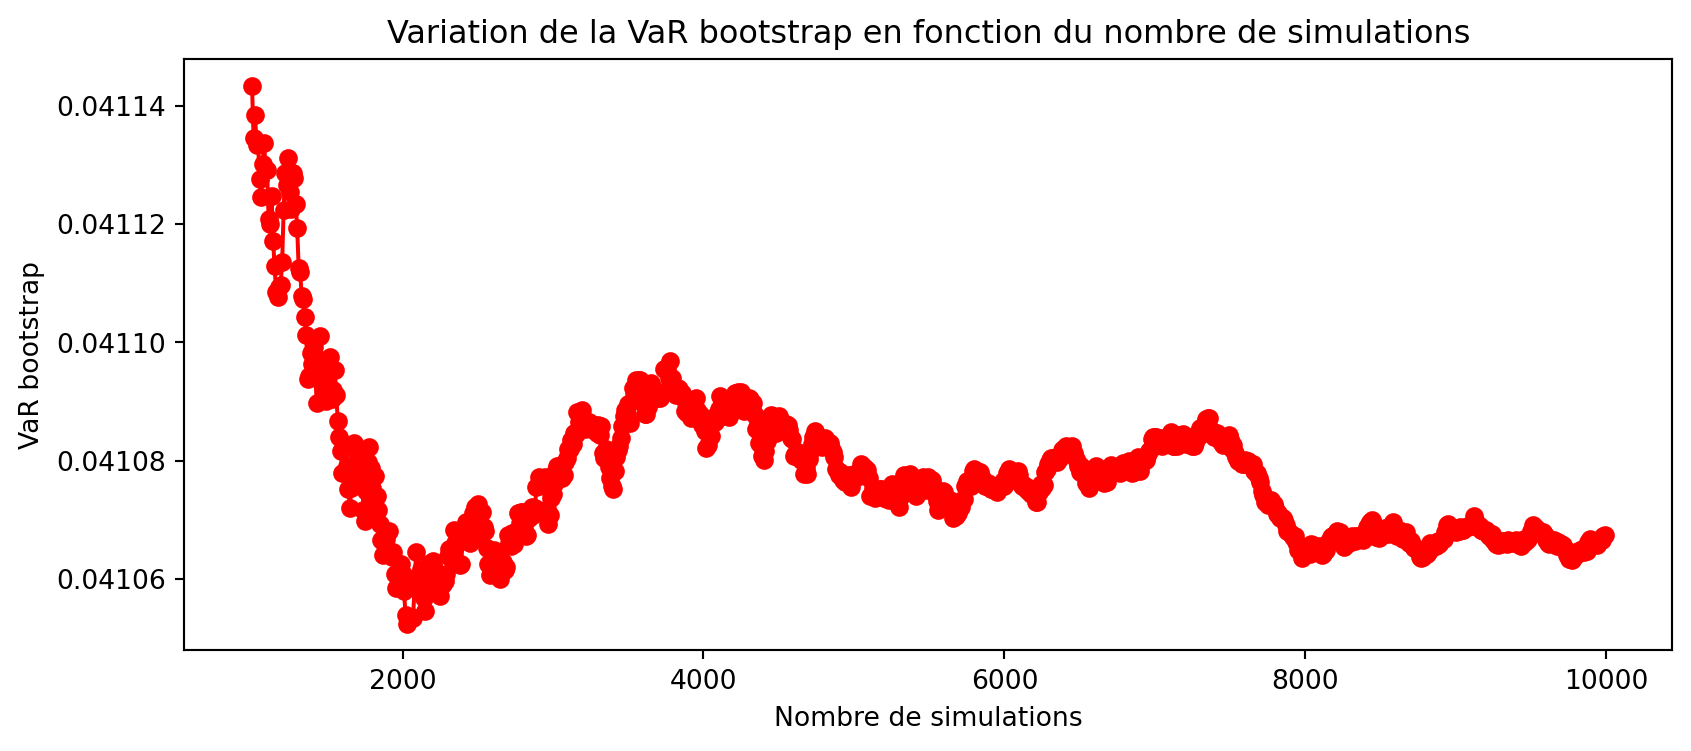

In [22]:
plt.figure(figsize=(10, 4))
plt.plot(M_values, var_bs_values, marker='o', color='red')
plt.xlabel('Nombre de simulations')
plt.ylabel('VaR bootstrap')
plt.title("Variation de la VaR bootstrap en fonction du nombre de simulations")

In [23]:
M=8000
var_bs_train, lower_ic,upper_ic = bootstrap_var(data_train, alpha=alpha, M=M)
print(f"La VaR bootstrap pour h=1j et alpha=0.99 est : {var_bs_train:.4%}")
print(f"L'intervalle de confiance est : [{lower_ic:.4%}, {upper_ic:.4%}]")

La VaR bootstrap pour h=1j et alpha=0.99 est : 4.1065%
L'intervalle de confiance est : [4.0536%, 4.0939%]


In [24]:
import scipy.stats as stats

# Objectif : implémenter une fonction calculant le nombre d'exception sur l'échantillon test
def exceptions(data, var):
    """
    Calcul du nombre d'exception
    data : les rendements logarithmiques
    var : la VaR
    """
    return np.sum(data < -var)


# Objectif : test de proportion binomiale

def binomial_test(n, p, p0 = 0.01, alpha=0.05):
    """
    Test de proportion binomiale
    H0 : p = p0
    H1 : p > p0
    n : le nombre d'essais
    p : la proportion
    alpha : le niveau de confiance
    """

    z = (p - p0) / np.sqrt(p0 * (1 - p0) / n)
    #reject_zone = p0 + stats.norm.ppf(1 - alpha) * np.sqrt(p0 * (1 - p0) / n)
    p_value = 1 - stats.norm.cdf(z)
    reject = p_value < alpha

    # Calcul des IC
    lower = p - stats.norm.ppf(1 - alpha) * np.sqrt(p * (1 - p) / n)
    upper = p + stats.norm.ppf(1 - alpha) * np.sqrt(p * (1 - p) / n)

    return p_value, reject, lower, upper

# Unconditionnal coverage test ==> to do.

In [25]:
# Backtest de la VaR historique

exceptions_test = exceptions(data_test, var_hist_train)
print(f"Le nombre d'exceptions sur l'échantillon de test est : {exceptions_test}")

print("="*80)
n = len(data_test)
p = exceptions_test / n
p_value, reject, lower,upper = binomial_test(n, p)
print(f"H0 : le nombre d'exceptions est inférieur ou égale à {1-alpha:.2%}")
print(f"IC : [{lower:.2%},{upper:.2%}]")
print(f"La p-value du test de proportion binomiale est : {p_value:.4f}")
print(f"Rejet de l'hypothèse nulle : {reject}")
print("="*80)

Le nombre d'exceptions sur l'échantillon de test est : 0
H0 : le nombre d'exceptions est inférieur ou égale à 1.00%
IC : [0.00%,0.00%]
La p-value du test de proportion binomiale est : 0.9925
Rejet de l'hypothèse nulle : False


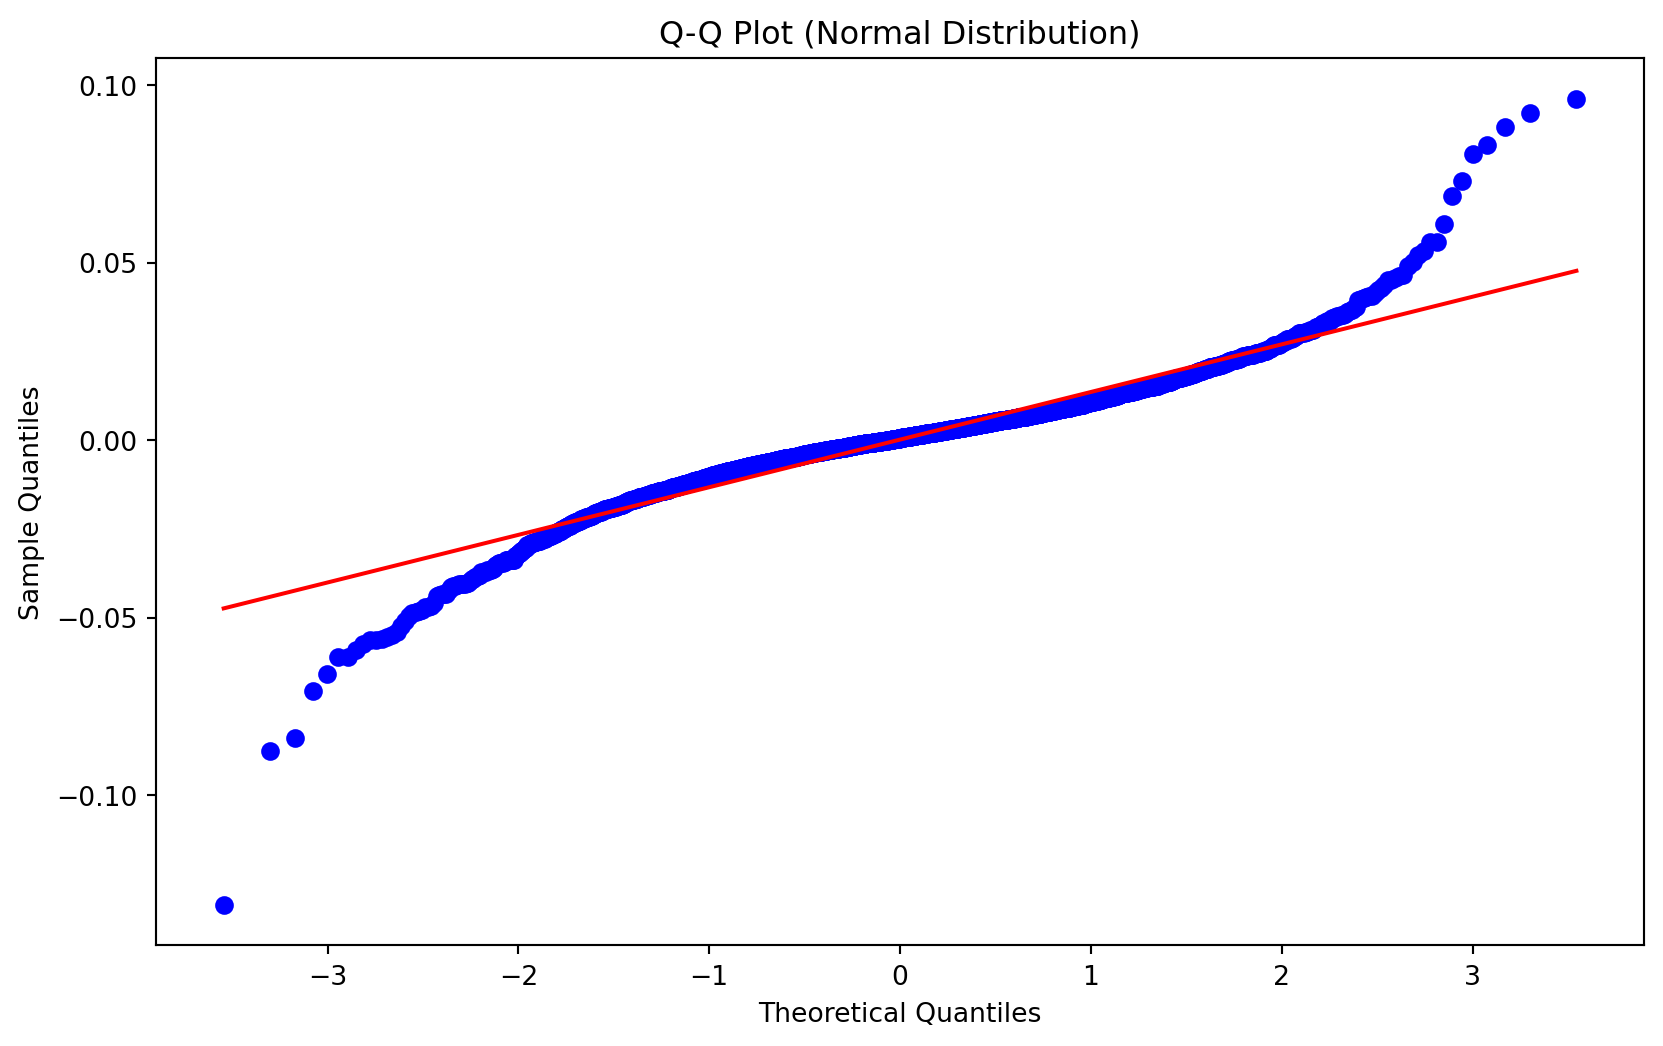

In [26]:
# Test visuel d'adéquation de la loi normale

# Créer un Q-Q plot
fig, ax = plt.subplots(figsize=(10, 6))
stats.probplot(data_train, dist="norm", plot=ax)

# Personnalisation du graphique
ax.set_title("Q-Q Plot (Normal Distribution)")
ax.set_xlabel("Theoretical Quantiles")
ax.set_ylabel("Sample Quantiles")

# Afficher le graphique
plt.show()

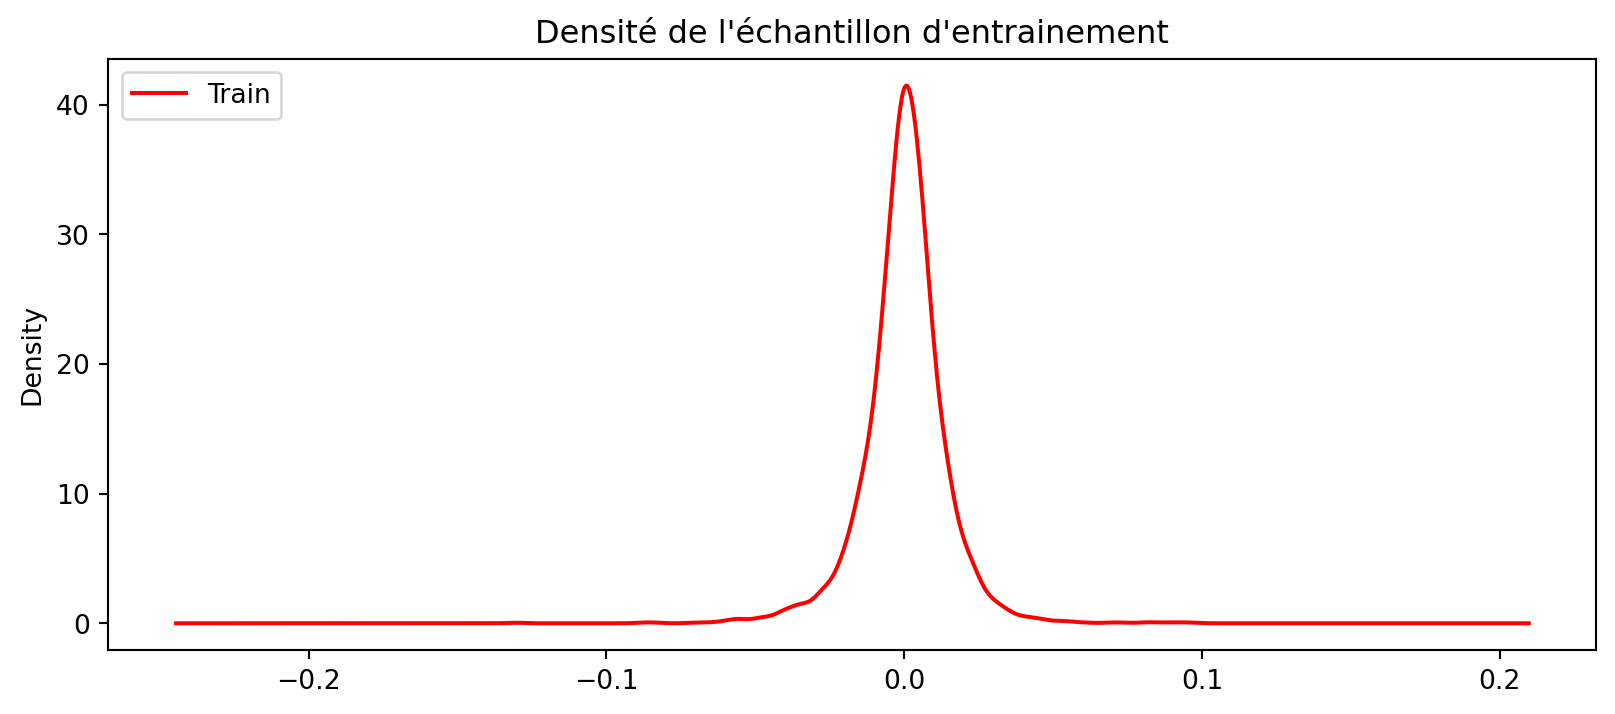

In [27]:
# Densité de l'echantillon train et l'échantillon de test

plt.figure(figsize=(10, 4))
data_train.plot(kind='kde', label='Train', color='red')
plt.legend(loc='upper left')
plt.title("Densité de l'échantillon d'entrainement")
plt.show()

In [28]:
# Skewness et kurtosis
print("="*80)
print("Skewness de l'échantillon d'entrainement : ", data_train.skew())
print("Kurtosis de l'échantillon d'entrainement : ", data_train.kurt())
print("="*80)

Skewness de l'échantillon d'entrainement :  -0.2981820421484688
Kurtosis de l'échantillon d'entrainement :  7.353960005618779


In [29]:
from scipy.stats import kstest

# Test de Kolmogorov-Smirnov
ks_stat, ks_p_value = kstest(data_train, 'norm')
print("="*80)
print("H0 : Les données suivent une loi normale")
print(f"Statistique de test : {ks_stat:.4f}")
print(f"P-value : {ks_p_value:.4f}")
print("="*80)

H0 : Les données suivent une loi normale
Statistique de test : 0.4775
P-value : 0.0000


In [30]:
# Objectif : écrire une fonction qui calcule la VaR gaussienne

def gaussian_var(data, alpha):
    """
    Calcul de la VaR gaussienne
    data : les rendements logarithmiques
    alpha : le niveau de confiance
    """
    from scipy.stats import norm

    mu = np.mean(data)
    sigma = np.std(data)
    return -(mu + sigma * norm.ppf(1 - alpha))

In [31]:
var_gauss_train = gaussian_var(data_train, alpha=alpha)
print(f"La VaR gaussienne pour h=1j et alpha={alpha} est : {var_gauss_train:.4%}")
print(f"La VaR historique pour h=10j et alpha={alpha} est : {np.sqrt(10)*var_gauss_train:.4%}")

La VaR gaussienne pour h=1j et alpha=0.99 est : 3.2302%
La VaR historique pour h=10j et alpha=0.99 est : 10.2148%


In [32]:
import numpy as np

mu = np.mean(data_train)
sigma = np.std(data_train)

return_sim = []
T = 10
M = 1000
S0 = train['Close'].iloc[-1]

for i in range(M):
    S = np.zeros(T+1)
    S[0] = S0
    for t in range(1,T+1):
        Wt = np.random.normal()
        S[t] = S[t-1] * np.exp((mu - 0.5 * sigma**2) + sigma * Wt)

    return_sim.append(np.log(S[T]/S0))

var_gauss_diffusion = gaussian_var(return_sim, alpha=alpha)
print(f"La VaR gaussienne pour h=10j et alpha={alpha} est : {var_gauss_diffusion:.4%}")

La VaR gaussienne pour h=10j et alpha=0.99 est : 10.0053%


In [33]:
# VaR la méthode EWMA (Exponential Weighting Moving Average)

def gaussian_var_ewma(data, alpha, lambda_=0.94):
    """
    Calcul de la VaR gaussienne EWMA
    data : les rendements logarithmiques
    alpha : le niveau de confiance
    lambda_ : le paramètre de lissage
    """

    weights = np.array([(1-lambda_)*(lambda_**i) for i in range(len(data))])
    weights = weights / np.sum(weights)

    mu = np.sum(data[::-1] * weights)
    sigma = np.sqrt(np.sum(weights * (data[::-1] - mu)**2))

    return -(mu + sigma * stats.norm.ppf(1 - alpha)), mu, sigma

# y revenir

In [34]:
lambdas = [0.9, 0.95, 0.99]
alpha = 0.99
import scipy.stats as stats
for l in lambdas:
    print("="*80)
    print("Lambda : ", l)
    print("-"*15)
    var_gauss_emwa, mu, sigma = gaussian_var_ewma(data_train, alpha=alpha, lambda_=l)
    print(f"La VaR gaussienne EWMA pour h=1j et alpha={alpha} est : {var_gauss_emwa:.4%}")
    print(f"La moyenne est : {mu:.4%}")
    print(f"L'écart-type est : {sigma:.4%}")

    n_exceptions = exceptions(data_test, var_gauss_emwa)
    print(f"Le nombre d'exceptions sur l'échantillon de test est : {n_exceptions}")

Lambda :  0.9
---------------
La VaR gaussienne EWMA pour h=1j et alpha=0.99 est : 2.3751%
La moyenne est : 0.1898%
L'écart-type est : 1.1025%
Le nombre d'exceptions sur l'échantillon de test est : 5
Lambda :  0.95
---------------
La VaR gaussienne EWMA pour h=1j et alpha=0.99 est : 2.8969%
La moyenne est : 0.0735%
L'écart-type est : 1.2768%
Le nombre d'exceptions sur l'échantillon de test est : 4
Lambda :  0.99
---------------
La VaR gaussienne EWMA pour h=1j et alpha=0.99 est : 3.3511%
La moyenne est : -0.0321%
L'écart-type est : 1.4267%
Le nombre d'exceptions sur l'échantillon de test est : 1


In [35]:
# Ecrire une fonction permettant d’estimer les paramètres d’une loi de Skew Student par maximum de vraisemblance.

from scipy.optimize import minimize
from scipy.stats import t


def skew_student_pdf(x, mu, sigma, gamma, nu ):
    """
    Compute the Skew Student-t probability density function (PDF).
    """


    t_x = ((x - mu) * gamma / sigma) * np.sqrt((nu + 1) / (nu + ((x - mu) / sigma) ** 2))
    # PDF of the standard Student-t distribution
    pdf_t = t.pdf(x , df=nu,  loc=mu, scale=sigma)
    # CDF of the transformed Student-t distribution
    cdf_t = t.cdf(t_x, df=nu + 1,loc=0, scale=1)

    # Skew Student density function
    density = 2 * pdf_t * cdf_t

    return density


def skew_student_log_likelihood(params, data):
    """
    Calcul de la log-vraisemblance de la loi de Skew Student
    params [mu, sigma, gamma, nu]: les paramètres de la loi
    data : les rendements logarithmiques
    """
    mu, sigma, gamma, nu = params
    density = skew_student_pdf(data , mu, sigma, gamma, nu)
    # log-vraisemblance
    loglik = np.sum(np.log(density))

    return - loglik

# Optimisation des paramètres avec contraintes de positivité sur sigma et nu
def skew_student_fit(data):
    """
    Estimation des paramètres de la loi de Skew Student
    """
    # initial guess
    x0 = np.array([np.mean(data), np.std(data), 1, 4])

    # contraintes
    bounds = [(None, None), (0, None), (None, None), (None, None)]

    # optimisation
    res = minimize(skew_student_log_likelihood, x0, args=(data), bounds=bounds)

    return res.x

params = skew_student_fit(data_train)
print("="*80)
print("Les paramètres estimés de la loi de Skew Student sont : ")
print("-"*15)
print("Mu : ", params[0])
print("Sigma : ", params[1])
print("Gamma : ", params[2])
print("Nu : ", params[3])
print("="*80)


params_sstd = {
    "mu" : params[0],
    "sigma" : params[1],
    "gamma" : params[2],
    "nu" : params[3]
}

Les paramètres estimés de la loi de Skew Student sont : 
---------------
Mu :  0.0023251952411471218
Sigma :  0.008823931435233275
Gamma :  -0.23188477391476636
Nu :  2.9618199934116825


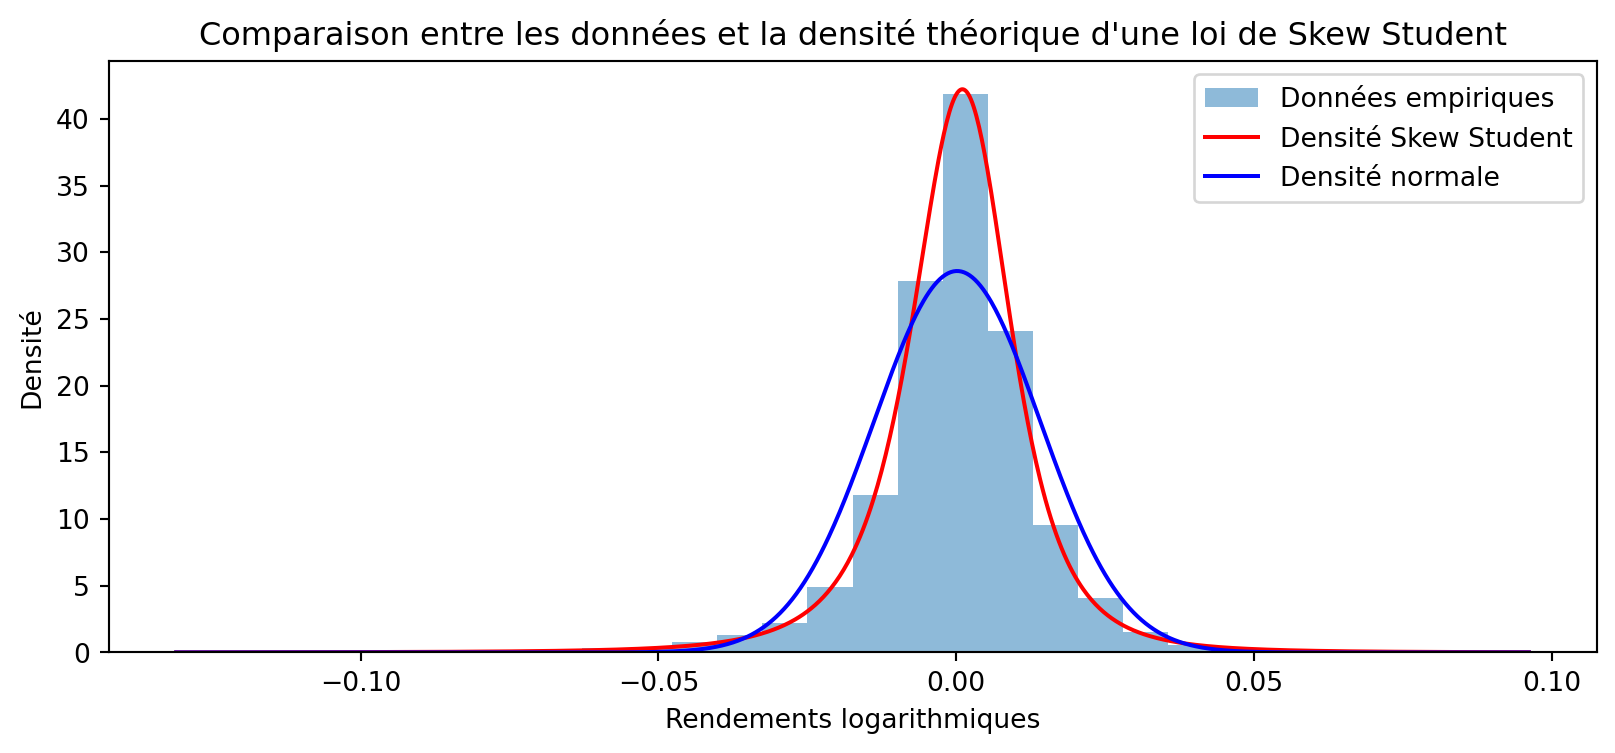

In [36]:
# Superposition de la densité théorique et des données

x_values = np.linspace(min(data_train), max(data_train), 1000)

theoretical_density = skew_student_pdf(x_values, **params_sstd)
plt.figure(figsize = (10,4))
plt.hist(data_train, bins=30, density=True, alpha=0.5, label='Données empiriques')
plt.plot(x_values, theoretical_density, label='Densité Skew Student', color='red')
# Densité normale
plt.plot(x_values, stats.norm.pdf(x_values, np.mean(data_train), np.std(data_train)), label='Densité normale', color='blue')
plt.xlabel('Rendements logarithmiques')
plt.ylabel('Densité')
plt.title("Comparaison entre les données et la densité théorique d'une loi de Skew Student")
plt.legend()

plt.show()

In [37]:
## Intégration de la fonction de densité
from scipy import integrate
from scipy.optimize import minimize_scalar

def integrale_SkewStudent(x,params):
    borne_inf = -np.inf
    resultat_integration, erreur = integrate.quad(lambda x: skew_student_pdf(x, **params), borne_inf, x)
    return resultat_integration

def fonc_minimize(x, alpha,params):
    value = integrale_SkewStudent(x,params)-alpha
    return abs(value)

def skew_student_quantile(alpha,mu, sigma, gamma, nu ):
    params = {
    "mu" : mu ,
    "sigma" : sigma,
    "gamma" : gamma,
    "nu" : nu
    }

    if alpha <0 or alpha >1:
        raise Exception("Veuillez entrer un niveau alpha entre 0 et 1")
    else:
        resultat_minimisation = minimize_scalar(lambda x: fonc_minimize(x, alpha,params))
        return resultat_minimisation.x

In [38]:
niveaux_quantiles = np.arange(0.001, 1, 0.001)
quantiles_empiriques = np.quantile(data_train, niveaux_quantiles)
quantiles_theoriques = [skew_student_quantile(alpha,**params_sstd) for alpha in tqdm(niveaux_quantiles)]

  0%|          | 0/999 [00:00<?, ?it/s]

  0%|          | 1/999 [00:00<05:36,  2.96it/s]

  0%|          | 2/999 [00:00<05:29,  3.03it/s]

  0%|          | 3/999 [00:00<05:32,  3.00it/s]

  0%|          | 4/999 [00:01<06:21,  2.61it/s]

  1%|          | 5/999 [00:01<06:35,  2.51it/s]

  1%|          | 6/999 [00:02<06:34,  2.51it/s]

  1%|          | 7/999 [00:02<06:34,  2.51it/s]

  1%|          | 8/999 [00:03<06:49,  2.42it/s]

  1%|          | 9/999 [00:03<06:48,  2.42it/s]

  1%|          | 10/999 [00:03<06:59,  2.36it/s]

  1%|          | 11/999 [00:04<06:44,  2.44it/s]

  1%|          | 12/999 [00:04<06:50,  2.41it/s]

  1%|▏         | 13/999 [00:05<07:01,  2.34it/s]

  1%|▏         | 14/999 [00:05<07:11,  2.28it/s]

  2%|▏         | 15/999 [00:06<07:01,  2.34it/s]

  2%|▏         | 16/999 [00:06<07:04,  2.31it/s]

  2%|▏         | 17/999 [00:06<06:59,  2.34it/s]

  2%|▏         | 18/999 [00:07<06:59,  2.34it/s]

  2%|▏         | 19/999 [00:07<07:02,  2.32it/s]

  2%|▏         | 20/999 [00:08<06:50,  2.38it/s]

  2%|▏         | 21/999 [00:08<06:49,  2.39it/s]

  2%|▏         | 22/999 [00:09<06:59,  2.33it/s]

  2%|▏         | 23/999 [00:09<06:55,  2.35it/s]

  2%|▏         | 24/999 [00:09<06:49,  2.38it/s]

  3%|▎         | 25/999 [00:10<06:55,  2.34it/s]

  3%|▎         | 26/999 [00:10<07:17,  2.22it/s]

  3%|▎         | 27/999 [00:11<07:08,  2.27it/s]

  3%|▎         | 28/999 [00:11<07:01,  2.30it/s]

  3%|▎         | 29/999 [00:12<07:09,  2.26it/s]

  3%|▎         | 30/999 [00:12<07:02,  2.29it/s]

  3%|▎         | 31/999 [00:13<06:59,  2.30it/s]

  3%|▎         | 32/999 [00:13<07:07,  2.26it/s]

  3%|▎         | 33/999 [00:13<07:21,  2.19it/s]

  3%|▎         | 34/999 [00:14<07:31,  2.14it/s]

  4%|▎         | 35/999 [00:14<07:29,  2.14it/s]

  4%|▎         | 36/999 [00:15<07:37,  2.11it/s]

  4%|▎         | 37/999 [00:15<07:41,  2.08it/s]

  4%|▍         | 38/999 [00:16<07:58,  2.01it/s]

  4%|▍         | 39/999 [00:16<08:09,  1.96it/s]

  4%|▍         | 40/999 [00:17<08:00,  1.99it/s]

  4%|▍         | 41/999 [00:17<07:50,  2.04it/s]

  4%|▍         | 42/999 [00:18<07:50,  2.03it/s]

  4%|▍         | 43/999 [00:18<07:47,  2.05it/s]

  4%|▍         | 44/999 [00:19<07:40,  2.07it/s]

  5%|▍         | 45/999 [00:19<07:39,  2.08it/s]

  5%|▍         | 46/999 [00:20<07:42,  2.06it/s]

  5%|▍         | 47/999 [00:20<07:36,  2.09it/s]

  5%|▍         | 48/999 [00:21<07:43,  2.05it/s]

  5%|▍         | 49/999 [00:21<07:53,  2.01it/s]

  5%|▌         | 50/999 [00:22<07:39,  2.07it/s]

  5%|▌         | 51/999 [00:22<07:37,  2.07it/s]

  5%|▌         | 52/999 [00:23<07:53,  2.00it/s]

  5%|▌         | 53/999 [00:23<07:55,  1.99it/s]

  5%|▌         | 54/999 [00:24<07:44,  2.04it/s]

  6%|▌         | 55/999 [00:24<07:44,  2.03it/s]

  6%|▌         | 56/999 [00:25<07:40,  2.05it/s]

  6%|▌         | 57/999 [00:25<07:50,  2.00it/s]

  6%|▌         | 58/999 [00:26<07:57,  1.97it/s]

  6%|▌         | 59/999 [00:26<07:40,  2.04it/s]

  6%|▌         | 60/999 [00:27<07:43,  2.03it/s]

  6%|▌         | 61/999 [00:27<08:00,  1.95it/s]

  6%|▌         | 62/999 [00:28<07:58,  1.96it/s]

  6%|▋         | 63/999 [00:28<08:02,  1.94it/s]

  6%|▋         | 64/999 [00:29<08:04,  1.93it/s]

  7%|▋         | 65/999 [00:29<07:53,  1.97it/s]

  7%|▋         | 66/999 [00:30<07:41,  2.02it/s]

  7%|▋         | 67/999 [00:30<07:54,  1.97it/s]

  7%|▋         | 68/999 [00:31<07:41,  2.02it/s]

  7%|▋         | 69/999 [00:31<07:49,  1.98it/s]

  7%|▋         | 70/999 [00:32<07:39,  2.02it/s]

  7%|▋         | 71/999 [00:32<07:47,  1.99it/s]

  7%|▋         | 72/999 [00:33<07:52,  1.96it/s]

  7%|▋         | 73/999 [00:33<07:56,  1.94it/s]

  7%|▋         | 74/999 [00:34<07:50,  1.97it/s]

  8%|▊         | 75/999 [00:34<07:58,  1.93it/s]

  8%|▊         | 76/999 [00:35<07:59,  1.92it/s]

  8%|▊         | 77/999 [00:35<07:48,  1.97it/s]

  8%|▊         | 78/999 [00:36<07:56,  1.93it/s]

  8%|▊         | 79/999 [00:37<08:01,  1.91it/s]

  8%|▊         | 80/999 [00:37<07:57,  1.92it/s]

  8%|▊         | 81/999 [00:38<07:46,  1.97it/s]

  8%|▊         | 82/999 [00:38<07:46,  1.97it/s]

  8%|▊         | 83/999 [00:39<07:37,  2.00it/s]

  8%|▊         | 84/999 [00:39<07:40,  1.99it/s]

  9%|▊         | 85/999 [00:40<07:43,  1.97it/s]

  9%|▊         | 86/999 [00:40<07:35,  2.00it/s]

  9%|▊         | 87/999 [00:41<07:42,  1.97it/s]

  9%|▉         | 88/999 [00:41<07:30,  2.02it/s]

  9%|▉         | 89/999 [00:41<07:28,  2.03it/s]

  9%|▉         | 90/999 [00:42<07:14,  2.09it/s]

  9%|▉         | 91/999 [00:42<07:19,  2.07it/s]

  9%|▉         | 92/999 [00:43<07:14,  2.09it/s]

  9%|▉         | 93/999 [00:43<06:46,  2.23it/s]

  9%|▉         | 94/999 [00:44<06:59,  2.16it/s]

 10%|▉         | 95/999 [00:44<07:12,  2.09it/s]

 10%|▉         | 96/999 [00:45<07:17,  2.06it/s]

 10%|▉         | 97/999 [00:45<07:24,  2.03it/s]

 10%|▉         | 98/999 [00:46<07:30,  2.00it/s]

 10%|▉         | 99/999 [00:46<07:29,  2.00it/s]

 10%|█         | 100/999 [00:47<07:32,  1.99it/s]

 10%|█         | 101/999 [00:47<07:22,  2.03it/s]

 10%|█         | 102/999 [00:48<07:27,  2.00it/s]

 10%|█         | 103/999 [00:48<07:23,  2.02it/s]

 10%|█         | 104/999 [00:49<07:19,  2.04it/s]

 11%|█         | 105/999 [00:49<07:12,  2.07it/s]

 11%|█         | 106/999 [00:50<07:20,  2.03it/s]

 11%|█         | 107/999 [00:50<07:20,  2.02it/s]

 11%|█         | 108/999 [00:51<07:37,  1.95it/s]

 11%|█         | 109/999 [00:51<07:37,  1.95it/s]

 11%|█         | 110/999 [00:52<07:33,  1.96it/s]

 11%|█         | 111/999 [00:52<07:34,  1.96it/s]

 11%|█         | 112/999 [00:53<07:42,  1.92it/s]

 11%|█▏        | 113/999 [00:53<07:48,  1.89it/s]

 11%|█▏        | 114/999 [00:54<07:42,  1.91it/s]

 12%|█▏        | 115/999 [00:54<07:44,  1.90it/s]

 12%|█▏        | 116/999 [00:55<07:38,  1.93it/s]

 12%|█▏        | 117/999 [00:56<07:38,  1.92it/s]

 12%|█▏        | 118/999 [00:56<07:39,  1.92it/s]

 12%|█▏        | 119/999 [00:57<07:45,  1.89it/s]

 12%|█▏        | 120/999 [00:57<07:35,  1.93it/s]

 12%|█▏        | 121/999 [00:58<07:40,  1.91it/s]

 12%|█▏        | 122/999 [00:58<07:56,  1.84it/s]

 12%|█▏        | 123/999 [00:59<07:51,  1.86it/s]

 12%|█▏        | 124/999 [00:59<07:59,  1.83it/s]

 13%|█▎        | 125/999 [01:00<07:56,  1.83it/s]

 13%|█▎        | 126/999 [01:00<08:03,  1.81it/s]

 13%|█▎        | 127/999 [01:01<07:59,  1.82it/s]

 13%|█▎        | 128/999 [01:01<07:49,  1.86it/s]

 13%|█▎        | 129/999 [01:02<07:45,  1.87it/s]

 13%|█▎        | 130/999 [01:03<07:47,  1.86it/s]

 13%|█▎        | 131/999 [01:03<07:44,  1.87it/s]

 13%|█▎        | 132/999 [01:04<07:33,  1.91it/s]

 13%|█▎        | 133/999 [01:04<07:27,  1.94it/s]

 13%|█▎        | 134/999 [01:05<07:18,  1.97it/s]

 14%|█▎        | 135/999 [01:05<07:20,  1.96it/s]

 14%|█▎        | 136/999 [01:06<07:26,  1.93it/s]

 14%|█▎        | 137/999 [01:06<07:26,  1.93it/s]

 14%|█▍        | 138/999 [01:07<07:21,  1.95it/s]

 14%|█▍        | 139/999 [01:07<07:34,  1.89it/s]

 14%|█▍        | 140/999 [01:08<07:37,  1.88it/s]

 14%|█▍        | 141/999 [01:08<07:24,  1.93it/s]

 14%|█▍        | 142/999 [01:09<07:18,  1.95it/s]

 14%|█▍        | 143/999 [01:09<07:10,  1.99it/s]

 14%|█▍        | 144/999 [01:10<07:04,  2.01it/s]

 15%|█▍        | 145/999 [01:10<07:00,  2.03it/s]

 15%|█▍        | 146/999 [01:11<06:58,  2.04it/s]

 15%|█▍        | 147/999 [01:11<07:11,  1.97it/s]

 15%|█▍        | 148/999 [01:12<07:40,  1.85it/s]

 15%|█▍        | 149/999 [01:12<07:37,  1.86it/s]

 15%|█▌        | 150/999 [01:13<07:40,  1.84it/s]

 15%|█▌        | 151/999 [01:13<07:46,  1.82it/s]

 15%|█▌        | 152/999 [01:14<07:32,  1.87it/s]

 15%|█▌        | 153/999 [01:15<07:36,  1.85it/s]

 15%|█▌        | 154/999 [01:15<07:39,  1.84it/s]

 16%|█▌        | 155/999 [01:16<07:40,  1.83it/s]

 16%|█▌        | 156/999 [01:16<07:45,  1.81it/s]

 16%|█▌        | 157/999 [01:17<07:45,  1.81it/s]

 16%|█▌        | 158/999 [01:17<07:36,  1.84it/s]

 16%|█▌        | 159/999 [01:18<07:42,  1.82it/s]

 16%|█▌        | 160/999 [01:18<07:48,  1.79it/s]

 16%|█▌        | 161/999 [01:19<07:52,  1.77it/s]

 16%|█▌        | 162/999 [01:20<08:00,  1.74it/s]

 16%|█▋        | 163/999 [01:20<08:05,  1.72it/s]

 16%|█▋        | 164/999 [01:21<08:12,  1.69it/s]

 17%|█▋        | 165/999 [01:21<08:08,  1.71it/s]

 17%|█▋        | 166/999 [01:22<08:07,  1.71it/s]

 17%|█▋        | 167/999 [01:23<08:04,  1.72it/s]

 17%|█▋        | 168/999 [01:23<08:03,  1.72it/s]

 17%|█▋        | 169/999 [01:24<07:53,  1.75it/s]

 17%|█▋        | 170/999 [01:24<07:45,  1.78it/s]

 17%|█▋        | 171/999 [01:25<07:45,  1.78it/s]

 17%|█▋        | 172/999 [01:25<07:57,  1.73it/s]

 17%|█▋        | 173/999 [01:26<07:57,  1.73it/s]

 17%|█▋        | 174/999 [01:27<07:58,  1.72it/s]

 18%|█▊        | 175/999 [01:27<08:03,  1.70it/s]

 18%|█▊        | 176/999 [01:28<08:05,  1.70it/s]

 18%|█▊        | 177/999 [01:28<08:12,  1.67it/s]

 18%|█▊        | 178/999 [01:29<08:07,  1.69it/s]

 18%|█▊        | 179/999 [01:29<07:58,  1.71it/s]

 18%|█▊        | 180/999 [01:30<07:51,  1.74it/s]

 18%|█▊        | 181/999 [01:31<07:55,  1.72it/s]

 18%|█▊        | 182/999 [01:31<07:54,  1.72it/s]

 18%|█▊        | 183/999 [01:32<08:10,  1.66it/s]

 18%|█▊        | 184/999 [01:32<07:59,  1.70it/s]

 19%|█▊        | 185/999 [01:33<08:09,  1.66it/s]

 19%|█▊        | 186/999 [01:34<08:20,  1.63it/s]

 19%|█▊        | 187/999 [01:34<08:18,  1.63it/s]

 19%|█▉        | 188/999 [01:35<08:21,  1.62it/s]

 19%|█▉        | 189/999 [01:36<08:15,  1.63it/s]

 19%|█▉        | 190/999 [01:36<08:10,  1.65it/s]

 19%|█▉        | 191/999 [01:37<07:36,  1.77it/s]

 19%|█▉        | 192/999 [01:37<07:47,  1.72it/s]

 19%|█▉        | 193/999 [01:38<07:42,  1.74it/s]

 19%|█▉        | 194/999 [01:38<07:30,  1.79it/s]

 20%|█▉        | 195/999 [01:39<07:26,  1.80it/s]

 20%|█▉        | 196/999 [01:39<07:24,  1.81it/s]

 20%|█▉        | 197/999 [01:40<07:37,  1.75it/s]

 20%|█▉        | 198/999 [01:41<07:30,  1.78it/s]

 20%|█▉        | 199/999 [01:41<07:29,  1.78it/s]

 20%|██        | 200/999 [01:42<07:47,  1.71it/s]

 20%|██        | 201/999 [01:42<07:41,  1.73it/s]

 20%|██        | 202/999 [01:43<07:41,  1.73it/s]

 20%|██        | 203/999 [01:43<07:36,  1.74it/s]

 20%|██        | 204/999 [01:44<07:15,  1.83it/s]

 21%|██        | 205/999 [01:44<07:09,  1.85it/s]

 21%|██        | 206/999 [01:45<07:09,  1.84it/s]

 21%|██        | 207/999 [01:46<07:17,  1.81it/s]

 21%|██        | 208/999 [01:46<07:19,  1.80it/s]

 21%|██        | 209/999 [01:47<07:38,  1.72it/s]

 21%|██        | 210/999 [01:47<07:45,  1.70it/s]

 21%|██        | 211/999 [01:48<07:45,  1.69it/s]

 21%|██        | 212/999 [01:49<07:42,  1.70it/s]

 21%|██▏       | 213/999 [01:49<07:51,  1.67it/s]

 21%|██▏       | 214/999 [01:50<07:38,  1.71it/s]

 22%|██▏       | 215/999 [01:50<07:40,  1.70it/s]

 22%|██▏       | 216/999 [01:51<07:33,  1.73it/s]

 22%|██▏       | 217/999 [01:51<07:28,  1.74it/s]

 22%|██▏       | 218/999 [01:52<07:29,  1.74it/s]

 22%|██▏       | 219/999 [01:53<07:16,  1.79it/s]

 22%|██▏       | 220/999 [01:53<07:16,  1.79it/s]

 22%|██▏       | 221/999 [01:54<07:24,  1.75it/s]

 22%|██▏       | 222/999 [01:54<07:17,  1.78it/s]

 22%|██▏       | 223/999 [01:55<07:10,  1.80it/s]

 22%|██▏       | 224/999 [01:55<07:15,  1.78it/s]

 23%|██▎       | 225/999 [01:56<07:30,  1.72it/s]

 23%|██▎       | 226/999 [01:57<07:25,  1.74it/s]

 23%|██▎       | 227/999 [01:57<07:12,  1.78it/s]

 23%|██▎       | 228/999 [01:58<07:15,  1.77it/s]

 23%|██▎       | 229/999 [01:58<07:08,  1.80it/s]

 23%|██▎       | 230/999 [01:59<07:24,  1.73it/s]

 23%|██▎       | 231/999 [01:59<07:20,  1.74it/s]

 23%|██▎       | 232/999 [02:00<07:21,  1.74it/s]

 23%|██▎       | 233/999 [02:01<07:26,  1.72it/s]

 23%|██▎       | 234/999 [02:01<07:21,  1.73it/s]

 24%|██▎       | 235/999 [02:02<07:21,  1.73it/s]

 24%|██▎       | 236/999 [02:02<07:26,  1.71it/s]

 24%|██▎       | 237/999 [02:03<07:30,  1.69it/s]

 24%|██▍       | 238/999 [02:04<07:47,  1.63it/s]

 24%|██▍       | 239/999 [02:04<07:55,  1.60it/s]

 24%|██▍       | 240/999 [02:05<08:06,  1.56it/s]

 24%|██▍       | 241/999 [02:06<08:05,  1.56it/s]

 24%|██▍       | 242/999 [02:06<08:14,  1.53it/s]

 24%|██▍       | 243/999 [02:07<08:26,  1.49it/s]

 24%|██▍       | 244/999 [02:08<08:28,  1.48it/s]

 25%|██▍       | 245/999 [02:08<08:22,  1.50it/s]

 25%|██▍       | 246/999 [02:09<08:25,  1.49it/s]

 25%|██▍       | 247/999 [02:10<08:17,  1.51it/s]

 25%|██▍       | 248/999 [02:10<08:27,  1.48it/s]

 25%|██▍       | 249/999 [02:11<08:30,  1.47it/s]

 25%|██▌       | 250/999 [02:12<08:31,  1.46it/s]

 25%|██▌       | 251/999 [02:12<08:25,  1.48it/s]

 25%|██▌       | 252/999 [02:13<08:27,  1.47it/s]

 25%|██▌       | 253/999 [02:14<08:32,  1.46it/s]

 25%|██▌       | 254/999 [02:14<08:38,  1.44it/s]

 26%|██▌       | 255/999 [02:15<08:29,  1.46it/s]

 26%|██▌       | 256/999 [02:16<08:20,  1.49it/s]

 26%|██▌       | 257/999 [02:16<08:11,  1.51it/s]

 26%|██▌       | 258/999 [02:17<08:10,  1.51it/s]

 26%|██▌       | 259/999 [02:18<08:00,  1.54it/s]

 26%|██▌       | 260/999 [02:18<07:58,  1.55it/s]

 26%|██▌       | 261/999 [02:19<07:51,  1.57it/s]

 26%|██▌       | 262/999 [02:20<07:36,  1.62it/s]

 26%|██▋       | 263/999 [02:20<07:35,  1.62it/s]

 26%|██▋       | 264/999 [02:21<07:37,  1.61it/s]

 27%|██▋       | 265/999 [02:21<07:36,  1.61it/s]

 27%|██▋       | 266/999 [02:22<07:32,  1.62it/s]

 27%|██▋       | 267/999 [02:23<07:31,  1.62it/s]

 27%|██▋       | 268/999 [02:23<07:37,  1.60it/s]

 27%|██▋       | 269/999 [02:24<07:38,  1.59it/s]

 27%|██▋       | 270/999 [02:25<07:46,  1.56it/s]

 27%|██▋       | 271/999 [02:25<07:37,  1.59it/s]

 27%|██▋       | 272/999 [02:26<07:44,  1.56it/s]

 27%|██▋       | 273/999 [02:26<07:46,  1.56it/s]

 27%|██▋       | 274/999 [02:27<07:44,  1.56it/s]

 28%|██▊       | 275/999 [02:28<07:46,  1.55it/s]

 28%|██▊       | 276/999 [02:28<07:46,  1.55it/s]

 28%|██▊       | 277/999 [02:29<07:39,  1.57it/s]

 28%|██▊       | 278/999 [02:30<07:42,  1.56it/s]

 28%|██▊       | 279/999 [02:30<07:44,  1.55it/s]

 28%|██▊       | 280/999 [02:31<07:58,  1.50it/s]

 28%|██▊       | 281/999 [02:32<07:59,  1.50it/s]

 28%|██▊       | 282/999 [02:32<08:07,  1.47it/s]

 28%|██▊       | 283/999 [02:33<08:16,  1.44it/s]

 28%|██▊       | 284/999 [02:34<08:28,  1.41it/s]

 29%|██▊       | 285/999 [02:35<08:34,  1.39it/s]

 29%|██▊       | 286/999 [02:35<08:24,  1.41it/s]

 29%|██▊       | 287/999 [02:36<08:31,  1.39it/s]

 29%|██▉       | 288/999 [02:37<08:10,  1.45it/s]

 29%|██▉       | 289/999 [02:37<08:21,  1.41it/s]

 29%|██▉       | 290/999 [02:38<08:22,  1.41it/s]

 29%|██▉       | 291/999 [02:39<08:13,  1.43it/s]

 29%|██▉       | 292/999 [02:40<08:08,  1.45it/s]

 29%|██▉       | 293/999 [02:40<08:04,  1.46it/s]

 29%|██▉       | 294/999 [02:41<08:02,  1.46it/s]

 30%|██▉       | 295/999 [02:42<08:08,  1.44it/s]

 30%|██▉       | 296/999 [02:42<08:16,  1.42it/s]

 30%|██▉       | 297/999 [02:43<08:18,  1.41it/s]

 30%|██▉       | 298/999 [02:44<08:25,  1.39it/s]

 30%|██▉       | 299/999 [02:44<08:13,  1.42it/s]

 30%|███       | 300/999 [02:45<08:10,  1.43it/s]

 30%|███       | 301/999 [02:46<08:16,  1.41it/s]

 30%|███       | 302/999 [02:47<08:11,  1.42it/s]

 30%|███       | 303/999 [02:47<08:12,  1.41it/s]

 30%|███       | 304/999 [02:48<08:09,  1.42it/s]

 31%|███       | 305/999 [02:49<08:06,  1.43it/s]

 31%|███       | 306/999 [02:49<07:57,  1.45it/s]

 31%|███       | 307/999 [02:50<07:53,  1.46it/s]

 31%|███       | 308/999 [02:51<07:45,  1.49it/s]

 31%|███       | 309/999 [02:51<07:46,  1.48it/s]

 31%|███       | 310/999 [02:52<07:53,  1.46it/s]

 31%|███       | 311/999 [02:53<07:54,  1.45it/s]

 31%|███       | 312/999 [02:53<08:02,  1.42it/s]

 31%|███▏      | 313/999 [02:54<08:04,  1.42it/s]

 31%|███▏      | 314/999 [02:55<07:57,  1.43it/s]

 32%|███▏      | 315/999 [02:56<07:59,  1.43it/s]

 32%|███▏      | 316/999 [02:56<07:57,  1.43it/s]

 32%|███▏      | 317/999 [02:57<07:56,  1.43it/s]

 32%|███▏      | 318/999 [02:58<07:51,  1.45it/s]

 32%|███▏      | 319/999 [02:58<07:58,  1.42it/s]

 32%|███▏      | 320/999 [02:59<07:58,  1.42it/s]

 32%|███▏      | 321/999 [03:00<08:10,  1.38it/s]

 32%|███▏      | 322/999 [03:01<08:00,  1.41it/s]

 32%|███▏      | 323/999 [03:01<08:02,  1.40it/s]

 32%|███▏      | 324/999 [03:02<08:04,  1.39it/s]

 33%|███▎      | 325/999 [03:03<07:51,  1.43it/s]

 33%|███▎      | 326/999 [03:03<07:49,  1.43it/s]

 33%|███▎      | 327/999 [03:04<08:00,  1.40it/s]

 33%|███▎      | 328/999 [03:05<07:51,  1.42it/s]

 33%|███▎      | 329/999 [03:05<07:55,  1.41it/s]

 33%|███▎      | 330/999 [03:06<07:51,  1.42it/s]

 33%|███▎      | 331/999 [03:07<07:58,  1.40it/s]

 33%|███▎      | 332/999 [03:08<07:53,  1.41it/s]

 33%|███▎      | 333/999 [03:08<07:52,  1.41it/s]

 33%|███▎      | 334/999 [03:09<07:49,  1.42it/s]

 34%|███▎      | 335/999 [03:10<07:42,  1.44it/s]

 34%|███▎      | 336/999 [03:10<07:48,  1.41it/s]

 34%|███▎      | 337/999 [03:11<07:48,  1.41it/s]

 34%|███▍      | 338/999 [03:12<07:52,  1.40it/s]

 34%|███▍      | 339/999 [03:13<07:43,  1.42it/s]

 34%|███▍      | 340/999 [03:13<07:37,  1.44it/s]

 34%|███▍      | 341/999 [03:14<07:43,  1.42it/s]

 34%|███▍      | 342/999 [03:15<07:37,  1.44it/s]

 34%|███▍      | 343/999 [03:15<07:32,  1.45it/s]

 34%|███▍      | 344/999 [03:16<07:32,  1.45it/s]

 35%|███▍      | 345/999 [03:17<07:26,  1.46it/s]

 35%|███▍      | 346/999 [03:17<07:28,  1.46it/s]

 35%|███▍      | 347/999 [03:18<07:33,  1.44it/s]

 35%|███▍      | 348/999 [03:19<07:32,  1.44it/s]

 35%|███▍      | 349/999 [03:19<07:26,  1.46it/s]

 35%|███▌      | 350/999 [03:20<07:23,  1.46it/s]

 35%|███▌      | 351/999 [03:21<07:33,  1.43it/s]

 35%|███▌      | 352/999 [03:22<07:34,  1.42it/s]

 35%|███▌      | 353/999 [03:22<07:36,  1.41it/s]

 35%|███▌      | 354/999 [03:23<07:36,  1.41it/s]

 36%|███▌      | 355/999 [03:24<07:30,  1.43it/s]

 36%|███▌      | 356/999 [03:24<07:24,  1.45it/s]

 36%|███▌      | 357/999 [03:25<07:21,  1.45it/s]

 36%|███▌      | 358/999 [03:26<07:18,  1.46it/s]

 36%|███▌      | 359/999 [03:26<07:26,  1.43it/s]

 36%|███▌      | 360/999 [03:27<07:21,  1.45it/s]

 36%|███▌      | 361/999 [03:28<07:31,  1.41it/s]

 36%|███▌      | 362/999 [03:29<07:24,  1.43it/s]

 36%|███▋      | 363/999 [03:29<07:12,  1.47it/s]

 36%|███▋      | 364/999 [03:30<07:04,  1.50it/s]

 37%|███▋      | 365/999 [03:30<07:07,  1.48it/s]

 37%|███▋      | 366/999 [03:31<06:57,  1.51it/s]

 37%|███▋      | 367/999 [03:32<06:54,  1.52it/s]

 37%|███▋      | 368/999 [03:32<06:55,  1.52it/s]

 37%|███▋      | 369/999 [03:33<06:59,  1.50it/s]

 37%|███▋      | 370/999 [03:34<06:55,  1.51it/s]

 37%|███▋      | 371/999 [03:34<06:51,  1.53it/s]

 37%|███▋      | 372/999 [03:35<06:45,  1.55it/s]

 37%|███▋      | 373/999 [03:36<06:41,  1.56it/s]

 37%|███▋      | 374/999 [03:36<06:42,  1.55it/s]

 38%|███▊      | 375/999 [03:37<06:39,  1.56it/s]

 38%|███▊      | 376/999 [03:38<06:39,  1.56it/s]

 38%|███▊      | 377/999 [03:38<06:43,  1.54it/s]

 38%|███▊      | 378/999 [03:39<06:41,  1.55it/s]

 38%|███▊      | 379/999 [03:40<06:41,  1.55it/s]

 38%|███▊      | 380/999 [03:40<06:49,  1.51it/s]

 38%|███▊      | 381/999 [03:41<06:53,  1.50it/s]

 38%|███▊      | 382/999 [03:42<06:49,  1.51it/s]

 38%|███▊      | 383/999 [03:42<06:45,  1.52it/s]

 38%|███▊      | 384/999 [03:43<06:48,  1.50it/s]

 39%|███▊      | 385/999 [03:44<06:47,  1.51it/s]

 39%|███▊      | 386/999 [03:44<06:50,  1.49it/s]

 39%|███▊      | 387/999 [03:45<06:36,  1.54it/s]

 39%|███▉      | 388/999 [03:46<06:44,  1.51it/s]

 39%|███▉      | 389/999 [03:46<06:45,  1.51it/s]

 39%|███▉      | 390/999 [03:47<06:44,  1.51it/s]

 39%|███▉      | 391/999 [03:48<06:46,  1.50it/s]

 39%|███▉      | 392/999 [03:48<06:53,  1.47it/s]

 39%|███▉      | 393/999 [03:49<06:55,  1.46it/s]

 39%|███▉      | 394/999 [03:50<06:50,  1.47it/s]

 40%|███▉      | 395/999 [03:50<06:44,  1.49it/s]

 40%|███▉      | 396/999 [03:51<06:48,  1.48it/s]

 40%|███▉      | 397/999 [03:52<06:54,  1.45it/s]

 40%|███▉      | 398/999 [03:52<07:02,  1.42it/s]

 40%|███▉      | 399/999 [03:53<07:10,  1.39it/s]

 40%|████      | 400/999 [03:54<07:06,  1.40it/s]

 40%|████      | 401/999 [03:55<07:04,  1.41it/s]

 40%|████      | 402/999 [03:55<06:58,  1.42it/s]

 40%|████      | 403/999 [03:56<07:04,  1.40it/s]

 40%|████      | 404/999 [03:57<06:55,  1.43it/s]

 41%|████      | 405/999 [03:57<06:51,  1.44it/s]

 41%|████      | 406/999 [03:58<06:42,  1.47it/s]

 41%|████      | 407/999 [03:59<06:40,  1.48it/s]

 41%|████      | 408/999 [03:59<06:34,  1.50it/s]

 41%|████      | 409/999 [04:00<06:39,  1.48it/s]

 41%|████      | 410/999 [04:01<06:40,  1.47it/s]

 41%|████      | 411/999 [04:01<06:43,  1.46it/s]

 41%|████      | 412/999 [04:02<06:36,  1.48it/s]

 41%|████▏     | 413/999 [04:03<06:32,  1.49it/s]

 41%|████▏     | 414/999 [04:03<06:27,  1.51it/s]

 42%|████▏     | 415/999 [04:04<06:31,  1.49it/s]

 42%|████▏     | 416/999 [04:05<06:36,  1.47it/s]

 42%|████▏     | 417/999 [04:05<06:42,  1.44it/s]

 42%|████▏     | 418/999 [04:06<06:42,  1.45it/s]

 42%|████▏     | 419/999 [04:07<06:46,  1.43it/s]

 42%|████▏     | 420/999 [04:08<06:52,  1.40it/s]

 42%|████▏     | 421/999 [04:08<06:53,  1.40it/s]

 42%|████▏     | 422/999 [04:09<06:53,  1.39it/s]

 42%|████▏     | 423/999 [04:10<06:56,  1.38it/s]

 42%|████▏     | 424/999 [04:11<06:55,  1.38it/s]

 43%|████▎     | 425/999 [04:11<06:54,  1.39it/s]

 43%|████▎     | 426/999 [04:12<06:49,  1.40it/s]

 43%|████▎     | 427/999 [04:13<06:53,  1.38it/s]

 43%|████▎     | 428/999 [04:13<06:49,  1.39it/s]

 43%|████▎     | 429/999 [04:14<07:00,  1.36it/s]

 43%|████▎     | 430/999 [04:15<06:50,  1.39it/s]

 43%|████▎     | 431/999 [04:15<06:35,  1.44it/s]

 43%|████▎     | 432/999 [04:16<06:24,  1.48it/s]

 43%|████▎     | 433/999 [04:17<06:24,  1.47it/s]

 43%|████▎     | 434/999 [04:17<06:28,  1.45it/s]

 44%|████▎     | 435/999 [04:18<06:28,  1.45it/s]

 44%|████▎     | 436/999 [04:19<06:32,  1.43it/s]

 44%|████▎     | 437/999 [04:20<06:34,  1.42it/s]

 44%|████▍     | 438/999 [04:20<06:31,  1.43it/s]

 44%|████▍     | 439/999 [04:21<06:26,  1.45it/s]

 44%|████▍     | 440/999 [04:22<06:33,  1.42it/s]

 44%|████▍     | 441/999 [04:22<06:30,  1.43it/s]

 44%|████▍     | 442/999 [04:23<06:24,  1.45it/s]

 44%|████▍     | 443/999 [04:24<06:29,  1.43it/s]

 44%|████▍     | 444/999 [04:24<06:14,  1.48it/s]

 45%|████▍     | 445/999 [04:25<06:21,  1.45it/s]

 45%|████▍     | 446/999 [04:26<06:22,  1.44it/s]

 45%|████▍     | 447/999 [04:27<06:20,  1.45it/s]

 45%|████▍     | 448/999 [04:27<06:12,  1.48it/s]

 45%|████▍     | 449/999 [04:28<06:17,  1.46it/s]

 45%|████▌     | 450/999 [04:29<06:21,  1.44it/s]

 45%|████▌     | 451/999 [04:29<06:21,  1.44it/s]

 45%|████▌     | 452/999 [04:30<06:27,  1.41it/s]

 45%|████▌     | 453/999 [04:31<06:33,  1.39it/s]

 45%|████▌     | 454/999 [04:32<06:35,  1.38it/s]

 46%|████▌     | 455/999 [04:32<06:24,  1.41it/s]

 46%|████▌     | 456/999 [04:33<06:23,  1.42it/s]

 46%|████▌     | 457/999 [04:34<06:16,  1.44it/s]

 46%|████▌     | 458/999 [04:34<06:22,  1.41it/s]

 46%|████▌     | 459/999 [04:35<06:29,  1.39it/s]

 46%|████▌     | 460/999 [04:36<06:26,  1.40it/s]

 46%|████▌     | 461/999 [04:36<06:31,  1.37it/s]

 46%|████▌     | 462/999 [04:37<06:20,  1.41it/s]

 46%|████▋     | 463/999 [04:38<06:18,  1.42it/s]

 46%|████▋     | 464/999 [04:39<06:25,  1.39it/s]

 47%|████▋     | 465/999 [04:39<06:22,  1.40it/s]

 47%|████▋     | 466/999 [04:40<06:22,  1.39it/s]

 47%|████▋     | 467/999 [04:41<06:13,  1.42it/s]

 47%|████▋     | 468/999 [04:41<06:08,  1.44it/s]

 47%|████▋     | 469/999 [04:42<06:06,  1.45it/s]

 47%|████▋     | 470/999 [04:43<06:14,  1.41it/s]

 47%|████▋     | 471/999 [04:44<06:17,  1.40it/s]

 47%|████▋     | 472/999 [04:44<06:26,  1.36it/s]

 47%|████▋     | 473/999 [04:45<06:35,  1.33it/s]

 47%|████▋     | 474/999 [04:46<06:21,  1.38it/s]

 48%|████▊     | 475/999 [04:46<06:17,  1.39it/s]

 48%|████▊     | 476/999 [04:47<06:08,  1.42it/s]

 48%|████▊     | 477/999 [04:48<06:07,  1.42it/s]

 48%|████▊     | 478/999 [04:49<06:12,  1.40it/s]

 48%|████▊     | 479/999 [04:49<06:13,  1.39it/s]

 48%|████▊     | 480/999 [04:50<06:09,  1.40it/s]

 48%|████▊     | 481/999 [04:51<06:22,  1.36it/s]

 48%|████▊     | 482/999 [04:52<06:18,  1.36it/s]

 48%|████▊     | 483/999 [04:52<06:18,  1.36it/s]

 48%|████▊     | 484/999 [04:53<06:07,  1.40it/s]

 49%|████▊     | 485/999 [04:54<06:05,  1.41it/s]

 49%|████▊     | 486/999 [04:54<05:59,  1.43it/s]

 49%|████▊     | 487/999 [04:55<06:01,  1.42it/s]

 49%|████▉     | 488/999 [04:56<05:57,  1.43it/s]

 49%|████▉     | 489/999 [04:56<05:57,  1.43it/s]

 49%|████▉     | 490/999 [04:57<05:49,  1.46it/s]

 49%|████▉     | 491/999 [04:58<05:43,  1.48it/s]

 49%|████▉     | 492/999 [04:58<05:42,  1.48it/s]

 49%|████▉     | 493/999 [04:59<05:49,  1.45it/s]

 49%|████▉     | 494/999 [05:00<05:58,  1.41it/s]

 50%|████▉     | 495/999 [05:01<05:56,  1.41it/s]

 50%|████▉     | 496/999 [05:01<05:52,  1.43it/s]

 50%|████▉     | 497/999 [05:02<05:56,  1.41it/s]

 50%|████▉     | 498/999 [05:03<06:10,  1.35it/s]

 50%|████▉     | 499/999 [05:03<05:49,  1.43it/s]

 50%|█████     | 500/999 [05:04<05:46,  1.44it/s]

 50%|█████     | 501/999 [05:05<05:36,  1.48it/s]

 50%|█████     | 502/999 [05:05<05:45,  1.44it/s]

 50%|█████     | 503/999 [05:06<05:38,  1.47it/s]

 50%|█████     | 504/999 [05:07<05:28,  1.51it/s]

 51%|█████     | 505/999 [05:07<05:23,  1.53it/s]

 51%|█████     | 506/999 [05:08<05:31,  1.49it/s]

 51%|█████     | 507/999 [05:09<05:30,  1.49it/s]

 51%|█████     | 508/999 [05:09<05:20,  1.53it/s]

 51%|█████     | 509/999 [05:10<05:17,  1.54it/s]

 51%|█████     | 510/999 [05:11<05:23,  1.51it/s]

 51%|█████     | 511/999 [05:11<05:14,  1.55it/s]

 51%|█████▏    | 512/999 [05:12<05:11,  1.57it/s]

 51%|█████▏    | 513/999 [05:13<05:10,  1.56it/s]

 51%|█████▏    | 514/999 [05:13<05:13,  1.55it/s]

 52%|█████▏    | 515/999 [05:14<05:16,  1.53it/s]

 52%|█████▏    | 516/999 [05:15<05:14,  1.54it/s]

 52%|█████▏    | 517/999 [05:15<05:14,  1.53it/s]

 52%|█████▏    | 518/999 [05:16<05:15,  1.52it/s]

 52%|█████▏    | 519/999 [05:17<05:10,  1.55it/s]

 52%|█████▏    | 520/999 [05:17<05:06,  1.56it/s]

 52%|█████▏    | 521/999 [05:18<05:09,  1.55it/s]

 52%|█████▏    | 522/999 [05:18<05:09,  1.54it/s]

 52%|█████▏    | 523/999 [05:19<05:03,  1.57it/s]

 52%|█████▏    | 524/999 [05:20<05:06,  1.55it/s]

 53%|█████▎    | 525/999 [05:20<05:19,  1.48it/s]

 53%|█████▎    | 526/999 [05:21<05:20,  1.48it/s]

 53%|█████▎    | 527/999 [05:22<05:10,  1.52it/s]

 53%|█████▎    | 528/999 [05:22<05:13,  1.50it/s]

 53%|█████▎    | 529/999 [05:23<05:10,  1.51it/s]

 53%|█████▎    | 530/999 [05:24<05:23,  1.45it/s]

 53%|█████▎    | 531/999 [05:25<05:21,  1.45it/s]

 53%|█████▎    | 532/999 [05:25<05:23,  1.45it/s]

 53%|█████▎    | 533/999 [05:26<05:26,  1.43it/s]

 53%|█████▎    | 534/999 [05:27<05:23,  1.44it/s]

 54%|█████▎    | 535/999 [05:27<05:18,  1.45it/s]

 54%|█████▎    | 536/999 [05:28<05:17,  1.46it/s]

 54%|█████▍    | 537/999 [05:29<05:16,  1.46it/s]

 54%|█████▍    | 538/999 [05:29<05:11,  1.48it/s]

 54%|█████▍    | 539/999 [05:30<05:07,  1.50it/s]

 54%|█████▍    | 540/999 [05:31<05:06,  1.50it/s]

 54%|█████▍    | 541/999 [05:31<05:06,  1.49it/s]

 54%|█████▍    | 542/999 [05:32<05:05,  1.50it/s]

 54%|█████▍    | 543/999 [05:33<05:13,  1.45it/s]

 54%|█████▍    | 544/999 [05:33<05:15,  1.44it/s]

 55%|█████▍    | 545/999 [05:34<05:17,  1.43it/s]

 55%|█████▍    | 546/999 [05:35<05:14,  1.44it/s]

 55%|█████▍    | 547/999 [05:36<05:13,  1.44it/s]

 55%|█████▍    | 548/999 [05:36<05:09,  1.46it/s]

 55%|█████▍    | 549/999 [05:37<05:05,  1.48it/s]

 55%|█████▌    | 550/999 [05:38<05:03,  1.48it/s]

 55%|█████▌    | 551/999 [05:38<05:08,  1.45it/s]

 55%|█████▌    | 552/999 [05:39<05:02,  1.48it/s]

 55%|█████▌    | 553/999 [05:40<05:04,  1.46it/s]

 55%|█████▌    | 554/999 [05:40<05:06,  1.45it/s]

 56%|█████▌    | 555/999 [05:41<05:06,  1.45it/s]

 56%|█████▌    | 556/999 [05:42<05:05,  1.45it/s]

 56%|█████▌    | 557/999 [05:42<05:05,  1.45it/s]

 56%|█████▌    | 558/999 [05:43<05:04,  1.45it/s]

 56%|█████▌    | 559/999 [05:44<05:03,  1.45it/s]

 56%|█████▌    | 560/999 [05:44<05:00,  1.46it/s]

 56%|█████▌    | 561/999 [05:45<04:58,  1.47it/s]

 56%|█████▋    | 562/999 [05:46<04:56,  1.47it/s]

 56%|█████▋    | 563/999 [05:46<05:04,  1.43it/s]

 56%|█████▋    | 564/999 [05:47<05:00,  1.45it/s]

 57%|█████▋    | 565/999 [05:48<05:02,  1.43it/s]

 57%|█████▋    | 566/999 [05:49<04:56,  1.46it/s]

 57%|█████▋    | 567/999 [05:49<04:54,  1.47it/s]

 57%|█████▋    | 568/999 [05:50<04:56,  1.45it/s]

 57%|█████▋    | 569/999 [05:51<05:02,  1.42it/s]

 57%|█████▋    | 570/999 [05:51<05:00,  1.43it/s]

 57%|█████▋    | 571/999 [05:52<05:01,  1.42it/s]

 57%|█████▋    | 572/999 [05:53<04:53,  1.45it/s]

 57%|█████▋    | 573/999 [05:53<04:50,  1.47it/s]

 57%|█████▋    | 574/999 [05:54<04:51,  1.46it/s]

 58%|█████▊    | 575/999 [05:55<04:44,  1.49it/s]

 58%|█████▊    | 576/999 [05:55<04:40,  1.51it/s]

 58%|█████▊    | 577/999 [05:56<04:44,  1.48it/s]

 58%|█████▊    | 578/999 [05:57<04:42,  1.49it/s]

 58%|█████▊    | 579/999 [05:57<04:39,  1.50it/s]

 58%|█████▊    | 580/999 [05:58<04:36,  1.51it/s]

 58%|█████▊    | 581/999 [05:59<04:46,  1.46it/s]

 58%|█████▊    | 582/999 [05:59<04:40,  1.49it/s]

 58%|█████▊    | 583/999 [06:00<04:40,  1.48it/s]

 58%|█████▊    | 584/999 [06:01<04:42,  1.47it/s]

 59%|█████▊    | 585/999 [06:01<04:43,  1.46it/s]

 59%|█████▊    | 586/999 [06:02<04:48,  1.43it/s]

 59%|█████▉    | 587/999 [06:03<04:51,  1.42it/s]

 59%|█████▉    | 588/999 [06:04<04:52,  1.41it/s]

 59%|█████▉    | 589/999 [06:04<04:43,  1.44it/s]

 59%|█████▉    | 590/999 [06:05<04:44,  1.44it/s]

 59%|█████▉    | 591/999 [06:06<04:51,  1.40it/s]

 59%|█████▉    | 592/999 [06:06<04:44,  1.43it/s]

 59%|█████▉    | 593/999 [06:07<04:44,  1.43it/s]

 59%|█████▉    | 594/999 [06:08<04:47,  1.41it/s]

 60%|█████▉    | 595/999 [06:09<04:54,  1.37it/s]

 60%|█████▉    | 596/999 [06:09<04:56,  1.36it/s]

 60%|█████▉    | 597/999 [06:10<04:58,  1.35it/s]

 60%|█████▉    | 598/999 [06:11<04:52,  1.37it/s]

 60%|█████▉    | 599/999 [06:12<04:54,  1.36it/s]

 60%|██████    | 600/999 [06:12<04:51,  1.37it/s]

 60%|██████    | 601/999 [06:13<04:48,  1.38it/s]

 60%|██████    | 602/999 [06:14<04:44,  1.39it/s]

 60%|██████    | 603/999 [06:14<04:40,  1.41it/s]

 60%|██████    | 604/999 [06:15<04:38,  1.42it/s]

 61%|██████    | 605/999 [06:16<04:37,  1.42it/s]

 61%|██████    | 606/999 [06:17<04:44,  1.38it/s]

 61%|██████    | 607/999 [06:17<04:38,  1.41it/s]

 61%|██████    | 608/999 [06:18<04:33,  1.43it/s]

 61%|██████    | 609/999 [06:19<04:28,  1.45it/s]

 61%|██████    | 610/999 [06:19<04:27,  1.45it/s]

 61%|██████    | 611/999 [06:20<04:23,  1.47it/s]

 61%|██████▏   | 612/999 [06:21<04:31,  1.43it/s]

 61%|██████▏   | 613/999 [06:21<04:26,  1.45it/s]

 61%|██████▏   | 614/999 [06:22<04:23,  1.46it/s]

 62%|██████▏   | 615/999 [06:23<04:20,  1.47it/s]

 62%|██████▏   | 616/999 [06:23<04:21,  1.47it/s]

 62%|██████▏   | 617/999 [06:24<04:18,  1.48it/s]

 62%|██████▏   | 618/999 [06:25<04:15,  1.49it/s]

 62%|██████▏   | 619/999 [06:25<04:12,  1.51it/s]

 62%|██████▏   | 620/999 [06:26<04:15,  1.49it/s]

 62%|██████▏   | 621/999 [06:27<04:13,  1.49it/s]

 62%|██████▏   | 622/999 [06:27<04:14,  1.48it/s]

 62%|██████▏   | 623/999 [06:28<04:19,  1.45it/s]

 62%|██████▏   | 624/999 [06:29<04:10,  1.50it/s]

 63%|██████▎   | 625/999 [06:29<04:10,  1.49it/s]

 63%|██████▎   | 626/999 [06:30<04:08,  1.50it/s]

 63%|██████▎   | 627/999 [06:31<04:02,  1.53it/s]

 63%|██████▎   | 628/999 [06:31<04:05,  1.51it/s]

 63%|██████▎   | 629/999 [06:32<04:04,  1.52it/s]

 63%|██████▎   | 630/999 [06:33<04:06,  1.50it/s]

 63%|██████▎   | 631/999 [06:33<04:03,  1.51it/s]

 63%|██████▎   | 632/999 [06:34<04:01,  1.52it/s]

 63%|██████▎   | 633/999 [06:35<03:57,  1.54it/s]

 63%|██████▎   | 634/999 [06:35<04:01,  1.51it/s]

 64%|██████▎   | 635/999 [06:36<03:59,  1.52it/s]

 64%|██████▎   | 636/999 [06:37<03:59,  1.51it/s]

 64%|██████▍   | 637/999 [06:37<03:56,  1.53it/s]

 64%|██████▍   | 638/999 [06:38<03:58,  1.51it/s]

 64%|██████▍   | 639/999 [06:39<04:00,  1.50it/s]

 64%|██████▍   | 640/999 [06:39<03:59,  1.50it/s]

 64%|██████▍   | 641/999 [06:40<03:58,  1.50it/s]

 64%|██████▍   | 642/999 [06:41<04:01,  1.48it/s]

 64%|██████▍   | 643/999 [06:41<04:02,  1.47it/s]

 64%|██████▍   | 644/999 [06:42<04:01,  1.47it/s]

 65%|██████▍   | 645/999 [06:43<03:55,  1.50it/s]

 65%|██████▍   | 646/999 [06:43<03:56,  1.49it/s]

 65%|██████▍   | 647/999 [06:44<03:58,  1.47it/s]

 65%|██████▍   | 648/999 [06:45<03:51,  1.51it/s]

 65%|██████▍   | 649/999 [06:45<03:49,  1.53it/s]

 65%|██████▌   | 650/999 [06:46<03:41,  1.57it/s]

 65%|██████▌   | 651/999 [06:47<03:42,  1.56it/s]

 65%|██████▌   | 652/999 [06:47<03:46,  1.53it/s]

 65%|██████▌   | 653/999 [06:48<03:48,  1.51it/s]

 65%|██████▌   | 654/999 [06:49<03:39,  1.57it/s]

 66%|██████▌   | 655/999 [06:49<03:34,  1.60it/s]

 66%|██████▌   | 656/999 [06:50<03:44,  1.53it/s]

 66%|██████▌   | 657/999 [06:51<03:45,  1.51it/s]

 66%|██████▌   | 658/999 [06:51<03:38,  1.56it/s]

 66%|██████▌   | 659/999 [06:52<03:37,  1.56it/s]

 66%|██████▌   | 660/999 [06:52<03:37,  1.56it/s]

 66%|██████▌   | 661/999 [06:53<03:35,  1.56it/s]

 66%|██████▋   | 662/999 [06:54<03:38,  1.54it/s]

 66%|██████▋   | 663/999 [06:54<03:40,  1.52it/s]

 66%|██████▋   | 664/999 [06:55<03:42,  1.51it/s]

 67%|██████▋   | 665/999 [06:56<03:39,  1.52it/s]

 67%|██████▋   | 666/999 [06:56<03:36,  1.54it/s]

 67%|██████▋   | 667/999 [06:57<03:31,  1.57it/s]

 67%|██████▋   | 668/999 [06:58<03:34,  1.54it/s]

 67%|██████▋   | 669/999 [06:58<03:39,  1.51it/s]

 67%|██████▋   | 670/999 [06:59<03:39,  1.50it/s]

 67%|██████▋   | 671/999 [07:00<03:32,  1.54it/s]

 67%|██████▋   | 672/999 [07:00<03:28,  1.57it/s]

 67%|██████▋   | 673/999 [07:01<03:29,  1.56it/s]

 67%|██████▋   | 674/999 [07:01<03:25,  1.58it/s]

 68%|██████▊   | 675/999 [07:02<03:27,  1.56it/s]

 68%|██████▊   | 676/999 [07:03<03:26,  1.56it/s]

 68%|██████▊   | 677/999 [07:03<03:24,  1.58it/s]

 68%|██████▊   | 678/999 [07:04<03:27,  1.55it/s]

 68%|██████▊   | 679/999 [07:05<03:26,  1.55it/s]

 68%|██████▊   | 680/999 [07:05<03:26,  1.54it/s]

 68%|██████▊   | 681/999 [07:06<03:22,  1.57it/s]

 68%|██████▊   | 682/999 [07:07<03:18,  1.59it/s]

 68%|██████▊   | 683/999 [07:07<03:23,  1.55it/s]

 68%|██████▊   | 684/999 [07:08<03:26,  1.52it/s]

 69%|██████▊   | 685/999 [07:09<03:27,  1.52it/s]

 69%|██████▊   | 686/999 [07:09<03:25,  1.52it/s]

 69%|██████▉   | 687/999 [07:10<03:30,  1.48it/s]

 69%|██████▉   | 688/999 [07:11<03:30,  1.47it/s]

 69%|██████▉   | 689/999 [07:11<03:27,  1.49it/s]

 69%|██████▉   | 690/999 [07:12<03:25,  1.50it/s]

 69%|██████▉   | 691/999 [07:13<03:24,  1.51it/s]

 69%|██████▉   | 692/999 [07:13<03:20,  1.53it/s]

 69%|██████▉   | 693/999 [07:14<03:21,  1.52it/s]

 69%|██████▉   | 694/999 [07:15<03:25,  1.49it/s]

 70%|██████▉   | 695/999 [07:15<03:27,  1.47it/s]

 70%|██████▉   | 696/999 [07:16<03:30,  1.44it/s]

 70%|██████▉   | 697/999 [07:17<03:31,  1.43it/s]

 70%|██████▉   | 698/999 [07:17<03:30,  1.43it/s]

 70%|██████▉   | 699/999 [07:18<03:29,  1.43it/s]

 70%|███████   | 700/999 [07:19<03:27,  1.44it/s]

 70%|███████   | 701/999 [07:20<03:26,  1.44it/s]

 70%|███████   | 702/999 [07:20<03:34,  1.39it/s]

 70%|███████   | 703/999 [07:21<03:33,  1.39it/s]

 70%|███████   | 704/999 [07:22<03:29,  1.41it/s]

 71%|███████   | 705/999 [07:23<03:38,  1.35it/s]

 71%|███████   | 706/999 [07:23<03:34,  1.36it/s]

 71%|███████   | 707/999 [07:24<03:31,  1.38it/s]

 71%|███████   | 708/999 [07:25<03:28,  1.40it/s]

 71%|███████   | 709/999 [07:25<03:25,  1.41it/s]

 71%|███████   | 710/999 [07:26<03:30,  1.37it/s]

 71%|███████   | 711/999 [07:27<03:30,  1.37it/s]

 71%|███████▏  | 712/999 [07:28<03:26,  1.39it/s]

 71%|███████▏  | 713/999 [07:28<03:21,  1.42it/s]

 71%|███████▏  | 714/999 [07:29<03:26,  1.38it/s]

 72%|███████▏  | 715/999 [07:30<03:24,  1.39it/s]

 72%|███████▏  | 716/999 [07:30<03:22,  1.40it/s]

 72%|███████▏  | 717/999 [07:31<03:28,  1.35it/s]

 72%|███████▏  | 718/999 [07:32<03:27,  1.36it/s]

 72%|███████▏  | 719/999 [07:33<03:29,  1.34it/s]

 72%|███████▏  | 720/999 [07:34<03:33,  1.31it/s]

 72%|███████▏  | 721/999 [07:34<03:34,  1.29it/s]

 72%|███████▏  | 722/999 [07:35<03:32,  1.30it/s]

 72%|███████▏  | 723/999 [07:36<03:29,  1.32it/s]

 72%|███████▏  | 724/999 [07:37<03:25,  1.34it/s]

 73%|███████▎  | 725/999 [07:37<03:26,  1.33it/s]

 73%|███████▎  | 726/999 [07:38<03:25,  1.33it/s]

 73%|███████▎  | 727/999 [07:39<03:20,  1.36it/s]

 73%|███████▎  | 728/999 [07:39<03:21,  1.35it/s]

 73%|███████▎  | 729/999 [07:40<03:19,  1.36it/s]

 73%|███████▎  | 730/999 [07:41<03:25,  1.31it/s]

 73%|███████▎  | 731/999 [07:42<03:26,  1.30it/s]

 73%|███████▎  | 732/999 [07:43<03:22,  1.32it/s]

 73%|███████▎  | 733/999 [07:43<03:21,  1.32it/s]

 73%|███████▎  | 734/999 [07:44<03:16,  1.35it/s]

 74%|███████▎  | 735/999 [07:45<03:19,  1.32it/s]

 74%|███████▎  | 736/999 [07:46<03:24,  1.29it/s]

 74%|███████▍  | 737/999 [07:46<03:23,  1.29it/s]

 74%|███████▍  | 738/999 [07:47<03:37,  1.20it/s]

 74%|███████▍  | 739/999 [07:48<03:42,  1.17it/s]

 74%|███████▍  | 740/999 [07:49<03:42,  1.17it/s]

 74%|███████▍  | 741/999 [07:50<03:40,  1.17it/s]

 74%|███████▍  | 742/999 [07:51<03:39,  1.17it/s]

 74%|███████▍  | 743/999 [07:52<03:35,  1.19it/s]

 74%|███████▍  | 744/999 [07:53<03:36,  1.18it/s]

 75%|███████▍  | 745/999 [07:53<03:32,  1.19it/s]

 75%|███████▍  | 746/999 [07:54<03:29,  1.20it/s]

 75%|███████▍  | 747/999 [07:55<03:29,  1.20it/s]

 75%|███████▍  | 748/999 [07:56<03:32,  1.18it/s]

 75%|███████▍  | 749/999 [07:57<03:31,  1.18it/s]

 75%|███████▌  | 750/999 [07:58<03:32,  1.17it/s]

 75%|███████▌  | 751/999 [07:58<03:34,  1.16it/s]

 75%|███████▌  | 752/999 [07:59<03:30,  1.17it/s]

 75%|███████▌  | 753/999 [08:00<03:28,  1.18it/s]

 75%|███████▌  | 754/999 [08:01<03:27,  1.18it/s]

 76%|███████▌  | 755/999 [08:02<03:31,  1.16it/s]

 76%|███████▌  | 756/999 [08:03<03:27,  1.17it/s]

 76%|███████▌  | 757/999 [08:04<03:26,  1.17it/s]

 76%|███████▌  | 758/999 [08:04<03:25,  1.17it/s]

 76%|███████▌  | 759/999 [08:05<03:24,  1.17it/s]

 76%|███████▌  | 760/999 [08:06<03:24,  1.17it/s]

 76%|███████▌  | 761/999 [08:07<03:26,  1.16it/s]

 76%|███████▋  | 762/999 [08:08<03:23,  1.17it/s]

 76%|███████▋  | 763/999 [08:09<03:26,  1.14it/s]

 76%|███████▋  | 764/999 [08:10<03:26,  1.14it/s]

 77%|███████▋  | 765/999 [08:10<03:21,  1.16it/s]

 77%|███████▋  | 766/999 [08:11<03:21,  1.16it/s]

 77%|███████▋  | 767/999 [08:12<03:18,  1.17it/s]

 77%|███████▋  | 768/999 [08:13<03:17,  1.17it/s]

 77%|███████▋  | 769/999 [08:14<03:19,  1.15it/s]

 77%|███████▋  | 770/999 [08:15<03:14,  1.18it/s]

 77%|███████▋  | 771/999 [08:16<03:09,  1.20it/s]

 77%|███████▋  | 772/999 [08:16<03:08,  1.20it/s]

 77%|███████▋  | 773/999 [08:17<03:08,  1.20it/s]

 77%|███████▋  | 774/999 [08:18<03:04,  1.22it/s]

 78%|███████▊  | 775/999 [08:19<03:03,  1.22it/s]

 78%|███████▊  | 776/999 [08:20<03:03,  1.22it/s]

 78%|███████▊  | 777/999 [08:21<03:07,  1.19it/s]

 78%|███████▊  | 778/999 [08:21<03:07,  1.18it/s]

 78%|███████▊  | 779/999 [08:22<03:04,  1.19it/s]

 78%|███████▊  | 780/999 [08:23<03:00,  1.21it/s]

 78%|███████▊  | 781/999 [08:24<03:00,  1.21it/s]

 78%|███████▊  | 782/999 [08:25<02:59,  1.21it/s]

 78%|███████▊  | 783/999 [08:26<02:59,  1.20it/s]

 78%|███████▊  | 784/999 [08:26<02:57,  1.21it/s]

 79%|███████▊  | 785/999 [08:27<03:05,  1.15it/s]

 79%|███████▊  | 786/999 [08:28<03:07,  1.13it/s]

 79%|███████▉  | 787/999 [08:29<03:05,  1.14it/s]

 79%|███████▉  | 788/999 [08:30<03:05,  1.14it/s]

 79%|███████▉  | 789/999 [08:31<03:06,  1.13it/s]

 79%|███████▉  | 790/999 [08:32<03:06,  1.12it/s]

 79%|███████▉  | 791/999 [08:33<03:02,  1.14it/s]

 79%|███████▉  | 792/999 [08:33<03:02,  1.14it/s]

 79%|███████▉  | 793/999 [08:34<03:02,  1.13it/s]

 79%|███████▉  | 794/999 [08:35<03:03,  1.11it/s]

 80%|███████▉  | 795/999 [08:36<03:01,  1.13it/s]

 80%|███████▉  | 796/999 [08:37<03:00,  1.13it/s]

 80%|███████▉  | 797/999 [08:38<03:00,  1.12it/s]

 80%|███████▉  | 798/999 [08:39<03:00,  1.11it/s]

 80%|███████▉  | 799/999 [08:40<03:00,  1.10it/s]

 80%|████████  | 800/999 [08:41<02:58,  1.11it/s]

 80%|████████  | 801/999 [08:42<02:58,  1.11it/s]

 80%|████████  | 802/999 [08:43<03:01,  1.09it/s]

 80%|████████  | 803/999 [08:43<02:59,  1.09it/s]

 80%|████████  | 804/999 [08:44<02:59,  1.09it/s]

 81%|████████  | 805/999 [08:45<02:57,  1.09it/s]

 81%|████████  | 806/999 [08:46<02:58,  1.08it/s]

 81%|████████  | 807/999 [08:47<02:56,  1.09it/s]

 81%|████████  | 808/999 [08:48<02:53,  1.10it/s]

 81%|████████  | 809/999 [08:49<02:52,  1.10it/s]

 81%|████████  | 810/999 [08:50<02:49,  1.11it/s]

 81%|████████  | 811/999 [08:51<02:48,  1.11it/s]

 81%|████████▏ | 812/999 [08:52<02:44,  1.14it/s]

 81%|████████▏ | 813/999 [08:52<02:45,  1.12it/s]

 81%|████████▏ | 814/999 [08:53<02:49,  1.09it/s]

 82%|████████▏ | 815/999 [08:54<02:47,  1.10it/s]

 82%|████████▏ | 816/999 [08:55<02:44,  1.11it/s]

 82%|████████▏ | 817/999 [08:56<02:43,  1.12it/s]

 82%|████████▏ | 818/999 [08:57<02:43,  1.11it/s]

 82%|████████▏ | 819/999 [08:58<02:50,  1.06it/s]

 82%|████████▏ | 820/999 [08:59<02:50,  1.05it/s]

 82%|████████▏ | 821/999 [09:00<02:58,  1.00s/it]

 82%|████████▏ | 822/999 [09:01<02:54,  1.01it/s]

 82%|████████▏ | 823/999 [09:02<02:53,  1.01it/s]

 82%|████████▏ | 824/999 [09:03<02:51,  1.02it/s]

 83%|████████▎ | 825/999 [09:04<02:49,  1.02it/s]

 83%|████████▎ | 826/999 [09:05<02:43,  1.06it/s]

 83%|████████▎ | 827/999 [09:06<02:36,  1.10it/s]

 83%|████████▎ | 828/999 [14:22<4:32:28, 95.60s/it]

 83%|████████▎ | 829/999 [14:23<3:10:28, 67.23s/it]

 83%|████████▎ | 830/999 [14:24<2:13:15, 47.31s/it]

 83%|████████▎ | 831/999 [14:25<1:33:27, 33.38s/it]

 83%|████████▎ | 832/999 [14:26<1:05:46, 23.63s/it]

 83%|████████▎ | 833/999 [14:27<46:23, 16.77s/it]  

 83%|████████▎ | 834/999 [14:28<33:00, 12.00s/it]

 84%|████████▎ | 835/999 [14:28<23:41,  8.67s/it]

 84%|████████▎ | 836/999 [14:29<17:10,  6.32s/it]

 84%|████████▍ | 837/999 [14:30<12:46,  4.73s/it]

 84%|████████▍ | 838/999 [14:31<09:36,  3.58s/it]

 84%|████████▍ | 839/999 [14:32<07:23,  2.77s/it]

 84%|████████▍ | 840/999 [14:33<05:49,  2.20s/it]

 84%|████████▍ | 841/999 [14:34<04:41,  1.78s/it]

 84%|████████▍ | 842/999 [14:35<03:57,  1.51s/it]

 84%|████████▍ | 843/999 [14:35<03:24,  1.31s/it]

 84%|████████▍ | 844/999 [14:36<03:00,  1.17s/it]

 85%|████████▍ | 845/999 [14:37<02:43,  1.06s/it]

 85%|████████▍ | 846/999 [14:38<02:32,  1.00it/s]

 85%|████████▍ | 847/999 [14:39<02:24,  1.06it/s]

 85%|████████▍ | 848/999 [14:40<02:19,  1.09it/s]

 85%|████████▍ | 849/999 [14:41<02:17,  1.09it/s]

 85%|████████▌ | 850/999 [14:41<02:13,  1.12it/s]

 85%|████████▌ | 851/999 [14:42<02:11,  1.13it/s]

 85%|████████▌ | 852/999 [14:43<02:08,  1.14it/s]

 85%|████████▌ | 853/999 [14:44<02:06,  1.16it/s]

 85%|████████▌ | 854/999 [14:45<02:02,  1.19it/s]

 86%|████████▌ | 855/999 [14:46<02:02,  1.17it/s]

 86%|████████▌ | 856/999 [14:46<01:59,  1.20it/s]

 86%|████████▌ | 857/999 [14:47<01:56,  1.22it/s]

 86%|████████▌ | 858/999 [14:48<01:56,  1.21it/s]

 86%|████████▌ | 859/999 [14:49<01:55,  1.21it/s]

 86%|████████▌ | 860/999 [14:50<01:55,  1.21it/s]

 86%|████████▌ | 861/999 [14:51<01:56,  1.18it/s]

 86%|████████▋ | 862/999 [14:51<01:53,  1.20it/s]

 86%|████████▋ | 863/999 [14:52<01:55,  1.18it/s]

 86%|████████▋ | 864/999 [14:53<01:55,  1.17it/s]

 87%|████████▋ | 865/999 [14:54<01:56,  1.15it/s]

 87%|████████▋ | 866/999 [14:55<01:55,  1.15it/s]

 87%|████████▋ | 867/999 [14:56<01:57,  1.12it/s]

 87%|████████▋ | 868/999 [14:57<01:55,  1.14it/s]

 87%|████████▋ | 869/999 [14:58<01:52,  1.16it/s]

 87%|████████▋ | 870/999 [14:58<01:50,  1.17it/s]

 87%|████████▋ | 871/999 [14:59<01:49,  1.17it/s]

 87%|████████▋ | 872/999 [15:00<01:50,  1.15it/s]

 87%|████████▋ | 873/999 [15:01<01:49,  1.15it/s]

 87%|████████▋ | 874/999 [15:02<01:48,  1.15it/s]

 88%|████████▊ | 875/999 [15:03<01:48,  1.15it/s]

 88%|████████▊ | 876/999 [15:04<01:48,  1.14it/s]

 88%|████████▊ | 877/999 [15:05<01:48,  1.12it/s]

 88%|████████▊ | 878/999 [15:05<01:46,  1.14it/s]

 88%|████████▊ | 879/999 [15:06<01:46,  1.13it/s]

 88%|████████▊ | 880/999 [15:07<01:44,  1.13it/s]

 88%|████████▊ | 881/999 [15:08<01:44,  1.13it/s]

 88%|████████▊ | 882/999 [15:09<01:43,  1.13it/s]

 88%|████████▊ | 883/999 [15:10<01:43,  1.12it/s]

 88%|████████▊ | 884/999 [15:11<01:42,  1.12it/s]

 89%|████████▊ | 885/999 [15:12<01:38,  1.16it/s]

 89%|████████▊ | 886/999 [15:12<01:38,  1.15it/s]

 89%|████████▉ | 887/999 [15:13<01:38,  1.14it/s]

 89%|████████▉ | 888/999 [15:14<01:41,  1.09it/s]

 89%|████████▉ | 889/999 [15:15<01:39,  1.11it/s]

 89%|████████▉ | 890/999 [15:16<01:36,  1.13it/s]

 89%|████████▉ | 891/999 [15:17<01:32,  1.17it/s]

 89%|████████▉ | 892/999 [15:18<01:30,  1.18it/s]

 89%|████████▉ | 893/999 [15:19<01:29,  1.18it/s]

 89%|████████▉ | 894/999 [15:19<01:30,  1.16it/s]

 90%|████████▉ | 895/999 [15:20<01:29,  1.17it/s]

 90%|████████▉ | 896/999 [15:21<01:27,  1.17it/s]

 90%|████████▉ | 897/999 [15:22<01:27,  1.17it/s]

 90%|████████▉ | 898/999 [15:23<01:27,  1.16it/s]

 90%|████████▉ | 899/999 [15:24<01:25,  1.16it/s]

 90%|█████████ | 900/999 [15:25<01:24,  1.17it/s]

 90%|█████████ | 901/999 [15:25<01:22,  1.18it/s]

 90%|█████████ | 902/999 [15:26<01:22,  1.17it/s]

 90%|█████████ | 903/999 [15:27<01:20,  1.19it/s]

 90%|█████████ | 904/999 [15:28<01:20,  1.19it/s]

 91%|█████████ | 905/999 [15:29<01:21,  1.16it/s]

 91%|█████████ | 906/999 [15:30<01:19,  1.17it/s]

 91%|█████████ | 907/999 [15:30<01:18,  1.17it/s]

 91%|█████████ | 908/999 [15:31<01:17,  1.18it/s]

 91%|█████████ | 909/999 [15:32<01:17,  1.16it/s]

 91%|█████████ | 910/999 [15:33<01:16,  1.16it/s]

 91%|█████████ | 911/999 [15:34<01:15,  1.16it/s]

 91%|█████████▏| 912/999 [15:35<01:15,  1.15it/s]

 91%|█████████▏| 913/999 [15:36<01:13,  1.17it/s]

 91%|█████████▏| 914/999 [15:37<01:12,  1.17it/s]

 92%|█████████▏| 915/999 [15:37<01:12,  1.15it/s]

 92%|█████████▏| 916/999 [15:38<01:12,  1.14it/s]

 92%|█████████▏| 917/999 [15:39<01:12,  1.12it/s]

 92%|█████████▏| 918/999 [15:40<01:11,  1.13it/s]

 92%|█████████▏| 919/999 [15:41<01:10,  1.13it/s]

 92%|█████████▏| 920/999 [15:42<01:07,  1.17it/s]

 92%|█████████▏| 921/999 [15:43<01:06,  1.18it/s]

 92%|█████████▏| 922/999 [15:43<01:04,  1.19it/s]

 92%|█████████▏| 923/999 [15:44<01:04,  1.18it/s]

 92%|█████████▏| 924/999 [15:45<01:03,  1.19it/s]

 93%|█████████▎| 925/999 [15:46<01:03,  1.17it/s]

 93%|█████████▎| 926/999 [15:47<01:02,  1.16it/s]

 93%|█████████▎| 927/999 [15:48<01:02,  1.16it/s]

 93%|█████████▎| 928/999 [15:49<01:01,  1.15it/s]

 93%|█████████▎| 929/999 [15:50<01:01,  1.15it/s]

 93%|█████████▎| 930/999 [15:50<01:00,  1.14it/s]

 93%|█████████▎| 931/999 [15:51<00:59,  1.15it/s]

 93%|█████████▎| 932/999 [15:52<00:58,  1.15it/s]

 93%|█████████▎| 933/999 [15:53<00:58,  1.13it/s]

 93%|█████████▎| 934/999 [15:54<00:57,  1.13it/s]

 94%|█████████▎| 935/999 [15:55<00:55,  1.15it/s]

 94%|█████████▎| 936/999 [15:56<00:54,  1.16it/s]

 94%|█████████▍| 937/999 [15:56<00:53,  1.16it/s]

 94%|█████████▍| 938/999 [15:57<00:52,  1.16it/s]

 94%|█████████▍| 939/999 [15:58<00:52,  1.14it/s]

 94%|█████████▍| 940/999 [15:59<00:50,  1.16it/s]

 94%|█████████▍| 941/999 [16:00<00:49,  1.18it/s]

 94%|█████████▍| 942/999 [16:01<00:48,  1.16it/s]

 94%|█████████▍| 943/999 [16:02<00:48,  1.15it/s]

 94%|█████████▍| 944/999 [16:03<00:47,  1.16it/s]

 95%|█████████▍| 945/999 [16:03<00:46,  1.17it/s]

 95%|█████████▍| 946/999 [16:04<00:45,  1.17it/s]

 95%|█████████▍| 947/999 [16:05<00:43,  1.19it/s]

 95%|█████████▍| 948/999 [16:06<00:42,  1.20it/s]

 95%|█████████▍| 949/999 [16:07<00:41,  1.20it/s]

 95%|█████████▌| 950/999 [16:08<00:41,  1.19it/s]

 95%|█████████▌| 951/999 [16:08<00:41,  1.16it/s]

 95%|█████████▌| 952/999 [16:09<00:41,  1.14it/s]

 95%|█████████▌| 953/999 [16:10<00:41,  1.11it/s]

 95%|█████████▌| 954/999 [16:11<00:40,  1.10it/s]

 96%|█████████▌| 955/999 [16:12<00:40,  1.09it/s]

 96%|█████████▌| 956/999 [16:13<00:39,  1.09it/s]

 96%|█████████▌| 957/999 [16:14<00:39,  1.07it/s]

 96%|█████████▌| 958/999 [16:15<00:38,  1.07it/s]

 96%|█████████▌| 959/999 [16:16<00:37,  1.08it/s]

 96%|█████████▌| 960/999 [16:17<00:35,  1.11it/s]

 96%|█████████▌| 961/999 [16:18<00:34,  1.10it/s]

 96%|█████████▋| 962/999 [16:19<00:33,  1.10it/s]

 96%|█████████▋| 963/999 [16:20<00:33,  1.07it/s]

 96%|█████████▋| 964/999 [16:21<00:33,  1.04it/s]

 97%|█████████▋| 965/999 [16:22<00:32,  1.05it/s]

 97%|█████████▋| 966/999 [16:22<00:31,  1.06it/s]

 97%|█████████▋| 967/999 [16:23<00:30,  1.06it/s]

 97%|█████████▋| 968/999 [16:24<00:28,  1.08it/s]

 97%|█████████▋| 969/999 [16:25<00:28,  1.05it/s]

 97%|█████████▋| 970/999 [16:26<00:27,  1.06it/s]

 97%|█████████▋| 971/999 [16:27<00:26,  1.06it/s]

 97%|█████████▋| 972/999 [16:28<00:25,  1.07it/s]

 97%|█████████▋| 973/999 [16:29<00:24,  1.07it/s]

 97%|█████████▋| 974/999 [16:30<00:24,  1.04it/s]

 98%|█████████▊| 975/999 [16:31<00:23,  1.04it/s]

 98%|█████████▊| 976/999 [16:32<00:21,  1.07it/s]

 98%|█████████▊| 977/999 [16:33<00:20,  1.06it/s]

 98%|█████████▊| 978/999 [16:34<00:19,  1.05it/s]

 98%|█████████▊| 979/999 [16:35<00:19,  1.05it/s]

 98%|█████████▊| 980/999 [16:36<00:17,  1.06it/s]

 98%|█████████▊| 981/999 [16:37<00:17,  1.04it/s]

 98%|█████████▊| 982/999 [16:38<00:16,  1.03it/s]

 98%|█████████▊| 983/999 [16:39<00:15,  1.04it/s]

 98%|█████████▊| 984/999 [16:39<00:14,  1.06it/s]

 99%|█████████▊| 985/999 [16:40<00:13,  1.04it/s]

 99%|█████████▊| 986/999 [16:41<00:12,  1.06it/s]

 99%|█████████▉| 987/999 [16:42<00:11,  1.08it/s]

 99%|█████████▉| 988/999 [16:43<00:10,  1.05it/s]

 99%|█████████▉| 989/999 [16:44<00:09,  1.07it/s]

 99%|█████████▉| 990/999 [16:45<00:08,  1.06it/s]

 99%|█████████▉| 991/999 [16:46<00:07,  1.06it/s]

 99%|█████████▉| 992/999 [16:47<00:06,  1.08it/s]

 99%|█████████▉| 993/999 [16:48<00:05,  1.06it/s]

 99%|█████████▉| 994/999 [16:49<00:04,  1.04it/s]

100%|█████████▉| 995/999 [16:50<00:03,  1.07it/s]

100%|█████████▉| 996/999 [16:51<00:02,  1.07it/s]

100%|█████████▉| 997/999 [16:52<00:01,  1.07it/s]

100%|█████████▉| 998/999 [16:53<00:00,  1.05it/s]

100%|██████████| 999/999 [16:54<00:00,  1.05it/s]

100%|██████████| 999/999 [16:54<00:00,  1.02s/it]

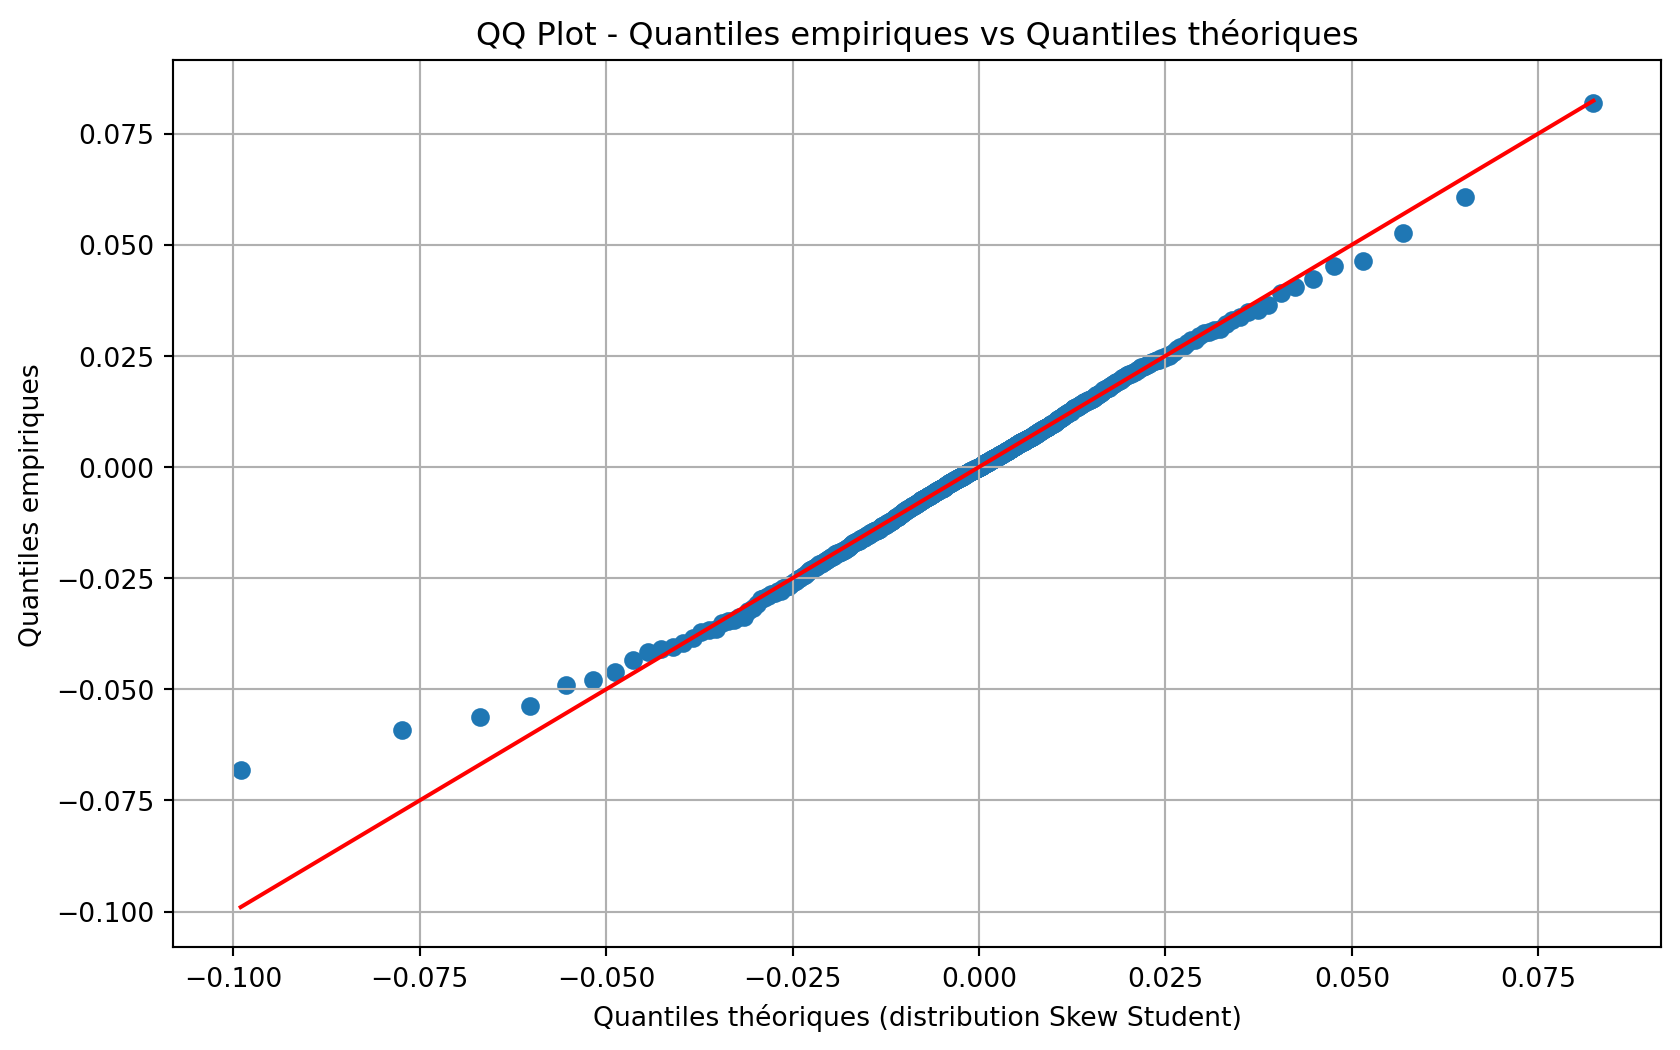

In [39]:
plt.figure(figsize=(10, 6))
plt.scatter(quantiles_theoriques, quantiles_empiriques)
plt.plot(quantiles_theoriques, quantiles_theoriques, color='red', label='Première bissectrice')
plt.title('QQ Plot - Quantiles empiriques vs Quantiles théoriques')
plt.xlabel('Quantiles théoriques (distribution Skew Student)')
plt.ylabel('Quantiles empiriques')
plt.grid(True)
plt.show()

In [40]:
# # kstest y revenir
# ks_stat, ks_p_value = kstest(data_train, skew_student_pdf, args=(**params_sstd,))

# print("="*80)
# print("H0 : Les données suivent une loi de Skew Student")
# print(f"Statistique de test : {ks_stat:.4f}")
# print(f"P-value : {ks_p_value:.4f}")
# print("="*80)
# A revoir

In [41]:
# Objectif : écrire une fonction qui calcule la VaR skew-student

def sstd_var_fct(alpha, params):
    """
    Calcul de la VaR skew student
    data : les rendements logarithmiques
    alpha : le niveau de confiance
    """

    return -skew_student_quantile(1-alpha, **params)

In [42]:
sstd_var = sstd_var_fct(alpha, params_sstd)
print(f"La VaR skew student pour h=1j et alpha={alpha} est : {sstd_var:.4%}")

La VaR skew student pour h=1j et alpha=0.99 est : 4.2576%


In [43]:
# Expected Shortfall pour la VaR historique, bootstrap et gaussienne, et skew-student

def expected_shortfall(data, var):
    """
    Calcul de l'Expected Shortfall
    data : les rendements logarithmiques
    var : la VaR
    """
    return -data[data < -var].mean()

es_hist_train = expected_shortfall(data_train, var_hist_train)
es_bs_train = expected_shortfall(data_train, var_bs_train)
es_gauss_train = expected_shortfall(data_train, var_gauss_train)
es_sstd_train = expected_shortfall(data_train, sstd_var)

# in a df
es = pd.DataFrame({
    'Historique': [es_hist_train],
    'Bootstrap': [es_bs_train],
    'Gaussienne': [es_gauss_train],
    'Skew Student': [es_sstd_train]
})

print("="*80)
print("Expected Shortfall empirique (en %) pour h=1j")
print(round(100*es,2))
print("="*80)

Expected Shortfall empirique (en %) pour h=1j
   Historique  Bootstrap  Gaussienne  Skew Student
0        5.47       5.51        4.47          5.68


In [44]:
import scipy.stats as stats
import scipy.integrate as integrate

def expected_shortfall_theoretical(alpha, quantile_function, density_function,params):
    """
    Computes the Expected Shortfall (Conditional VaR) for a given distribution.

    Parameters:
    - alpha (float): Confidence level (e.g., 0.99 for 99%)
    - quantile_function (callable): Function to compute quantiles (e.g., skew_student_quantile)
    - params (dict): Parameters of the distribution

    Returns:
    - float: Expected Shortfall value
    """

    # Compute the Value at Risk (VaR) at level alpha
    var_alpha = quantile_function(1-alpha, **params)

    # Expected Shortfall integral
    integral_value, _ = integrate.quad(lambda x: x * density_function(x, **params), -float("inf"), var_alpha)

    # Compute Expected Shortfall
    es_alpha = -integral_value / (1 - alpha)

    return es_alpha

# Compute Expected Shortfall using the corrected function
alpha = 0.99
es_sstd_theoretical = expected_shortfall_theoretical(alpha,skew_student_quantile,skew_student_pdf, params_sstd)

params_norm = {
    "loc" : np.mean(data_train),
    "scale" : np.std(data_train)
}

es_gauss_theoretical = expected_shortfall_theoretical(alpha,stats.norm.ppf,stats.norm.pdf, params_norm)

es_theoretical = pd.DataFrame({
    'Gaussienne': [es_gauss_theoretical],
    'Skew Student': [es_sstd_theoretical]
})

print("="*80)
print("Expected Shortfall théorique (en %) pour h=1j")
print(round(100*es_theoretical,2))
print("="*80)


Expected Shortfall théorique (en %) pour h=1j
   Gaussienne  Skew Student
0         3.7          6.71


In [45]:
import numpy as np
import pandas as pd
from scipy.stats import chi2

class Backtest:
    def __init__(self, actual, forecast, alpha, alpha_test):
        self.index = actual.index
        self.actual = actual.values
        self.forecast = forecast
        self.alpha = alpha
        self.alpha_test = alpha_test

    def hit_series(self):
        """ Returns a series of 1s (VaR breaches) and 0s (no breach) """
        return (self.actual < - self.forecast).astype(int)
    
    def lr_bt(self):
        """ Back-test protocol """
        hits = self.hit_series()  # Série des violations de la VaR (1 si violation, 0 sinon)
        transitions = hits[1:] - hits[:-1]  # Différences entre valeurs successives (1 si passage de 0 à 1, -1 si passage de 1 à 0)

        # Transition counts
        n01 = np.sum(transitions == 1)  # 0 -> 1
        n10 = np.sum(transitions == -1) # 1 -> 0
        n11 = np.sum((transitions == 0) & (hits[1:] == 1)) # 1 -> 1
        n00 = np.sum((transitions == 0) & (hits[1:] == 0)) # 0 -> 0
        
        # Number of observations in each state
        n0, n1 = n01 + n00, n10 + n11
        total_n = n0 + n1
        
        # Probability estimates
        p01 = n01 / (n00 + n01) if (n00 + n01) > 0 else 0
        p11 = n11 / (n11 + n10) if (n11 + n10) > 0 else 0
        p = n1 / total_n if total_n > 0 else 0
        
        if n1 > 0:
            #

            # Unconditional Coverage Test/Kupiec
            uc_h0 = n0 * np.log(1 - self.alpha) + n1 * np.log(self.alpha)
            uc_h1 = n0 * np.log(1 - p) + n1 * np.log(p)
            uc_stat = -2 * (uc_h0 - uc_h1)
            # uc_critical_val = chi2.ppf(self.alpha_test, 1)
            uc_pval = 1 - chi2.cdf(uc_stat, 1)
            
            # Independence Test/Christoffersen
            ind_h0 = (n00 + n01) * np.log(1 - p) + (n01 + n11) * np.log(p)
            ind_h1 = 0
            if p01 > 0: ind_h1 += n01 * np.log(p01)
            if (1 - p01) > 0: ind_h1 += n00 * np.log(1 - p01)
            if p11 > 0: ind_h1 += n11 * np.log(p11)
            if (1 - p11) > 0: ind_h1 += n10 * np.log(1 - p11)
            ind_stat = -2 * (ind_h0 - ind_h1)
            # ind_critical_val = chi2.ppf(self.alpha_test, 1)
            ind_pval = 1 - chi2.cdf(ind_stat, 1)
            
            # Conditional Coverage Test/ Christoffersen & Kupiec mixture
            cc_stat = uc_stat + ind_stat
            # cc_critical_val = chi2.ppf(self.alpha_test, 2)
            cc_pval = 1 - chi2.cdf(cc_stat, 2)
            
            # Store results in a DataFrame
            df = pd.DataFrame({
                "Statistic": [uc_stat, cc_stat, ind_stat],
                # "Critical Value": [uc_critical_val, ind_critical_val, cc_critical_val],
                "p-value": [uc_pval, cc_pval, ind_pval]
            }, index=["Unconditional", "Conditional","Independence"])

            binomial_test = stats.binomtest(n1, total_n, 1-self.alpha, alternative='two-sided')
            df.loc["Binomial"] = [binomial_test.statistic, binomial_test.pvalue]
        else:
            df = pd.DataFrame(np.nan, index=["Unconditional", "Conditional", "Independence"], columns=["Statistic", "p-value"])
            binomial_test = stats.binomtest(n1, total_n, 1-self.alpha, alternative='two-sided')
            df.loc["Binomial"] = [binomial_test.statistic, binomial_test.pvalue]
        
        
        return df

In [46]:
def daily_backtest(actual, forecast, alpha=0.99, alpha_test = 0.95,min_days=30, max_days=250):
    """ Runs a growing backtest daily, starting at min_days up to max_days """
    recalibration_needed = False
    end_test = min(max_days,len(actual))
    for end in range(min_days, end_test +1):
        data_to_test = actual[:end]
        var_to_test = forecast
        if len(data_to_test) < 30:
            continue
        
        bt = Backtest(actual=data_to_test, forecast=var_to_test, alpha=alpha, alpha_test=alpha_test)
        result = bt.lr_bt()
        
        nb_exceptions = bt.hit_series().sum()
        
        # res=bootstrap((data_to_test,), statistic=lambda x: exceptions(x, var_to_test)/len(x), method='percentile', n_resamples=1000)
        # ci_lower, ci_upper = res.confidence_interval

        # if ci_lower <= 1-alpha <= ci_upper:
        #     print(f"Recalibration needed at {end} days: The conditional test failed.")
        #     recalibration_needed = True
        #     return recalibration_needed, end

        # if "conditional" in result.index and result.loc["Independence", "p-value"] < 0.05:
        #     print(f"Recalibration needed at {end} days: The Independence test failed.")
        #     recalibration_needed = True
        #     return recalibration_needed, end
        # failed_tests = result.iloc[2:][result.iloc[2:]["p-value"] < 0.05].index.tolist()
        failed_tests = result[result["p-value"] < 0.05].index.tolist()

        if failed_tests:
            print(f"Recalibration needed at {end} days: The following tests failed: {', '.join(failed_tests)}")
            recalibration_needed = True
            return recalibration_needed, end
            
        if end == max_days and nb_exceptions == 0:
            print(f"Recalibration needed at {end} days: No exceptions observed in the test window.")
            recalibration_needed = True
            return recalibration_needed, end
    
    if not recalibration_needed:
        print("No recalibration needed in the tested period.")

In [47]:
def iterative_backtest(data_train, data_test, var_model, alpha):
    """ Runs an iterative backtest with recalibration """
    data_train = data_train.copy()
    data_test = data_test.copy()

    var_result = var_model(data_train, alpha=alpha)
    var_to_test = var_result[0] if isinstance(var_result, (list, tuple)) else var_result 
    
    recalibration_points = [0]
    vars_stored = [var_to_test]
    
    while len(data_test) > 0 and len(data_test) >= 250:
        print("="*80)
        print(f"Old VaR to test: {var_to_test:.4%}")

        # Run daily backtest correctly
        res_backtest, index = daily_backtest(data_test, var_to_test, alpha=alpha, alpha_test=0.95, min_days=30, max_days=250)

        # Find the index of recalibration
        if res_backtest:
            print(len(data_test))
            recalibration_points.append(index)

            # Expand training data and shrink test data
            data_train = pd.concat([data_train, data_test.iloc[:index,]])
            data_test = data_test.iloc[index:,]
            var_result = var_model(data_train, alpha=alpha)
            var_to_test = var_result[0] if isinstance(var_result, (list, tuple)) else var_result 
            vars_stored.append(var_to_test)

            print(f"New VaR to test: {var_to_test:.4%}")
        else:
            print("No recalibration needed.")
            break

    return recalibration_points, vars_stored

# Execute iterative backtest
recalibration_points, vars_stored = iterative_backtest(data_train, data_test, gaussian_var_ewma, alpha=alpha)

Old VaR to test: 2.7763%
Recalibration needed at 103 days: The following tests failed: Unconditional, Conditional
586
New VaR to test: 2.5925%
Old VaR to test: 2.5925%
Recalibration needed at 61 days: The following tests failed: Unconditional, Conditional
483
New VaR to test: 2.6675%
Old VaR to test: 2.6675%
Recalibration needed at 30 days: The following tests failed: Unconditional, Conditional
422
New VaR to test: 1.8885%
Old VaR to test: 1.8885%
Recalibration needed at 50 days: The following tests failed: Unconditional, Conditional
392
New VaR to test: 2.5369%
Old VaR to test: 2.5369%
Recalibration needed at 240 days: The following tests failed: Unconditional, Conditional
342
New VaR to test: 2.7075%


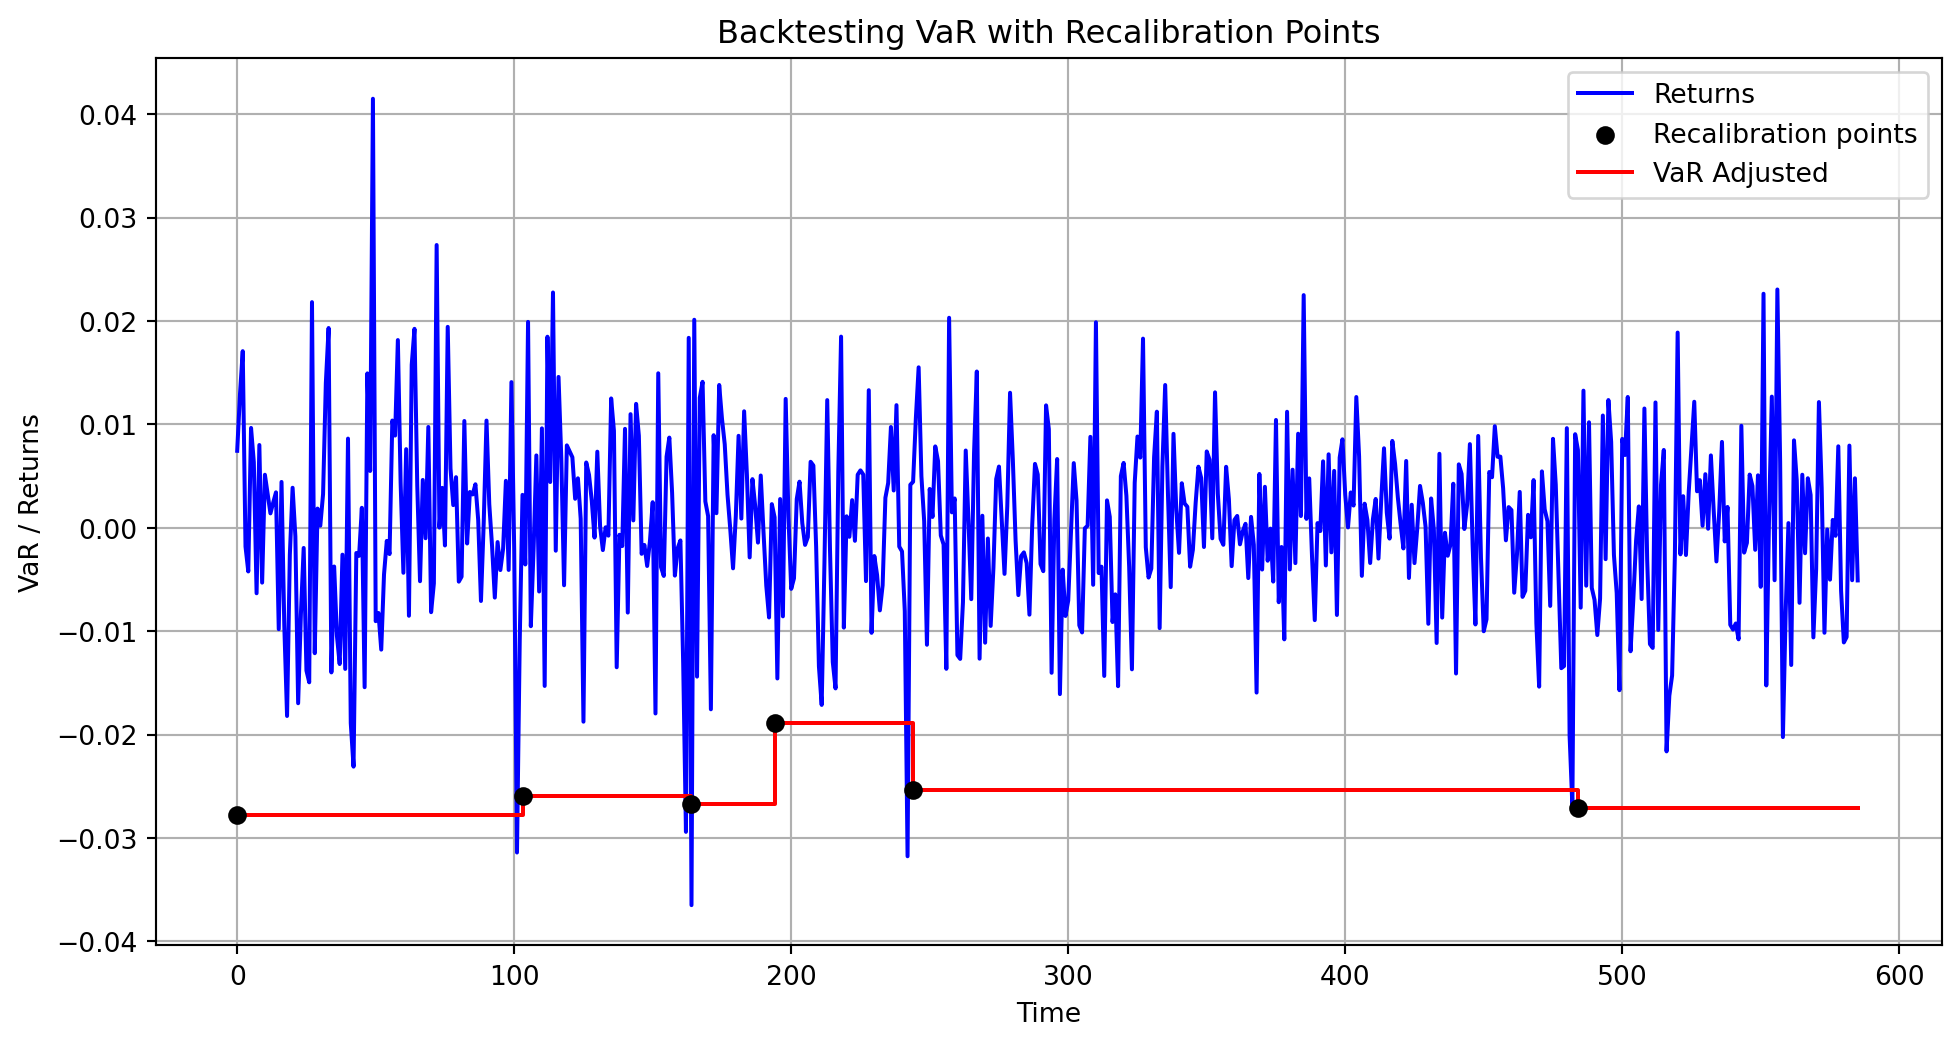

In [48]:
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(12, 6))
data_test.reset_index(drop=True, inplace=True)
plt.plot(data_test, label="Returns", color='blue')
recab = np.cumsum(np.array(recalibration_points))
vars_stored_neg = -np.array(vars_stored)

plt.scatter(recab, vars_stored_neg, color='black', label="Recalibration points", zorder=3)
if len(recab) > 0:
    plt.step(recab, vars_stored_neg, where='post', color='red', linestyle='solid', label="VaR Adjusted")
    plt.hlines(vars_stored_neg[-1], xmin=recab[-1], xmax=len(data_test), color='red', linestyle='solid')

plt.xlabel("Time")
plt.ylabel("VaR / Returns")
plt.title("Backtesting VaR with Recalibration Points")
plt.legend()
plt.grid(True)

plt.show()